#Importing libraries


In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from scipy import stats
from sklearn.mixture import GaussianMixture

from sklearn.model_selection import train_test_split
from sklearn import feature_selection
from sklearn import model_selection
from sklearn.metrics import accuracy_score 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from scipy.sparse import csr_matrix
from numpy import count_nonzero
from scipy.sparse import lil_matrix
from scipy import sparse
from scipy.stats import uniform
import pandas as pd
import sys
import numpy as np
from numpy import mean
from numpy import std
from numpy.random import randn
from numpy.random import seed
from matplotlib import pyplot
from sklearn.mixture import GaussianMixture
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

#  Reading files

To use if running with colab, otherwise, ignore.\
Please, put the files in the same folder in the same folder the notebook is.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/My Drive/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive


In [ ]:
MCF7_meta = pd.read_csv('MCF7_SmartS_MetaData.tsv',delimiter = '\t',  index_col = 0)

In [ ]:
HCC1806_meta = pd.read_csv('HCC1806_SmartS_MetaData.tsv',delimiter = '\t',  index_col = 0)


In [ ]:
MCF7_unf = pd.read_csv('MCF7_SmartS_Unfiltered_Data.txt', delimiter='\ ',engine='python',  index_col=0)


In [ ]:
HCC1806_unf = pd.read_csv("HCC1806_SmartS_Unfiltered_Data.txt",delimiter="\ ",engine='python',index_col=0)


In [ ]:
MCF7_f_n = pd.read_csv('MCF7_SmartS_Filtered_Normalised_3000_Data_train.txt', delimiter = '\ ', index_col=0,engine='python')

In [ ]:

HCC1806_f_n= pd.read_csv('HCC1806_SmartS_Filtered_Normalised_3000_Data_train.txt', delimiter = '\ ', index_col=0,engine='python')

In [ ]:
MCF7_drop_f_n = pd.read_csv('MCF7_Filtered_Normalised_3000_Data_train.txt', delimiter = '\ ', index_col=0,engine='python')

In [ ]:
HCC1806_drop_f_n = pd.read_csv('HCC1806_Filtered_Normalised_3000_Data_train.txt', delimiter = '\ ', index_col=0,engine='python')

# DATA ANALYSIS

## Introduction

The overall aim of the AI Lab is to **build a classification device able to predict**, by exploiting which genes are expressed in a particular cell and in what quantity, **whether the cell is under normoxia condition or hypoxic condition.**\
An hypoxic cell is a cell that doesn't receive much $O_2$. There are different stages of hypoxia, and the data used in this project have been obtained by sequencing cancer cells that had previously been subjected to two different possible conditions: normal oxygen level equal to (\~21% of $O_2$) and hypoxic oxigen level (\~1% of $O_2$).\
Being able to predict if a cell is in hypoxic condition could be of fundamental importance **as cells under this condition have greater resistance to cancer treatments.**

### Materials and Methods
The datasets come from two different cell lines, HCC1806 and MCF7 respectively, both made up of cells from women with breast cancer.\
These data were obtained by sequencing *(using Smart-Seq and Drop-Seq)* the samples. After the sequencing process, we have some data showing whether a specific gene is present and in what quantity is expressed in that specific cell.

**First,** we will do an exploratory data analysis using both the complete (unfiltered) datasets and those already filtered and normalized.\
In this phase we tried to understand the size of the dataset and if there were particular behaviors to be studied in details later. Additionally, one of the main objectives of this first phase was to try to understand, since the dataset was very sparse, how the size of the dataset could be reduced without losing information.\
**In the central part of our work,** we exploited PCA and clustering to gain a deeper understanding and begin to identify which patterns could be crucial in identifying the condition of hypoxia.\
**Finally,** using the Support Vector Machine, logistic regression, random forests classifiers and neural networks, we developed a tool capable of classifying the condition under which a cell had been subjected.



## SMART SEQ EXPERIMENT


### Meta data

Firstly we download the meta_data files that provide important information on how the experiments were conducted on the single cell.\
**It is organized as follows:** each row represents the sequencing of RNA done on a single cell using pcr technique. Each column specifies how the experiment was performed: *'cell line', 'plate', 'position of the cell', 'condition in which the cell was exposed and other information related to experiment'.* The file's rows correspond to the column's name of the file we want to analyze.

In [ ]:
# Print the dimensions of the file
print("Dataframe dimensions:", np.shape(MCF7_meta))
# >Display the first 5 rows
MCF7_meta.head()

Dataframe dimensions: (383, 8)


Cell Line           Lane  \
Filename                                                                      
output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoor...      MCF7  output.STAR.1   
output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoor...      MCF7  output.STAR.1   
output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoor...      MCF7  output.STAR.1   
output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord....      MCF7  output.STAR.1   
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord....      MCF7  output.STAR.1   

                                                    Pos Condition  Hours  \
Filename                                                                   
output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoor...  A10      Hypo     72   
output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoor...  A11      Hypo     72   
output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoor...  A12      Hypo     72   
output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord....   A1      Norm     72   
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord....   A2      Norm     72   

                                                   Cell name  \
Filename                                                       
output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoor...       S28   
output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoor...       S29   
output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoor...       S30   
output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord....        S1   
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord....        S2   

                                                                 PreprocessingTag  \
Filename                                                                            
output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoor...  Aligned.sortedByCoord.out.bam   
output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoor...  Aligned.sortedByCoord.out.bam   
output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoor...  Aligned.sortedByCoord.out.bam   
output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord....  Aligned.sortedByCoord.out.bam   
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord....  Aligned.sortedByCoord.out.bam   

                                                    ProcessingComments  
Filename                                                                
output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoor...  STAR,FeatureCounts  
output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoor...  STAR,FeatureCounts  
output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoor...  STAR,FeatureCounts  
output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord....  STAR,FeatureCounts  
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord....  STAR,FeatureCounts

The MCF7 metadata dataframe has 383 rows.

This means that, in the MCF7 unfiltered dataframe, we'll have 383 cells (columns).

In [ ]:
# Display the bottom 5 rows
MCF7_meta.tail(5)

Cell Line           Lane  \
Filename                                                                      
output.STAR.4_H5_Norm_S359_Aligned.sortedByCoor...      MCF7  output.STAR.4   
output.STAR.4_H6_Norm_S360_Aligned.sortedByCoor...      MCF7  output.STAR.4   
output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoor...      MCF7  output.STAR.4   
output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoor...      MCF7  output.STAR.4   
output.STAR.4_H9_Hypo_S381_Aligned.sortedByCoor...      MCF7  output.STAR.4   

                                                   Pos Condition  Hours  \
Filename                                                                  
output.STAR.4_H5_Norm_S359_Aligned.sortedByCoor...  H5      Norm     72   
output.STAR.4_H6_Norm_S360_Aligned.sortedByCoor...  H6      Norm     72   
output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoor...  H7      Hypo     72   
output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoor...  H8      Hypo     72   
output.STAR.4_H9_Hypo_S381_Aligned.sortedByCoor...  H9      Hypo     72   

                                                   Cell name  \
Filename                                                       
output.STAR.4_H5_Norm_S359_Aligned.sortedByCoor...      S359   
output.STAR.4_H6_Norm_S360_Aligned.sortedByCoor...      S360   
output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoor...      S379   
output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoor...      S380   
output.STAR.4_H9_Hypo_S381_Aligned.sortedByCoor...      S381   

                                                                 PreprocessingTag  \
Filename                                                                            
output.STAR.4_H5_Norm_S359_Aligned.sortedByCoor...  Aligned.sortedByCoord.out.bam   
output.STAR.4_H6_Norm_S360_Aligned.sortedByCoor...  Aligned.sortedByCoord.out.bam   
output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoor...  Aligned.sortedByCoord.out.bam   
output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoor...  Aligned.sortedByCoord.out.bam   
output.STAR.4_H9_Hypo_S381_Aligned.sortedByCoor...  Aligned.sortedByCoord.out.bam   

                                                    ProcessingComments  
Filename                                                                
output.STAR.4_H5_Norm_S359_Aligned.sortedByCoor...  STAR,FeatureCounts  
output.STAR.4_H6_Norm_S360_Aligned.sortedByCoor...  STAR,FeatureCounts  
output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoor...  STAR,FeatureCounts  
output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoor...  STAR,FeatureCounts  
output.STAR.4_H9_Hypo_S381_Aligned.sortedByCoor...  STAR,FeatureCounts

In [ ]:
# To print the dimensions of the file
print("Dataframe dimensions:", np.shape(HCC1806_meta))
# To disply the first 5 rows
HCC1806_meta.head()

Dataframe dimensions: (243, 8)


Cell Line  PCR Plate  Pos  \
Filename                                                                       
output.STAR.PCRPlate1A10_Normoxia_S123_Aligned....   HCC1806          1  A10   
output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.s...   HCC1806          1  A12   
output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sor...   HCC1806          1   A1   
output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.so...   HCC1806          1   A2   
output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sort...   HCC1806          1   A3   

                                                   Condition  Hours Cell name  \
Filename                                                                        
output.STAR.PCRPlate1A10_Normoxia_S123_Aligned....     Normo     24      S123   
output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.s...     Normo     24       S26   
output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sor...      Hypo     24       S97   
output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.so...      Hypo     24      S104   
output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sort...      Hypo     24        S4   

                                                                 PreprocessingTag  \
Filename                                                                            
output.STAR.PCRPlate1A10_Normoxia_S123_Aligned....  Aligned.sortedByCoord.out.bam   
output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.s...  Aligned.sortedByCoord.out.bam   
output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sor...  Aligned.sortedByCoord.out.bam   
output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.so...  Aligned.sortedByCoord.out.bam   
output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sort...  Aligned.sortedByCoord.out.bam   

                                                    ProcessingComments  
Filename                                                                
output.STAR.PCRPlate1A10_Normoxia_S123_Aligned....  STAR,FeatureCounts  
output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.s...  STAR,FeatureCounts  
output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sor...  STAR,FeatureCounts  
output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.so...  STAR,FeatureCounts  
output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sort...  STAR,FeatureCounts

The HCC1806 metadata dataframe has 243 rows.

This means that, in the HCC1806 unfiltered dataframe, we'll have 243 cells (columns).

In [ ]:
# To display the bottom 5 rows
HCC1806_meta.tail(5) 

Cell Line  PCR Plate  Pos  \
Filename                                                                       
output.STAR.PCRPlate4H10_Normoxia_S210_Aligned....   HCC1806          4  H10   
output.STAR.PCRPlate4H11_Normoxia_S214_Aligned....   HCC1806          4  H11   
output.STAR.PCRPlate4H2_Hypoxia_S199_Aligned.so...   HCC1806          4   H2   
output.STAR.PCRPlate4H7_Normoxia_S205_Aligned.s...   HCC1806          4   H7   
output.STAR.PCRPlate4H9_Normoxia_S236_Aligned.s...   HCC1806          4   H9   

                                                   Condition  Hours Cell name  \
Filename                                                                        
output.STAR.PCRPlate4H10_Normoxia_S210_Aligned....     Normo     24      S210   
output.STAR.PCRPlate4H11_Normoxia_S214_Aligned....     Normo     24      S214   
output.STAR.PCRPlate4H2_Hypoxia_S199_Aligned.so...      Hypo     24      S199   
output.STAR.PCRPlate4H7_Normoxia_S205_Aligned.s...     Normo     24      S205   
output.STAR.PCRPlate4H9_Normoxia_S236_Aligned.s...     Normo     24      S236   

                                                                 PreprocessingTag  \
Filename                                                                            
output.STAR.PCRPlate4H10_Normoxia_S210_Aligned....  Aligned.sortedByCoord.out.bam   
output.STAR.PCRPlate4H11_Normoxia_S214_Aligned....  Aligned.sortedByCoord.out.bam   
output.STAR.PCRPlate4H2_Hypoxia_S199_Aligned.so...  Aligned.sortedByCoord.out.bam   
output.STAR.PCRPlate4H7_Normoxia_S205_Aligned.s...  Aligned.sortedByCoord.out.bam   
output.STAR.PCRPlate4H9_Normoxia_S236_Aligned.s...  Aligned.sortedByCoord.out.bam   

                                                    ProcessingComments  
Filename                                                                
output.STAR.PCRPlate4H10_Normoxia_S210_Aligned....  STAR,FeatureCounts  
output.STAR.PCRPlate4H11_Normoxia_S214_Aligned....  STAR,FeatureCounts  
output.STAR.PCRPlate4H2_Hypoxia_S199_Aligned.so...  STAR,FeatureCounts  
output.STAR.PCRPlate4H7_Normoxia_S205_Aligned.s...  STAR,FeatureCounts  
output.STAR.PCRPlate4H9_Normoxia_S236_Aligned.s...  STAR,FeatureCounts

In [ ]:
# Checking the data type
MCF7_meta.dtypes

Cell Line             object
Lane                  object
Pos                   object
Condition             object
Hours                  int64
Cell name             object
PreprocessingTag      object
ProcessingComments    object
dtype: object

In [ ]:
# Checking the data type
HCC1806_meta.dtypes

Cell Line             object
PCR Plate              int64
Pos                   object
Condition             object
Hours                  int64
Cell name             object
PreprocessingTag      object
ProcessingComments    object
dtype: object

We can distinguish between object type and integer type, the two cell lines have most of the characteristics in common except for 'Lane' in MCF7 and 'PCR Plate' in HCC1806

In [ ]:
list(MCF7_meta.columns)

['Cell Line',
 'Lane',
 'Pos',
 'Condition',
 'Hours',
 'Cell name',
 'PreprocessingTag',
 'ProcessingComments']

In [ ]:
list(HCC1806_meta.columns)

['Cell Line',
 'PCR Plate',
 'Pos',
 'Condition',
 'Hours',
 'Cell name',
 'PreprocessingTag',
 'ProcessingComments']

In [ ]:
# Finding the null values.
print(MCF7_meta.isnull().sum())

Cell Line             0
Lane                  0
Pos                   0
Condition             0
Hours                 0
Cell name             0
PreprocessingTag      0
ProcessingComments    0
dtype: int64


The output tells us that no row has all 0 values


The meta_data files are organized as follows: the rows are the sequencing of rna done on a single cell using pcr technique (x383 for MCF7, x243 for HCC1806). The columns specify how the experiment was performed, 'cell line', 'plate', position of the cell, condition[...]

### Unfiltered data

#### MCF7


We start by analyzing the MCF7 unfiltered dataset.

##### Understanding the data

In [ ]:
# To display the first 5 rows of the unfiltered MCF7 data
MCF7_unf.head()

"output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                                                     0            
"MIR6859-1"                                                  0            
"WASH9P"                                                     1            
"OR4F29"                                                     0            
"MTND1P23"                                                   0            

             "output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                                                     0            
"MIR6859-1"                                                  0            
"WASH9P"                                                     0            
"OR4F29"                                                     0            
"MTND1P23"                                                   0            

             "output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                                                     0            
"MIR6859-1"                                                  0            
"WASH9P"                                                     0            
"OR4F29"                                                     0            
"MTND1P23"                                                   0            

             "output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                                                     0          
"MIR6859-1"                                                  0          
"WASH9P"                                                     0          
"OR4F29"                                                     0          
"MTND1P23"                                                   0          

             "output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                                                     0          
"MIR6859-1"                                                  0          
"WASH9P"                                                     0          
"OR4F29"                                                     0          
"MTND1P23"                                                   0          

             "output.STAR.1_A3_Norm_S3_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                                                     0          
"MIR6859-1"                                                  0          
"WASH9P"                                                     1          
"OR4F29"                                                     0          
"MTND1P23"                                                   0          

             "output.STAR.1_A4_Norm_S4_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                                                     0          
"MIR6859-1"                                                  0          
"WASH9P"                                                    10          
"OR4F29"                                                     0          
"MTND1P23"                                                   0          

             "output.STAR.1_A5_Norm_S5_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                                                     0          
"MIR6859-1"                                                  0          
"WASH9P"                                                     1          
"OR4F29"                                                     0          
"MTND1P23"                                                   0          

             "output.STAR.1_A6_Norm_S6_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                                                     0          
"MIR6859-1"                                                  0          
"WASH9P"                                                     0          
"OR4F29"                                                     0          
"MTND1P23"                                                   0          

             "output.STAR.

In [ ]:
# To print the dimensions of the dataset
print("Dataframe dimensions:", np.shape(MCF7_unf))
# To display the first column of the dataset
print("First column: ", MCF7_unf.iloc[ : , 0])

Dataframe dimensions: (22934, 383)
First column:  "WASH7P"         0
"MIR6859-1"      0
"WASH9P"         1
"OR4F29"         0
"MTND1P23"       0
              ... 
"MT-TE"          4
"MT-CYB"       270
"MT-TT"          0
"MT-TP"          5
"MAFIP"          8
Name: "output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam", Length: 22934, dtype: int64


The dimension of the MCF7 SmartSeq unfiltered data set is of 22934 rows and 383 columns.

Each column corresponds to a specific gene while each column corresponds to a cell. Hence, in each entry we can retrieve how much of tha specific genes has been expressed in that specific cell. Looking at the name of the columns we can also find directly if that cell was under normoxia or hypoxia without looking at the metadata.

In [ ]:
# To print the names
list(MCF7_unf.columns)

['"output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam"',
 '"output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam"',
 '"output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam"',
 '"output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam"',
 '"output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam"',
 '"output.STAR.1_A3_Norm_S3_Aligned.sortedByCoord.out.bam"',
 '"output.STAR.1_A4_Norm_S4_Aligned.sortedByCoord.out.bam"',
 '"output.STAR.1_A5_Norm_S5_Aligned.sortedByCoord.out.bam"',
 '"output.STAR.1_A6_Norm_S6_Aligned.sortedByCoord.out.bam"',
 '"output.STAR.1_A7_Hypo_S25_Aligned.sortedByCoord.out.bam"',
 '"output.STAR.1_A8_Hypo_S26_Aligned.sortedByCoord.out.bam"',
 '"output.STAR.1_A9_Hypo_S27_Aligned.sortedByCoord.out.bam"',
 '"output.STAR.1_B10_Hypo_S76_Aligned.sortedByCoord.out.bam"',
 '"output.STAR.1_B11_Hypo_S77_Aligned.sortedByCoord.out.bam"',
 '"output.STAR.1_B12_Hypo_S78_Aligned.sortedByCoord.out.bam"',
 '"output.STAR.1_B1_Norm_S49_Aligned.sortedByCoord.out.bam"',
 '"outpu

In [ ]:
# To print the names of the genes
gene_symbls = MCF7_unf.index
print("Dataframe indexes: ", gene_symbls)

Dataframe indexes:  Index(['"WASH7P"', '"MIR6859-1"', '"WASH9P"', '"OR4F29"', '"MTND1P23"',
       '"MTND2P28"', '"MTCO1P12"', '"MTCO2P12"', '"MTATP8P1"', '"MTATP6P1"',
       ...
       '"MT-TH"', '"MT-TS2"', '"MT-TL2"', '"MT-ND5"', '"MT-ND6"', '"MT-TE"',
       '"MT-CYB"', '"MT-TT"', '"MT-TP"', '"MAFIP"'],
      dtype='object', length=22934)


In [ ]:
# To check the data types of the entries
MCF7_unf.dtypes

"output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam"    int64
"output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam"    int64
"output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam"    int64
"output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam"      int64
"output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam"      int64
                                                              ...  
"output.STAR.4_H5_Norm_S359_Aligned.sortedByCoord.out.bam"    int64
"output.STAR.4_H6_Norm_S360_Aligned.sortedByCoord.out.bam"    int64
"output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoord.out.bam"    int64
"output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoord.out.bam"    int64
"output.STAR.4_H9_Hypo_S381_Aligned.sortedByCoord.out.bam"    int64
Length: 383, dtype: object

As shown, the genes are represented as an integer value that represents how much they are expressed in each cell

In [ ]:
# To check the null values
print(MCF7_unf.isnull().sum())

"output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam"    0
"output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam"    0
"output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam"    0
"output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam"      0
"output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam"      0
                                                             ..
"output.STAR.4_H5_Norm_S359_Aligned.sortedByCoord.out.bam"    0
"output.STAR.4_H6_Norm_S360_Aligned.sortedByCoord.out.bam"    0
"output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoord.out.bam"    0
"output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoord.out.bam"    0
"output.STAR.4_H9_Hypo_S381_Aligned.sortedByCoord.out.bam"    0
Length: 383, dtype: int64


In [ ]:
# To remove the rows containing all 0 values
MCF7_unf2 = MCF7_unf.dropna() 
print(MCF7_unf2.isnull().sum())
# To check the dimension of the new dataset without null values
print("Dimension: ", MCF7_unf2.shape)
print("Did the dataset change?\n", not(MCF7_unf2.equals(MCF7_unf)))

"output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam"    0
"output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam"    0
"output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam"    0
"output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam"      0
"output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam"      0
                                                             ..
"output.STAR.4_H5_Norm_S359_Aligned.sortedByCoord.out.bam"    0
"output.STAR.4_H6_Norm_S360_Aligned.sortedByCoord.out.bam"    0
"output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoord.out.bam"    0
"output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoord.out.bam"    0
"output.STAR.4_H9_Hypo_S381_Aligned.sortedByCoord.out.bam"    0
Length: 383, dtype: int64
Dimension:  (22934, 383)
Did the dataset change?
 False


After dropping the rows and the column that contains only NAs and zeroes, we see that the dataframe maintains the same dimensions.
No rows or columns were dropped, the two datasets are equal.

Checking, and dropping, duplicates rows can also be usefull.

In [ ]:
# To check whether there are duplicate rows
MCF7_unf_noDup = MCF7_unf.drop_duplicates()
print("The shape without duplicates is: ", MCF7_unf_noDup.shape)
print("Did the dataset change?\n", not(MCF7_unf_noDup.equals(MCF7_unf)))

The shape without duplicates is:  (22905, 383)
Did the dataset change?
 True


Dropping the duplicate rows has changed the dimensions of the dataframe, some rows were discarded.

**Let's now look at some informations about the dataframe.**

In [ ]:
# To check the characteristics of each cell
MCF7_unf_describe = MCF7_unf.describe()
MCF7_unf_describe

"output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam"  \
count                                       22934.000000            
mean                                           40.817651            
std                                           465.709940            
min                                             0.000000            
25%                                             0.000000            
50%                                             0.000000            
75%                                            17.000000            
max                                         46744.000000            

       "output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam"  \
count                                       22934.000000            
mean                                            0.012253            
std                                             0.207726            
min                                             0.000000            
25%                                             0.000000            
50%                                             0.000000            
75%                                             0.000000            
max                                            14.000000            

       "output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam"  \
count                                       22934.000000            
mean                                           86.442400            
std                                          1036.572689            
min                                             0.000000            
25%                                             0.000000            
50%                                             0.000000            
75%                                             5.000000            
max                                         82047.000000            

       "output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam"  \
count                                       22934.000000          
mean                                            1.024636          
std                                             6.097362          
min                                             0.000000          
25%                                             0.000000          
50%                                             0.000000          
75%                                             0.000000          
max                                           289.000000          

       "output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam"  \
count                                       22934.000000          
mean                                           14.531351          
std                                           123.800530          
min                                             0.000000          
25%                                             0.000000          
50%                                             0.000000          
75%                                             7.000000          
max                                         10582.000000          

       "output.STAR.1_A3_Norm_S3_Aligned.sortedByCoord.out.bam"  \
count                                       22934.000000          
mean                                           56.213613          
std                                           503.599145          
min                                             0.000000          
25%                                             0.000000          
50%                                             0.000000          
75%                                            23.000000          
max                                         46856.000000          

       "output.STAR.1_A4_Norm_S4_Aligned.sortedByCoord.out.bam"  \
count                                       22934.000000          
mean                                           75.397183          
std                                           430.471519          
min                                             0.000000     

At first glance it emerges that while there are many cells with a mean greater than 40 there are many others with a mean very close to zero, hence, it seems that in these cells very few genes have been expressed. These cells could exhibit this behavior because perhaps they will probably die shortly but this is a domain specific question which we will not answer in our analysis. In any case, cells with so few expressed genes are not useful for our classification device and therefore we could delete their respective columns.
Another important feature that emerges is that some cells have the max value much higher than the mean, for example in the first column the mean is equal to 40.817651 while max is equal to 46744; this makes us think that in some cells there are genes that are extremely characteristic compared to others and these genes will be the ones of greatest interest for us but it is still early to say it ...

Plotting the distribution of the mean in the cells though an histogram confirms the fact that there are two different peaks: one between 0 and 10 and the other around 50 and so the majority of the cells have a very low mean or instead one with a value near 50. 

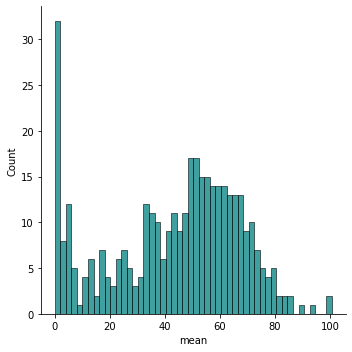

In [ ]:
# To plot an histogram with the means
sns.displot(data = MCF7_unf_describe.iloc[1], bins=50, color="teal")
plt.show()

As can be seen from the plot, the count of the means follows a bimodal distribution (with two peaks), one around 0 and the other around 50.\
Hence, already at this point, we can use a natural treshold to filter the cells where very few genes where expressed.

In [ ]:
print(MCF7_unf.shape)
data_no_zero = MCF7_unf

data_no_zero = data_no_zero.drop(columns=data_no_zero.columns[data_no_zero.describe().iloc[1]<=30])
# data_no_zero = data_no_zero.drop(data_no_zero.loc[data_no_zero.mean(axis=1)<=50].index)
# data_no_zero.describe()

(22934, 383)


We plot below the count of the means where we filtered out the cells with mean value below 30.

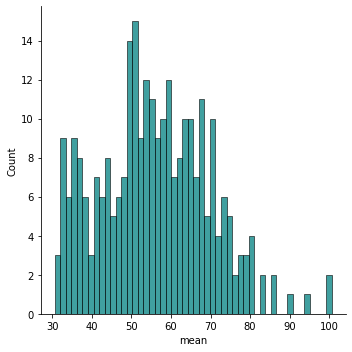

In [ ]:
# To plot an histogram with the means
sns.displot(data = data_no_zero.describe().iloc[1], bins=50, color="teal")
plt.show()

Another confirmation of this behaviour is given by the fact that in almost all cells the 50-percentile of the distribution is zero. Plotting instead the 75-percentile we can also see that  there is a peak of cells that exibihit a 75-percentile near zero and another peak that has instead a 75-percentile near 30.  Already from this basic plots we can start to formulate the hypothesis that the data at our disposal is sparse and highly not-symmetrical so we procede further is this direction.

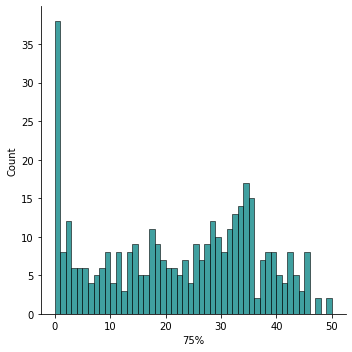

In [ ]:
# To plot a histogram with the 75-percentile 
sns.displot(data = MCF7_unf_describe.iloc[6], bins=50, color="teal")
plt.show()

Plotting the violin plots for the first 50 samples it emerges again that there are some cells with a very short line that means that the distribution is highly concentrated near zero while the cells with a very long line are those whose tails of the distribution are 'heavy' and so there is a high probability of having data points very far from the median in this samples.

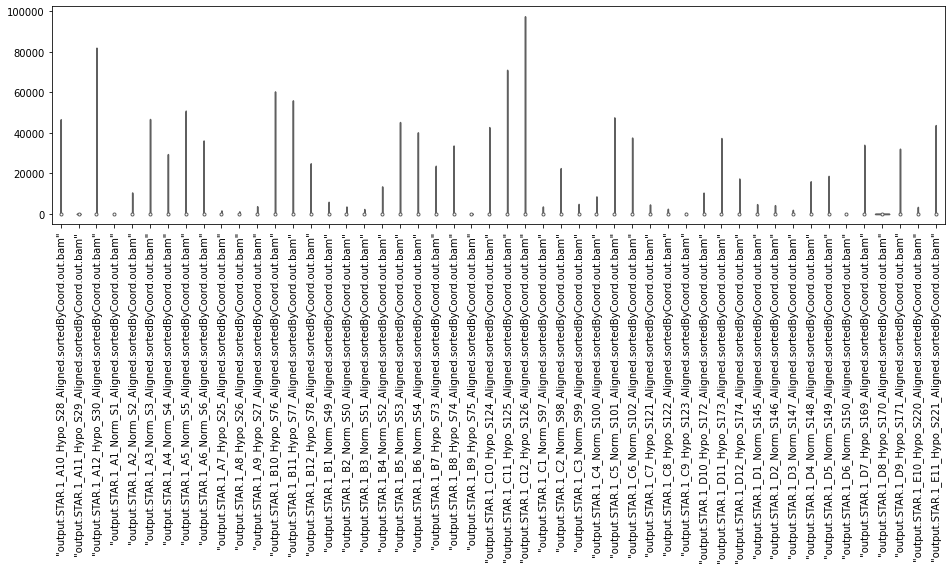

In [ ]:
# To plot a violin plot of the first 50 cells
plt.figure(figsize=(16,4))
plot=sns.violinplot(data=MCF7_unf.iloc[:, :50],palette="Set3",cut=0)
plt.setp(plot.get_xticklabels(), rotation=90)
plt.show()

To get a better visual about the distibution of genes in some specific cells, it is usefull to plot some boxplots.

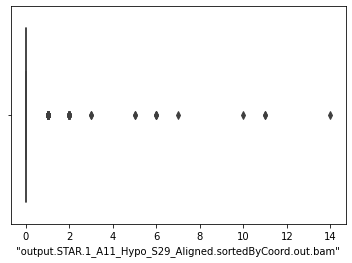

In [ ]:
cnames = list(MCF7_unf.columns)
cnames[1]
sns.boxplot(x=MCF7_unf[cnames[1]])
plt.show()

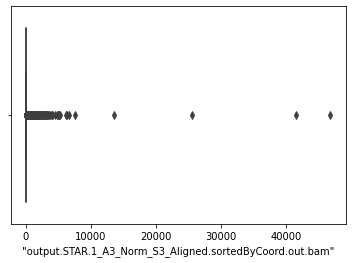

In [ ]:
cnames = list(MCF7_unf.columns)
cnames[1]
sns.boxplot(x=MCF7_unf[cnames[5]])
plt.show()

We can see both from the boxplots and the violin plots that the range of the values are much different from a cell to another. But we can see that most genes have 0 value.

---

Here we repeat the same analysis using the transpose of the data, in order to see which genes are highly expressed with respect to others

In [ ]:
# To transpose the data
MCF7_unf_transposed = MCF7_unf.transpose()
MCF7_unf_transposed

"WASH7P"  "MIR6859-1"  \
"output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoo...         0            0   
"output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoo...         0            0   
"output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoo...         0            0   
"output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord...         0            0   
"output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord...         0            0   
...                                                      ...          ...   
"output.STAR.4_H5_Norm_S359_Aligned.sortedByCoo...         0            0   
"output.STAR.4_H6_Norm_S360_Aligned.sortedByCoo...         0            0   
"output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoo...         1            0   
"output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoo...         0            0   
"output.STAR.4_H9_Hypo_S381_Aligned.sortedByCoo...         1            0   

                                                    "WASH9P"  "OR4F29"  \
"output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoo...         1         0   
"output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoo...         0         0   
"output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoo...         0         0   
"output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord...         0         0   
"output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord...         0         0   
...                                                      ...       ...   
"output.STAR.4_H5_Norm_S359_Aligned.sortedByCoo...         0         0   
"output.STAR.4_H6_Norm_S360_Aligned.sortedByCoo...         1         0   
"output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoo...         1         0   
"output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoo...         4         1   
"output.STAR.4_H9_Hypo_S381_Aligned.sortedByCoo...         5         0   

                                                    "MTND1P23"  "MTND2P28"  \
"output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoo...           0           2   
"output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoo...           0           0   
"output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoo...           0           1   
"output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord...           0           0   
"output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord...           0           0   
...                                                        ...         ...   
"output.STAR.4_H5_Norm_S359_Aligned.sortedByCoo...           0           0   
"output.STAR.4_H6_Norm_S360_Aligned.sortedByCoo...           0           2   
"output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoo...           0           7   
"output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoo...           0          29   
"output.STAR.4_H9_Hypo_S381_Aligned.sortedByCoo...           0           5   

                                                    "MTCO1P12"  "MTCO2P12"  \
"output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoo...           2           0   
"output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoo...           0           0   
"output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoo...           1           1   
"output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord...           0           0   
"output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord...           0           0   
...                                                        ...         ...   
"output.STAR.4_H5_Norm_S359_Aligned.sortedByCoo...           1           0   
"output.STAR.4_H6_Norm_S360_Aligned.sortedByCoo...           5           5   
"output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoo...           0           0   
"output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoo...           4           0   
"output.STAR.4_H9_Hypo_S381_Aligned.sortedByCoo...           3           0   

                                                    "MTATP8P1"  "MTATP6P1"  \
"output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoo...           0          29   
"output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoo...           0           0   
"output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoo...           0          12   
"output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord...  

In [ ]:
# To check the information about the transposed dataset
MCF7_unf_transposed_describe = MCF7_unf_transposed.describe()
MCF7_unf_transposed_describe

"WASH7P"  "MIR6859-1"    "WASH9P"   "OR4F29"  "MTND1P23"  "MTND2P28"  \
count  383.000000   383.000000  383.000000  383.00000  383.000000  383.000000   
mean     0.133159     0.026110    1.344648    0.05483    0.049608    6.261097   
std      0.618664     0.249286    2.244543    0.31477    0.229143    7.565749   
min      0.000000     0.000000    0.000000    0.00000    0.000000    0.000000   
25%      0.000000     0.000000    0.000000    0.00000    0.000000    0.000000   
50%      0.000000     0.000000    0.000000    0.00000    0.000000    3.000000   
75%      0.000000     0.000000    2.000000    0.00000    0.000000   10.000000   
max      9.000000     4.000000   20.000000    3.00000    2.000000   45.000000   

       "MTCO1P12"  "MTCO2P12"  "MTATP8P1"   "MTATP6P1"  ...     "MT-TH"  \
count  383.000000  383.000000  383.000000   383.000000  ...  383.000000   
mean     4.681462    0.524804    0.073107   222.054830  ...    1.060052   
std      6.232649    0.980857    0.298131   262.616874  ...    1.990566   
min      0.000000    0.000000    0.000000     0.000000  ...    0.000000   
25%      0.000000    0.000000    0.000000    23.000000  ...    0.000000   
50%      2.000000    0.000000    0.000000    98.000000  ...    0.000000   
75%      7.000000    1.000000    0.000000   370.500000  ...    1.000000   
max     36.000000    6.000000    2.000000  1662.000000  ...   15.000000   

         "MT-TS2"    "MT-TL2"     "MT-ND5"     "MT-ND6"     "MT-TE"  \
count  383.000000  383.000000   383.000000   383.000000  383.000000   
mean     0.443864    3.146214  1016.477807   204.600522    5.049608   
std      1.090827    4.265352  1009.444811   220.781927    6.644302   
min      0.000000    0.000000     0.000000     0.000000    0.000000   
25%      0.000000    0.000000   172.000000    30.500000    0.000000   
50%      0.000000    1.000000   837.000000   152.000000    3.000000   
75%      0.000000    5.000000  1549.000000   294.000000    7.000000   
max      8.000000   22.000000  8115.000000  2002.000000   46.000000   

          "MT-CYB"     "MT-TT"     "MT-TP"     "MAFIP"  
count    383.00000  383.000000  383.000000  383.000000  
mean    2374.97389    2.083551    5.626632    1.749347  
std     2920.39000    3.372714    7.511180    3.895204  
min        0.00000    0.000000    0.000000    0.000000  
25%      216.50000    0.000000    0.000000    0.000000  
50%      785.00000    0.000000    3.000000    0.000000  
75%     4059.00000    3.000000    8.000000    2.000000  
max    16026.00000   22.000000   56.000000   32.000000  

[8 rows x 22934 columns]

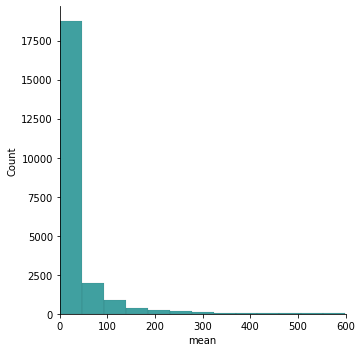

In [ ]:
# to plot a histogram with the mean of the expression of the genes
sns.displot(data = MCF7_unf_transposed_describe.iloc[1], bins=500, color="teal")
# we limit the x axis since most of the values are around 0
plt.xlim(0, 600)
plt.show()

From this plot it is simple to see that most of the genes are not present in most of the cells.
The same can be seen for the 75% percetile.

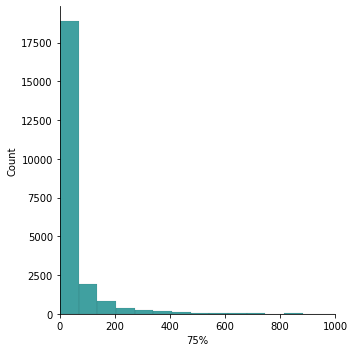

In [ ]:
# to plot a histogram with the 75% percentile of the expression of the genes
sns.displot(data = MCF7_unf_transposed_describe.iloc[6], bins=500, color="teal")
# we limit the x axis since most of the values are around 0
plt.xlim(0, 1000)
plt.show()

From this plots we can deduce that specific genes are not expressed in most of the cells.

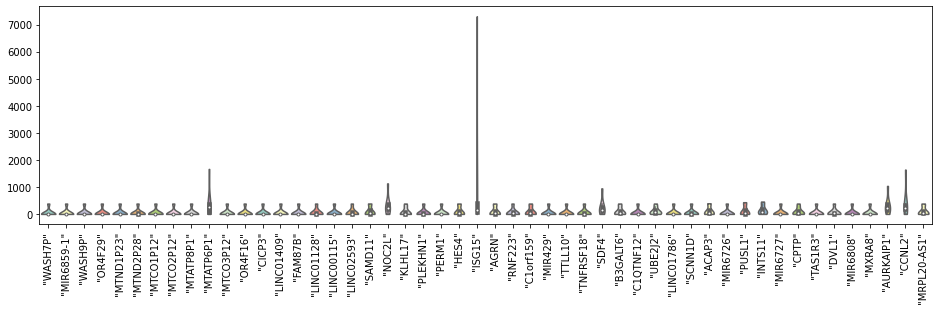

In [ ]:
# To plot a violin plot of the first 50 genes
df_small = MCF7_unf_transposed_describe.iloc[:, :50]
plt.figure(figsize=(16,4))
plot=sns.violinplot(data=df_small,palette="Set3",cut=0)
plt.setp(plot.get_xticklabels(), rotation=90)
plt.show()

Also the violin plots show that most of the probability of a gene to be near the 0 values is much higher than any other value.

##### Correlation

In order to understand if there are some genes that are highly correlated we plot che a table with the correlation of the first 25 genes.

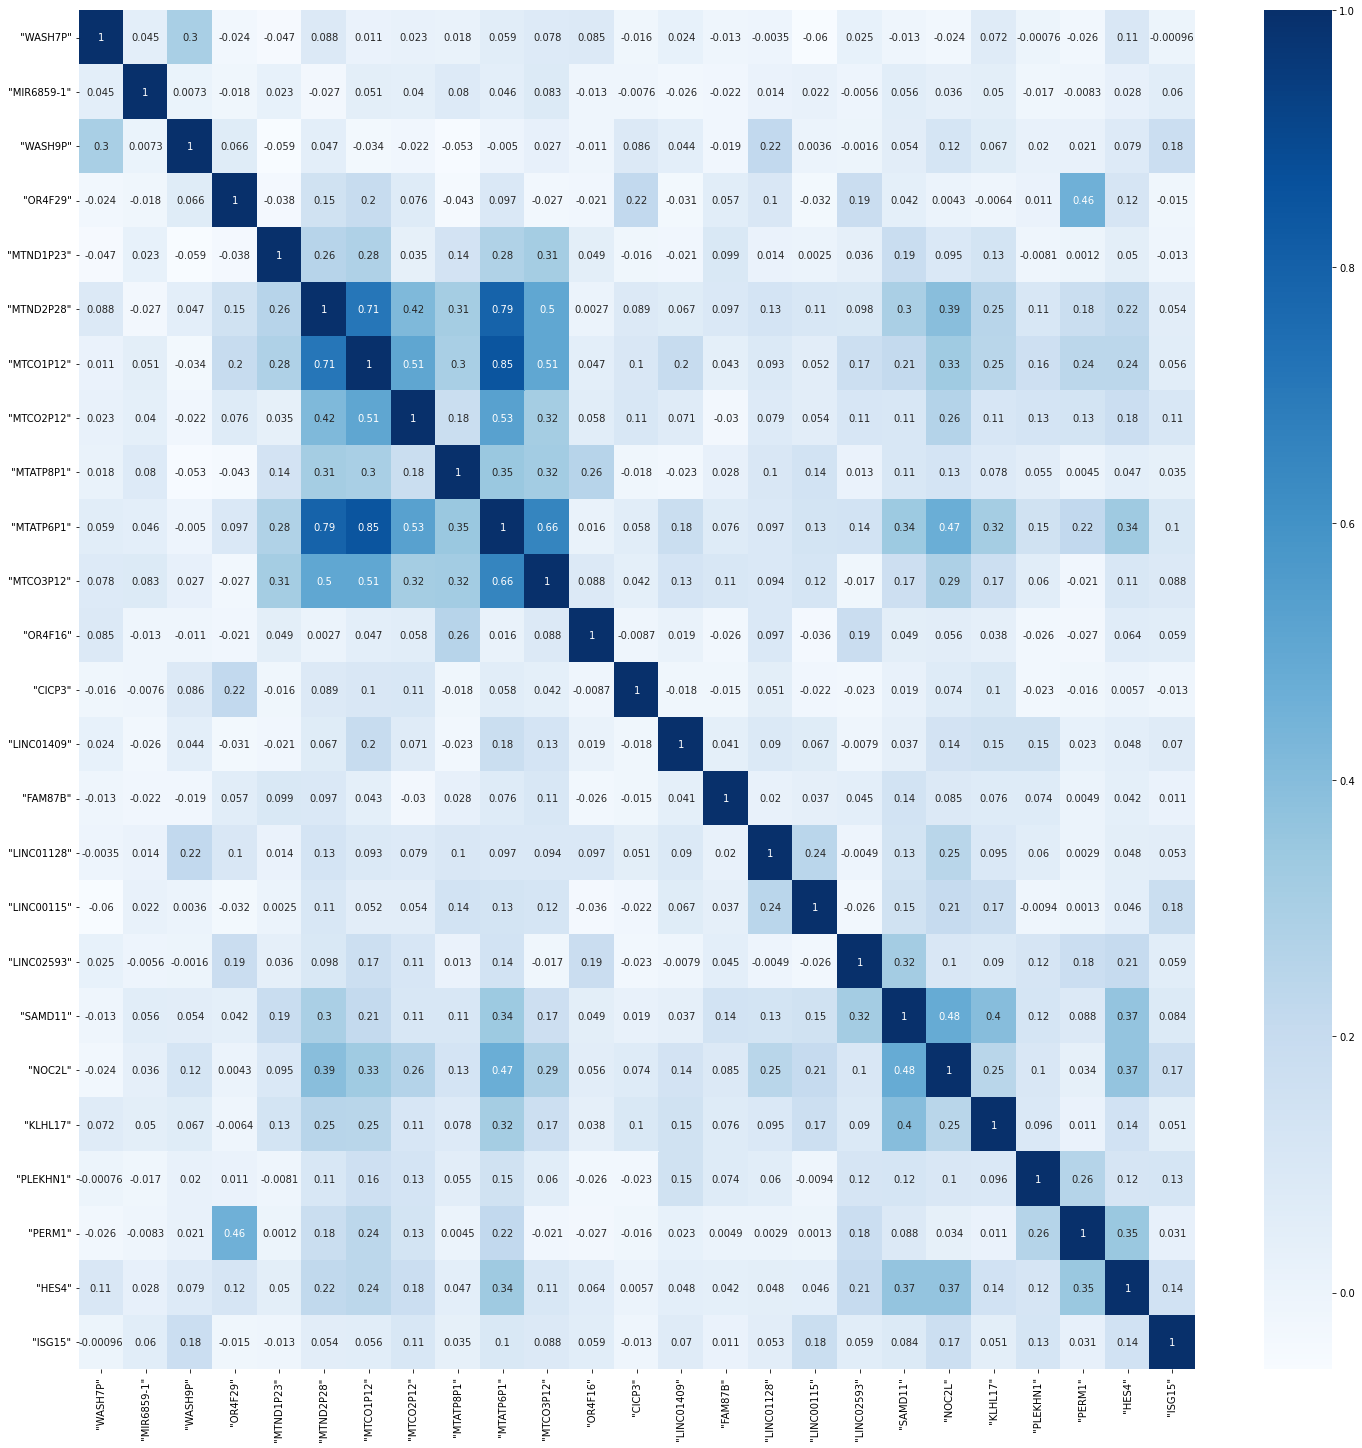

In [ ]:
# To see the correlation between genes
df_new = MCF7_unf.transpose().iloc[:,:25]
plt.figure(figsize=(25,25))
sns.heatmap(df_new.corr(),cbar=True,annot=True,cmap='Blues')
plt.show()

From the table we deduce that the genes interact between them in a quite complex way: some are positively correlated while others are negatively correlated. Interestingly there are some genes that have a very high correlation; this could mean that they are the same gene or they are genes with a very high level of similarity.

---

##### Outliers


We can now look for **outliers.** And let's try to eliminate them and look again at the violin plots.

In [ ]:
# To find interquartile range
Q1 = MCF7_unf.quantile(0.25)
Q3 = MCF7_unf.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

"output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam"    17.0
"output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam"     0.0
"output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam"     5.0
"output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam"       0.0
"output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam"       7.0
                                                              ... 
"output.STAR.4_H5_Norm_S359_Aligned.sortedByCoord.out.bam"     9.0
"output.STAR.4_H6_Norm_S360_Aligned.sortedByCoord.out.bam"    27.0
"output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoord.out.bam"    30.0
"output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoord.out.bam"    38.0
"output.STAR.4_H9_Hypo_S381_Aligned.sortedByCoord.out.bam"    33.0
Length: 383, dtype: float64


In [ ]:
# To find values in the interquartile range
df_noOut = MCF7_unf[~((MCF7_unf < (Q1 - 1.5 * IQR)) |(MCF7_unf > (Q3 + 1.5 * IQR))).any(axis=1)]
df_noOut.shape
df_noOut.head(3)

"output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam"  \
"MIR6859-1"                                                  0            
"CICP3"                                                      0            
"FAM87B"                                                     0            

             "output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam"  \
"MIR6859-1"                                                  0            
"CICP3"                                                      0            
"FAM87B"                                                     0            

             "output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam"  \
"MIR6859-1"                                                  0            
"CICP3"                                                      0            
"FAM87B"                                                     0            

             "output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam"  \
"MIR6859-1"                                                  0          
"CICP3"                                                      0          
"FAM87B"                                                     0          

             "output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam"  \
"MIR6859-1"                                                  0          
"CICP3"                                                      0          
"FAM87B"                                                     0          

             "output.STAR.1_A3_Norm_S3_Aligned.sortedByCoord.out.bam"  \
"MIR6859-1"                                                  0          
"CICP3"                                                      0          
"FAM87B"                                                     0          

             "output.STAR.1_A4_Norm_S4_Aligned.sortedByCoord.out.bam"  \
"MIR6859-1"                                                  0          
"CICP3"                                                      0          
"FAM87B"                                                     0          

             "output.STAR.1_A5_Norm_S5_Aligned.sortedByCoord.out.bam"  \
"MIR6859-1"                                                  0          
"CICP3"                                                      0          
"FAM87B"                                                     0          

             "output.STAR.1_A6_Norm_S6_Aligned.sortedByCoord.out.bam"  \
"MIR6859-1"                                                  0          
"CICP3"                                                      0          
"FAM87B"                                                     2          

             "output.STAR.1_A7_Hypo_S25_Aligned.sortedByCoord.out.bam"  ...  \
"MIR6859-1"                                                  0          ...   
"CICP3"                                                      0          ...   
"FAM87B"                                                     0          ...   

             "output.STAR.4_H14_Hypo_S383_Aligned.sortedByCoord.out.bam"  \
"MIR6859-1"                                                  0             
"CICP3"                                                      0             
"FAM87B"                                                     0             

             "output.STAR.4_H1_Norm_S355_Aligned.sortedByCoord.out.bam"  \
"MIR6859-1"                                                  0            
"CICP3"                                                      0            
"FAM87B"                                                     1            

             "output.STAR.4_H2_Norm_S356_Aligned.sortedByCoord.out.bam"  \
"MIR6859-1"                                                  0            
"CICP3"                                                      0            
"FAM87B"                                                     0            

             "output.STAR.4_H3_Norm_S357_Aligned.sortedByCoord.out.bam"  \
"MIR6859-1"                                          

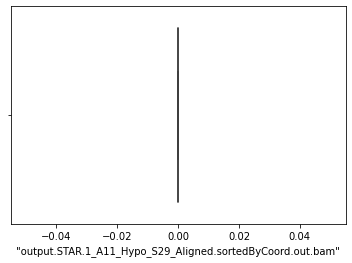

In [ ]:
sns.boxplot(x=df_noOut[cnames[1]])
plt.show()

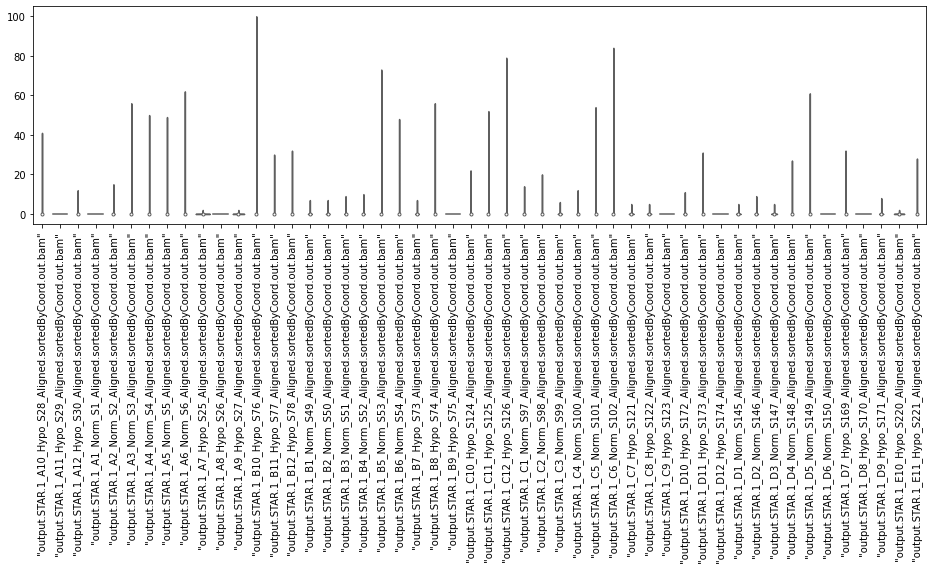

In [ ]:
df_noOut_small = df_noOut.iloc[:, :50]
plt.figure(figsize=(16,4))
plot=sns.violinplot(data=df_noOut_small,palette="Set3",cut=0)
plt.setp(plot.get_xticklabels(), rotation=90)
plt.show()

As seen from the data, most of the genes are expressed in the last quartile. Hence, in this case, the outliers carry most of the information and by removing them we would lose a great part of it. **That is due to the fact that the data is sparse,** and that makes it harder to just exclude outliers from the dataset.

##### Sparsity

We have tried to quantify the sparsity using an index given by the difference between 1 and the ratio of nonzero values and the size of the data set. This tells us that around 60% of the data is 0, hence highly sparse.

In [ ]:
# create a 2-D representation of the matrix
MCF7_arr = np.array(MCF7_unf)
print("Dense matrix representation: \n", MCF7_arr)

Dense matrix representation: 
 [[ 0  0  0 ...  1  0  1]
 [ 0  0  0 ...  0  0  0]
 [ 1  0  0 ...  1  4  5]
 ...
 [ 0  0  0 ...  0  2  2]
 [ 5  0  0 ...  2 28 11]
 [ 8  0  0 ...  0  1  4]]


In [ ]:
# calculate sparsity
sparsity = 1.0 - count_nonzero(MCF7_arr) / MCF7_arr.size
print(sparsity)

0.6021531646834907


From here we can deduce that around 60% of the data is equal to zero.

Therefore, we tried to represent the data set as a sparse matrix using the csr_matrix() function, and analysed the differences in memory storage between the two representations. In practice, the original numpy array takes almost the double of the storage compared to the sparse matrix, that is why this representation can be an advantage.


In [ ]:
# convert to sparse matrix representation 
S = csr_matrix(MCF7_arr)
print("Sparse matrix: \n",S)

Sparse matrix: 
   (0, 20)	1
  (0, 49)	1
  (0, 72)	1
  (0, 85)	1
  (0, 106)	2
  (0, 126)	1
  (0, 127)	1
  (0, 133)	2
  (0, 158)	9
  (0, 166)	1
  (0, 170)	1
  (0, 171)	1
  (0, 186)	1
  (0, 189)	3
  (0, 195)	1
  (0, 199)	2
  (0, 209)	1
  (0, 210)	1
  (0, 218)	1
  (0, 228)	2
  (0, 235)	1
  (0, 270)	4
  (0, 276)	1
  (0, 292)	1
  (0, 314)	2
  :	:
  (22933, 334)	12
  (22933, 336)	2
  (22933, 337)	1
  (22933, 340)	2
  (22933, 341)	3
  (22933, 342)	1
  (22933, 345)	3
  (22933, 346)	1
  (22933, 347)	6
  (22933, 348)	5
  (22933, 350)	5
  (22933, 351)	5
  (22933, 352)	1
  (22933, 357)	1
  (22933, 358)	6
  (22933, 361)	4
  (22933, 363)	2
  (22933, 369)	1
  (22933, 371)	2
  (22933, 372)	1
  (22933, 376)	2
  (22933, 377)	1
  (22933, 379)	6
  (22933, 381)	1
  (22933, 382)	4


In [ ]:
# To calculate the memory usage of the original dataset
print('MCF7_arr.nbytes: {0} bytes'.format(MCF7_arr.nbytes))
print('sys.getsizeof(MCF7_arr): {0} bytes'.format(sys.getsizeof(MCF7_arr)))

MCF7_arr.nbytes: 70269776 bytes
sys.getsizeof(MCF7_arr): 70269896 bytes


In [ ]:
# To calculate the memory usage of the sparse matrix
S.data.nbytes + S.indptr.nbytes + S.indices.nbytes

42026652

In [ ]:
# convert back to 2-D representation of the matrix
B = S.todense()
print("Dense matrix: \n", B)

Dense matrix: 
 [[ 0  0  0 ...  1  0  1]
 [ 0  0  0 ...  0  0  0]
 [ 1  0  0 ...  1  4  5]
 ...
 [ 0  0  0 ...  0  2  2]
 [ 5  0  0 ...  2 28 11]
 [ 8  0  0 ...  0  1  4]]


In [ ]:
B.nbytes

70269776

We're happy to see that the sparse matrix occupy less space than the original data (without loosing any information)

---

##### Checking the Normality

We then analysed the skewness and Kurtosis of a single cell of the data to check whether it is normalised, but because most of these values are not near 0, we can deduce that most of the cells have a distribution that differ much from the normal one.\


In [ ]:
#np.sum(MCF7_unf_sum.iloc[4] != 0)
MCF7_noOut = MCF7_unf

In [ ]:
cnames = MCF7_unf.columns

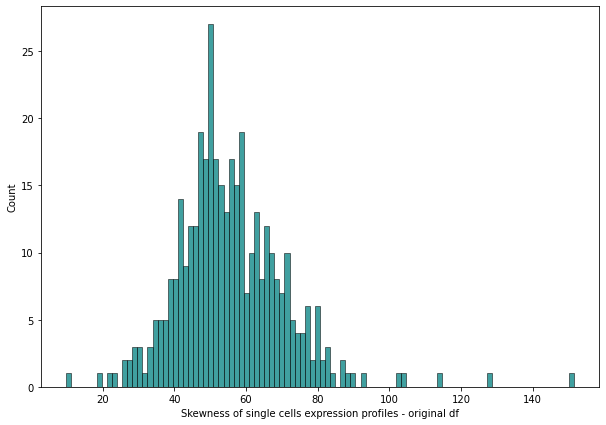

In [ ]:
# To calculate the skewness
from scipy.stats import kurtosis, skew
from sklearn.preprocessing import PowerTransformer, QuantileTransformer

colN = np.shape(MCF7_unf)[1]
colN
df_skew_cells = []
for i in range(colN) :     
     v_df = MCF7_unf[cnames[i]]
     df_skew_cells += [skew(v_df)]   
  #  df_skew_cells += [df[cnames[i]].skew()]
df_skew_cells

plt.figure(figsize=(10,7))
sns.histplot(df_skew_cells, bins=100, color="teal")
plt.xlabel('Skewness of single cells expression profiles - original df')
plt.show()

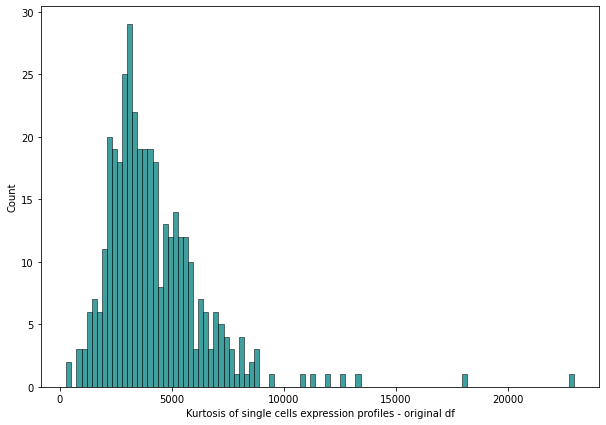

In [ ]:
# To calculate the kurtosis
df_kurt_cells = []
for i in range(colN) :     
     v_df = MCF7_unf[cnames[i]]
     df_kurt_cells += [kurtosis(v_df)]   
 #   df_kurt_cells += [df[cnames[i]].kurt()]
df_kurt_cells

plt.figure(figsize=(10,7))
sns.histplot(df_kurt_cells, bins=100, color="teal")
plt.xlabel('Kurtosis of single cells expression profiles - original df')
plt.show()

<Figure size 720x504 with 0 Axes>

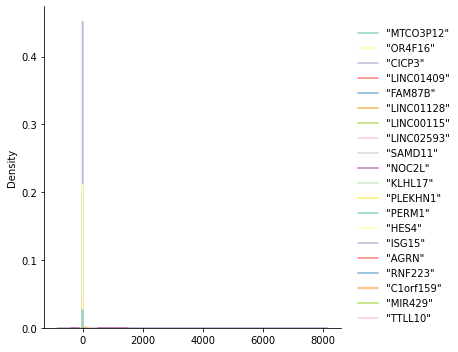

In [ ]:
# To check normality of the genes
df_small = MCF7_unf.transpose().iloc[:, 10:30]  #just selecting part of the samples so run time not too long
plt.figure(figsize=(10,7))
sns.displot(data=df_small,palette="Set3",kind="kde", bw_adjust=2)
plt.show()

To show that the normality assumption is not satisfied we the qqplot() function.

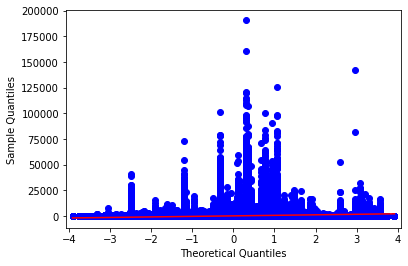

In [ ]:
# QQ Plot
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(100) + 50
# q-q plot
qqplot(MCF7_unf, line='s')
plt.show()

We compare the QQplot in the filtered and normalized case:

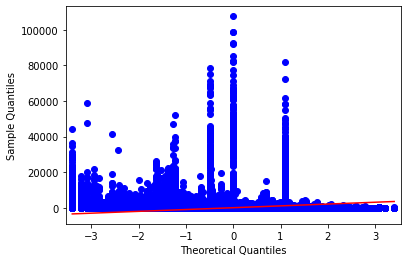

In [ ]:
# QQ Plot
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(100) + 50
# q-q plot
qqplot(MCF7_f_n, line='s')
plt.show()

In reality, it's very unlikely to find data that are normally distributed. Also in this case, as we can see by plotting the QQ-plot, the data are not normally distributed, in fact, the data points in the plot are not close to the red line.

Another approach we took was to try to filter the data by dropping all the rows (genes) that have third quantile smaller than 95 and by dropping the columns (cells) that have third quantile smaller than 14. These two numbers allows us to get a dataset that has dimensions similar to the ones of the filtered and normalized dataset. Unfortunately, they do not coincide.

In [ ]:
data = MCF7_unf
data_d = data.T.describe()

In [ ]:
data_d_n = data.describe()

In [ ]:
data1 = data.drop(data.loc[data_d.iloc[6]<=95].index)
print(data1.shape)
data2 = data1.drop(columns=data1.columns[data_d_n.iloc[6]<=14])
print(data2.shape)
print(len([i for i in list(MCF7_f_n.index) if i in list(data2.index)]))
#print(data2)

(3032, 383)
(3032, 252)
544


###### Log_2

We can now try to compute the log_2 of all the dataset, after adding 1 to it (do don't have problems with the zeros), and see if it can be a good normalization by looking again to the plot of the skenwness and the kurtosis.

In [ ]:
MCF7_unf_plus = MCF7_unf + 1
MCF7_unf_log2 = MCF7_unf_plus.apply(np.log2)
MCF7_unf_log2.describe()

"output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam"  \
count                                       22934.000000            
mean                                            1.889979            
std                                             2.743667            
min                                             0.000000            
25%                                             0.000000            
50%                                             0.000000            
75%                                             4.169925            
max                                            15.512524            

       "output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam"  \
count                                       22934.000000            
mean                                            0.009665            
std                                             0.115893            
min                                             0.000000            
25%                                             0.000000            
50%                                             0.000000            
75%                                             0.000000            
max                                             3.906891            

       "output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam"  \
count                                       22934.000000            
mean                                            1.732075            
std                                             3.060936            
min                                             0.000000            
25%                                             0.000000            
50%                                             0.000000            
75%                                             2.584963            
max                                            16.324181            

       "output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam"  \
count                                       22934.000000          
mean                                            0.408770          
std                                             0.932712          
min                                             0.000000          
25%                                             0.000000          
50%                                             0.000000          
75%                                             0.000000          
max                                             8.179909          

       "output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam"  \
count                                       22934.000000          
mean                                            1.563776          
std                                             2.158735          
min                                             0.000000          
25%                                             0.000000          
50%                                             0.000000          
75%                                             3.000000          
max                                            13.369461          

       "output.STAR.1_A3_Norm_S3_Aligned.sortedByCoord.out.bam"  \
count                                       22934.000000          
mean                                            2.174915          
std                                             2.936550          
min                                             0.000000          
25%                                             0.000000          
50%                                             0.000000          
75%                                             4.584963          
max                                            15.515977          

       "output.STAR.1_A4_Norm_S4_Aligned.sortedByCoord.out.bam"  \
count                                       22934.000000          
mean                                            2.539393          
std                                             3.166716          
min                                             0.000000     

Histogram of the mean

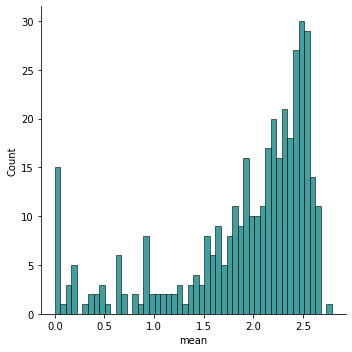

In [ ]:
# To plot an histogram with the means
sns.displot(data = MCF7_unf_log2.describe().iloc[1], bins=50, color="teal")
plt.show()

Histogram of the third quantile

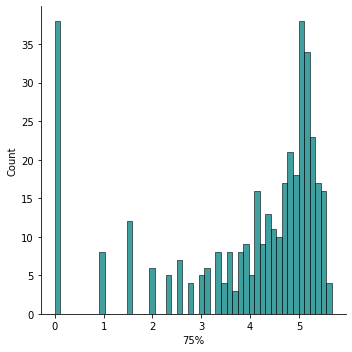

In [ ]:
# To plot an histogram with the third quantile
sns.displot(data = MCF7_unf_log2.describe().iloc[6], bins=50, color="teal")
plt.show()

We can see that we still have many zeroes, but way less than before. We have also a much smaller range of values.

Let's now plot again the skeness and the curtosis of the cells, but of the dataset where we pwerformed the logarithms.

In [ ]:
cnames = MCF7_unf_log2.columns

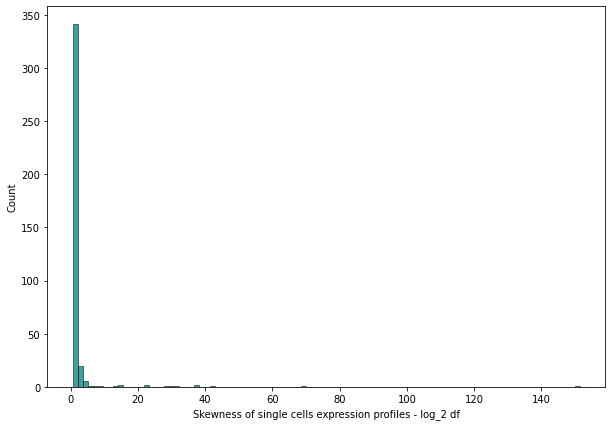

In [ ]:
# To calculate the skewness
from scipy.stats import kurtosis, skew

colN = np.shape(MCF7_unf_log2)[1]
colN
df_skew_cells = []
for i in range(colN) :     
     v_df = MCF7_unf_log2[cnames[i]]
     df_skew_cells += [skew(v_df)]   
  #  df_skew_cells += [df[cnames[i]].skew()]
df_skew_cells

plt.figure(figsize=(10,7))
sns.histplot(df_skew_cells, bins=100, color="teal")
plt.xlabel('Skewness of single cells expression profiles - log_2 df')
plt.show()

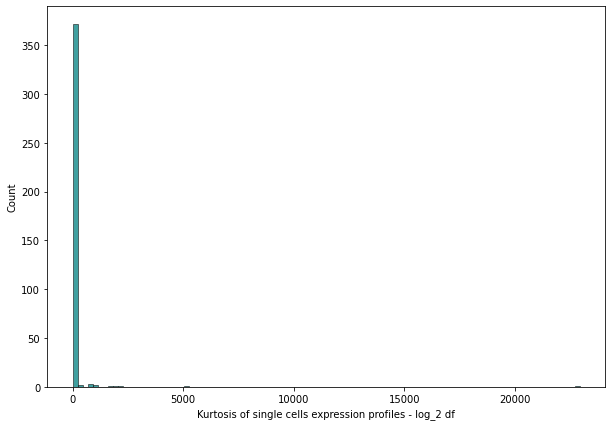

In [ ]:
# To calculate the kurtosis
df_kurt_cells = []
for i in range(colN) :     
     v_df = MCF7_unf_log2[cnames[i]]
     df_kurt_cells += [kurtosis(v_df)]   
 #   df_kurt_cells += [df[cnames[i]].kurt()]
df_kurt_cells

plt.figure(figsize=(10,7))
sns.histplot(df_kurt_cells, bins=100, color="teal")
plt.xlabel('Kurtosis of single cells expression profiles - log_2 df')
plt.show()

We can definetely see that the data is much more normalized because most of the skewnwss and curtosis (not of all cells but most) is equal to 0.

#### HCC1806

We continue by analyzing the HCC1806 dataset.

##### Understanding the data

In [ ]:
print("Dataframe dimensions:", np.shape(HCC1806_unf))
print("First column: ", HCC1806_unf.iloc[ : , 0])

Dataframe dimensions: (23396, 243)
First column:  "WASH7P"         0
"CICP27"         0
"DDX11L17"       0
"WASH9P"         0
"OR4F29"         2
              ... 
"MT-TE"         22
"MT-CYB"      4208
"MT-TT"         26
"MT-TP"         66
"MAFIP"          0
Name: "output.STAR.PCRPlate1A10_Normoxia_S123_Aligned.sortedByCoord.out.bam", Length: 23396, dtype: int64


**Let's now look at some informations about the dataframe.**

In [ ]:
# To check the characteristics of each cell
HCC1806_unf_describe = HCC1806_unf.describe()
HCC1806_unf_describe

"output.STAR.PCRPlate1A10_Normoxia_S123_Aligned.sortedByCoord.out.bam"  \
count                                       23396.000000                        
mean                                           99.565695                        
std                                           529.532443                        
min                                             0.000000                        
25%                                             0.000000                        
50%                                             0.000000                        
75%                                            51.000000                        
max                                         35477.000000                        

       "output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.sortedByCoord.out.bam"  \
count                                       23396.000000                       
mean                                          207.678278                       
std                                           981.107905                       
min                                             0.000000                       
25%                                             0.000000                       
50%                                             0.000000                       
75%                                           125.000000                       
max                                         69068.000000                       

       "output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sortedByCoord.out.bam"  \
count                                       23396.000000                     
mean                                            9.694734                     
std                                            65.546050                     
min                                             0.000000                     
25%                                             0.000000                     
50%                                             0.000000                     
75%                                             5.000000                     
max                                          6351.000000                     

       "output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.sortedByCoord.out.bam"  \
count                                       23396.000000                      
mean                                          150.689007                      
std                                           976.936548                      
min                                             0.000000                      
25%                                             0.000000                      
50%                                             0.000000                      
75%                                            40.000000                      
max                                         70206.000000                      

       "output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sortedByCoord.out.bam"  \
count                                       23396.000000                    
mean                                           35.700504                    
std                                           205.885369                    
min                                             0.000000                    
25%                                             0.000000                    
50%                                             0.000000                    
75%                                            22.000000                    
max                                         17326.000000                    

       "output.STAR.PCRPlate1A4_Hypoxia_S8_Aligned.sortedByCoord.out.bam"  \
count                                       23396.000000                    
mean                                           47.088434                    
std                                           545.367706                    
min                                             0.000000                    
25%                                             0.000000      

As in the MCF7 dataset, a feature that emerges is that some cells have the max value much higher than the mean, for example in the first column the mean is equal to 99.565695 while max is equal to 35477; this makes us think that in some cells there are genes that are extremely characteristic compared to others and these genes will be the ones of greatest interest for us but it is still early to say it ...

Plotting the count of the means in the cells through an histogram confirms the fact that there are several peaks, the greatest one being at around 45. The data is dishomogeneus.

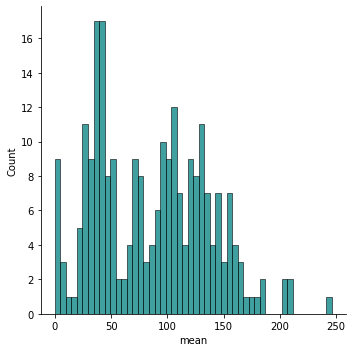

In [ ]:
# To plot an histogram with the means
sns.displot(HCC1806_unf_describe.iloc[1], bins=50, color="teal")
plt.show()

We can see that, differently than the MCF7 dataframe, less cells have mean of genes equal to 0.\
By plotting the third quantile, it can be seen that there is a peak at around 25.\
Much more interesting is the fact that, in general, it seems that the average 75% quantile is smaller than the mean. This is probably due to the fact that we have many cells with 0-value.

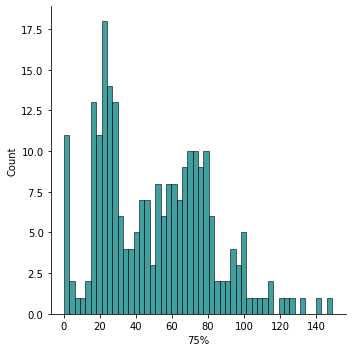

In [ ]:
# To plot a histogram with the 75-percentile
sns.displot(data = HCC1806_unf_describe.iloc[6], bins=50, color="teal")
plt.show()

Plotting the violin plots for the first 50 samples it emerges again that there are some cells with a very short line that means that the distribution is highly concentrated near zero while the cells with a very long line are those whose tails of the distribution are 'heavy' and so there is a high probability of having data points very far from the median in this samples.

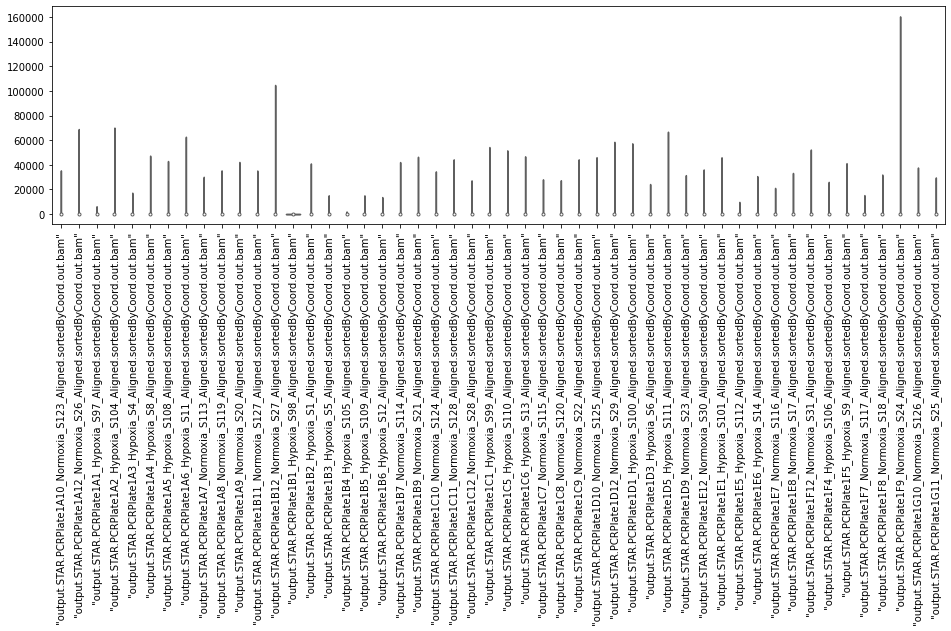

In [ ]:
# To plot a violin plot of the first 50 cells
plt.figure(figsize=(16,4))
plot=sns.violinplot(data=HCC1806_unf.iloc[:, :50],palette="Set3",cut=0)
plt.setp(plot.get_xticklabels(), rotation=90)
plt.show()

To get a better visual about the distibution of genes in some specific cells, it is usefull to plot some boxplots.

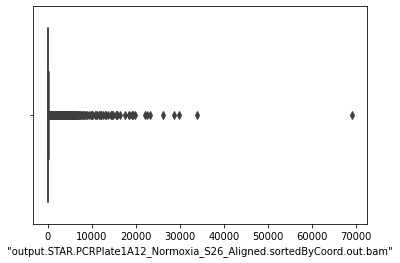

In [ ]:
cnames = list(HCC1806_unf.columns)
cnames[1]
sns.boxplot(x=HCC1806_unf[cnames[1]])
plt.show()

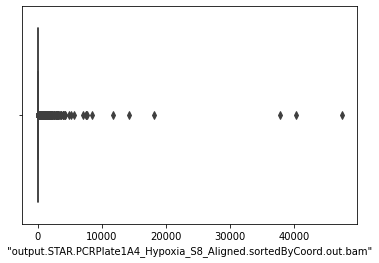

In [ ]:
cnames = list(HCC1806_unf.columns)
cnames[1]
sns.boxplot(x=HCC1806_unf[cnames[5]])
plt.show()

We can see both from the boxplots and the violin plots that the range of the values are much different from a cell to another. But we can see that most genes have 0 value.

---

Here we repeat the same analysis using the transpose of the data, in order to see which genes are highly expressed with respect to others

In [ ]:
# To transpose the data
HCC1806_unf_transposed = HCC1806_unf.transpose()
HCC1806_unf_transposed

"WASH7P"  "CICP27"  \
"output.STAR.PCRPlate1A10_Normoxia_S123_Aligned...         0         0   
"output.STAR.PCRPlate1A12_Normoxia_S26_Aligned....         0         0   
"output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.so...         0         0   
"output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.s...         0         0   
"output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sor...         0         0   
...                                                      ...       ...   
"output.STAR.PCRPlate4H10_Normoxia_S210_Aligned...         0         0   
"output.STAR.PCRPlate4H11_Normoxia_S214_Aligned...         0         0   
"output.STAR.PCRPlate4H2_Hypoxia_S199_Aligned.s...         0         0   
"output.STAR.PCRPlate4H7_Normoxia_S205_Aligned....         0         0   
"output.STAR.PCRPlate4H9_Normoxia_S236_Aligned....         0         0   

                                                    "DDX11L17"  "WASH9P"  \
"output.STAR.PCRPlate1A10_Normoxia_S123_Aligned...           0         0   
"output.STAR.PCRPlate1A12_Normoxia_S26_Aligned....           0         0   
"output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.so...           0         0   
"output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.s...           0         0   
"output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sor...           0         0   
...                                                        ...       ...   
"output.STAR.PCRPlate4H10_Normoxia_S210_Aligned...           0         1   
"output.STAR.PCRPlate4H11_Normoxia_S214_Aligned...           0         0   
"output.STAR.PCRPlate4H2_Hypoxia_S199_Aligned.s...           0         1   
"output.STAR.PCRPlate4H7_Normoxia_S205_Aligned....           0         0   
"output.STAR.PCRPlate4H9_Normoxia_S236_Aligned....           0         0   

                                                    "OR4F29"  "MTND1P23"  \
"output.STAR.PCRPlate1A10_Normoxia_S123_Aligned...         2         250   
"output.STAR.PCRPlate1A12_Normoxia_S26_Aligned....         0         424   
"output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.so...         0          11   
"output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.s...         0          63   
"output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sor...         0          27   
...                                                      ...         ...   
"output.STAR.PCRPlate4H10_Normoxia_S210_Aligned...         0         146   
"output.STAR.PCRPlate4H11_Normoxia_S214_Aligned...         0          37   
"output.STAR.PCRPlate4H2_Hypoxia_S199_Aligned.s...         0          83   
"output.STAR.PCRPlate4H7_Normoxia_S205_Aligned....         0          47   
"output.STAR.PCRPlate4H9_Normoxia_S236_Aligned....         0         249   

                                                    "MTND2P28"  "MTCO1P12"  \
"output.STAR.PCRPlate1A10_Normoxia_S123_Aligned...          54        1740   
"output.STAR.PCRPlate1A12_Normoxia_S26_Aligned....         100        2340   
"output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.so...           0          22   
"output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.s...          16        1020   
"output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sor...           3         303   
...                                                        ...         ...   
"output.STAR.PCRPlate4H10_Normoxia_S210_Aligned...          47         961   
"output.STAR.PCRPlate4H11_Normoxia_S214_Aligned...           6         372   
"output.STAR.PCRPlate4H2_Hypoxia_S199_Aligned.s...          30        1128   
"output.STAR.PCRPlate4H7_Normoxia_S205_Aligned....           7         258   
"output.STAR.PCRPlate4H9_Normoxia_S236_Aligned....          38         980   

                                                    "MTCO2P12"  "MTATP8P1"  \
"output.STAR.PCRPlate1A10_Normoxia_S123_Aligned...           6           1   
"output.STAR.PCRPlate1A12_Normoxia_S26_Aligned....           5           1   
"output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.so...           0           0   
"output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.s...           3           0   
"output.ST

In [ ]:
# To check the information about the transposed dataset
HCC1806_unf_transposed_describe = HCC1806_unf_transposed.describe()
HCC1806_unf_transposed_describe

"WASH7P"    "CICP27"  "DDX11L17"    "WASH9P"    "OR4F29"  "MTND1P23"  \
count  243.000000  243.000000  243.000000  243.000000  243.000000  243.000000   
mean     0.045267    0.119342    0.469136    0.255144    0.127572  117.930041   
std      0.318195    0.594531    1.455282    0.818639    0.440910  103.038022   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000   46.500000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000   94.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000  157.000000   
max      3.000000    5.000000   12.000000    6.000000    4.000000  694.000000   

       "MTND2P28"   "MTCO1P12"  "MTCO2P12"  "MTATP8P1"  ...     "MT-TH"  \
count  243.000000   243.000000  243.000000  243.000000  ...  243.000000   
mean    28.427984   904.308642    1.403292    0.378601  ...   10.358025   
std     26.062662   654.520308    1.735003    0.747361  ...   10.910199   
min      0.000000     0.000000    0.000000    0.000000  ...    0.000000   
25%      8.000000   390.500000    0.000000    0.000000  ...    2.000000   
50%     22.000000   790.000000    1.000000    0.000000  ...    7.000000   
75%     42.000000  1208.000000    2.000000    1.000000  ...   14.000000   
max    120.000000  3569.000000   12.000000    4.000000  ...   52.000000   

         "MT-TS2"    "MT-TL2"     "MT-ND5"     "MT-ND6"     "MT-TE"  \
count  243.000000  243.000000   243.000000   243.000000  243.000000   
mean     5.930041   13.493827  2290.213992   386.901235   18.246914   
std      7.040559   11.803967  1726.423259   309.276105   54.076514   
min      0.000000    0.000000     0.000000     0.000000    0.000000   
25%      1.000000    4.000000   918.000000   138.500000    4.000000   
50%      4.000000   10.000000  1848.000000   320.000000   11.000000   
75%      7.500000   20.000000  3172.000000   528.000000   20.000000   
max     43.000000   57.000000  8972.000000  1439.000000  804.000000   

           "MT-CYB"     "MT-TT"     "MT-TP"     "MAFIP"  
count    243.000000  243.000000  243.000000  243.000000  
mean    2163.588477   20.613169   46.444444    3.897119  
std     1730.393947   22.224590   47.684223    4.736193  
min        0.000000    0.000000    0.000000    0.000000  
25%      947.500000    5.000000   14.000000    0.000000  
50%     1774.000000   14.000000   38.000000    2.000000  
75%     2927.000000   30.500000   64.500000    6.000000  
max    11383.000000  154.000000  409.000000   24.000000  

[8 rows x 23396 columns]

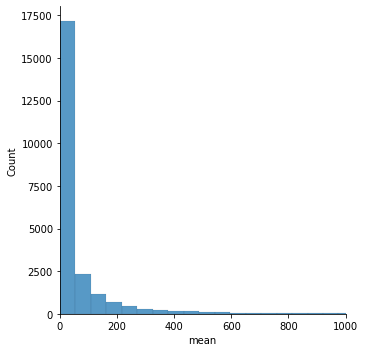

In [ ]:
# to plot a histogram with the mean of the expression of the genes
sns.displot(data = HCC1806_unf_transposed_describe.iloc[1], bins=500)
# we limit the x axis becuase most of the value is near 0
plt.xlim(0, 1000)
plt.show()

From this plot it is simple to see that most of the genes are not present in most of the cells.
The same can be seen for the 75% percetile.

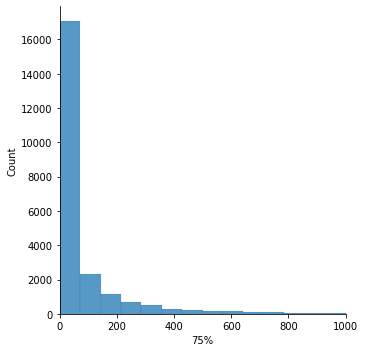

In [ ]:
# to plot a histogram with the 75% of the expression of the genes
sns.displot(data = HCC1806_unf_transposed_describe.iloc[6], bins=500)
# we limit the x axis becuase most of the value is near 0
plt.xlim(0, 1000)
plt.show()

From these plots we can deduce that specific genes are not expressed in most of the cells.

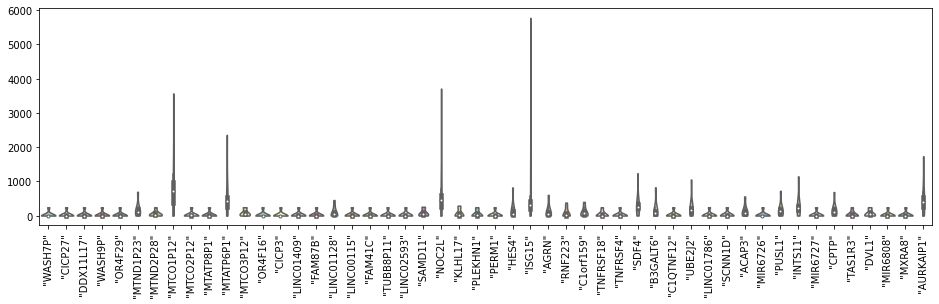

In [ ]:
# To plot a violin plot of the first 50 genes
df_small = HCC1806_unf_transposed_describe.iloc[:, :50]
plt.figure(figsize=(16,4))
plot=sns.violinplot(data=df_small,palette="Set3",cut=0)
plt.setp(plot.get_xticklabels(), rotation=90)
plt.show()

Also the violin plots show us that the probability of a gene to be near the 0 values in most cells is much higher than any other probability.

##### Correlation

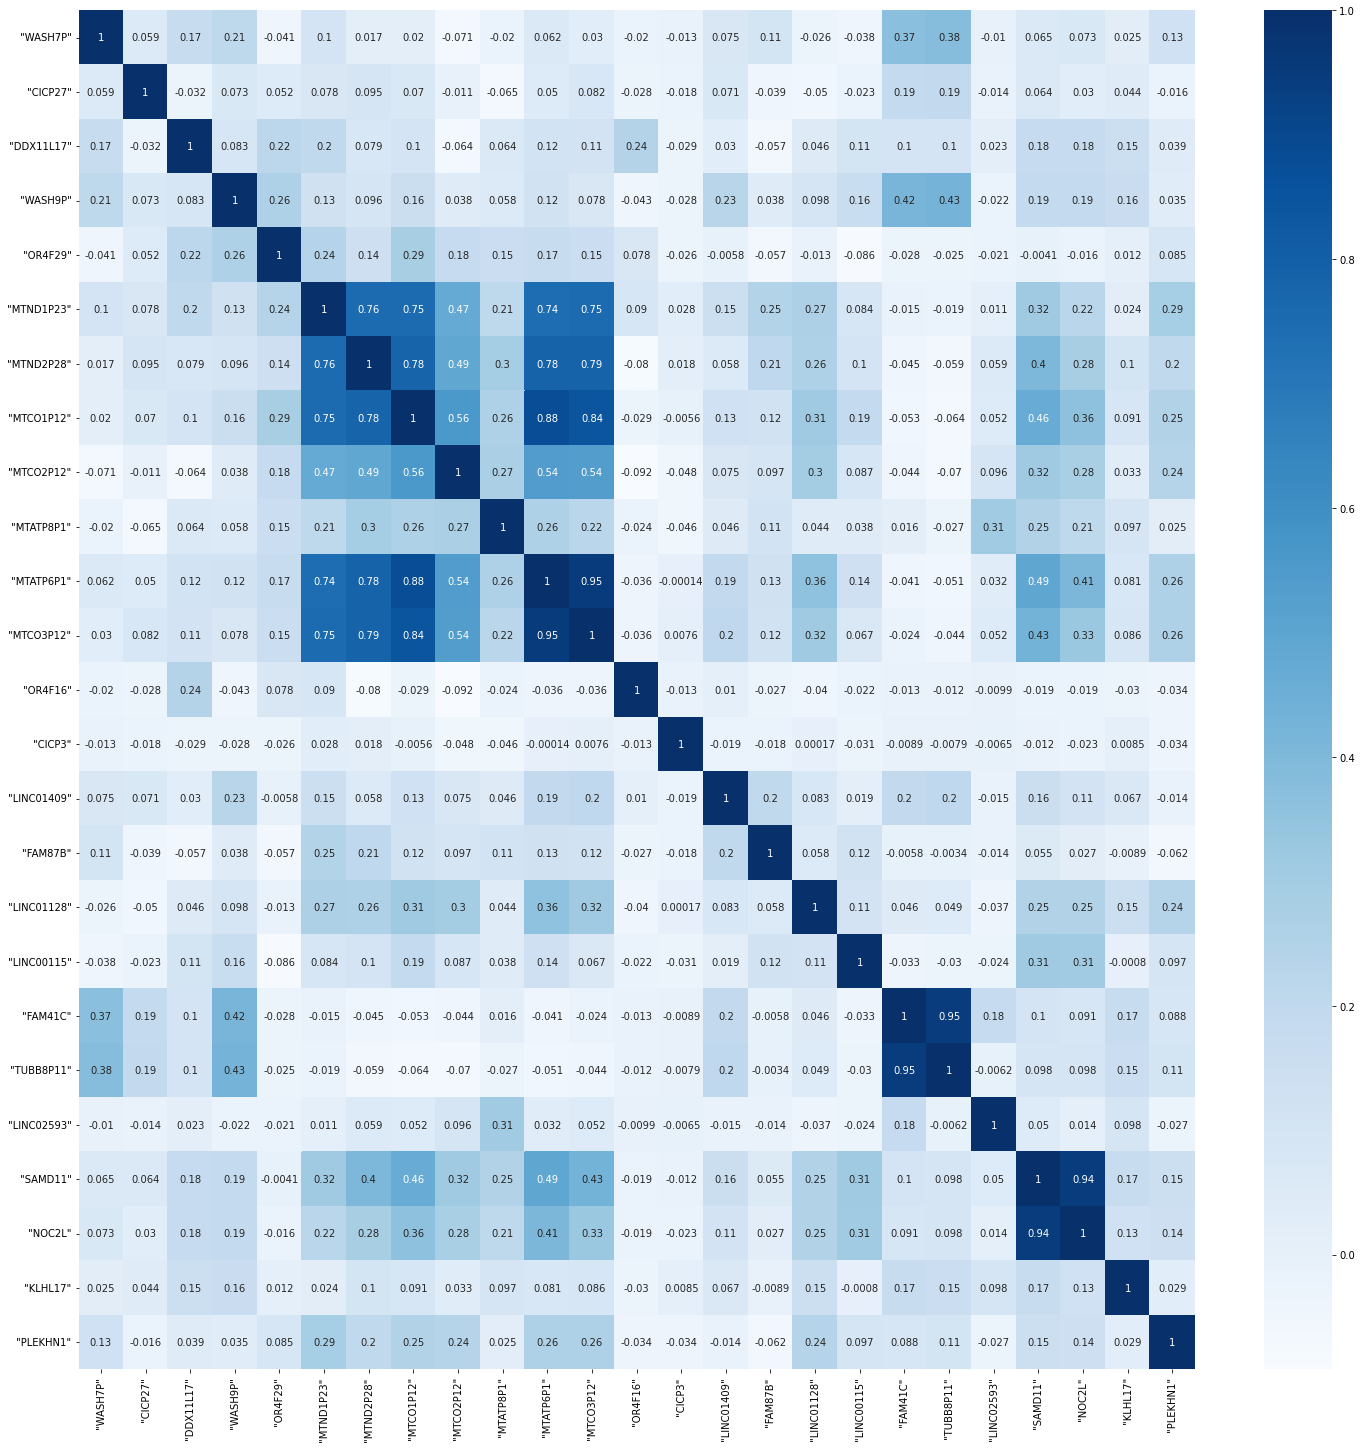

In [ ]:
# To see the correlation between genes
df_new = HCC1806_unf.transpose().iloc[:,:25]
plt.figure(figsize=(25,25))
sns.heatmap(df_new.corr(),cbar=True,annot=True,cmap='Blues')
plt.show()

##### Outliners


Let's now look for **outliners.** and let's try to eliminate them and look at the violin plots./
We first find the interquartile range of the data by eliminating the first and last quantile.

In [ ]:
# To find interquartile range
Q1 = HCC1806_unf.quantile(0.25)
Q3 = HCC1806_unf.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

"output.STAR.PCRPlate1A10_Normoxia_S123_Aligned.sortedByCoord.out.bam"     51.0
"output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.sortedByCoord.out.bam"     125.0
"output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sortedByCoord.out.bam"         5.0
"output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.sortedByCoord.out.bam"       40.0
"output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sortedByCoord.out.bam"         22.0
                                                                          ...  
"output.STAR.PCRPlate4H10_Normoxia_S210_Aligned.sortedByCoord.out.bam"     76.0
"output.STAR.PCRPlate4H11_Normoxia_S214_Aligned.sortedByCoord.out.bam"     24.0
"output.STAR.PCRPlate4H2_Hypoxia_S199_Aligned.sortedByCoord.out.bam"       68.0
"output.STAR.PCRPlate4H7_Normoxia_S205_Aligned.sortedByCoord.out.bam"      22.0
"output.STAR.PCRPlate4H9_Normoxia_S236_Aligned.sortedByCoord.out.bam"      44.0
Length: 243, dtype: float64


In [ ]:
# To find values in the interquartile range
df_noOut = HCC1806_unf[~((HCC1806_unf < (Q1 - 1.5 * IQR)) |(HCC1806_unf > (Q3 + 1.5 * IQR))).any(axis=1)]
df_noOut.shape
df_noOut.head(3)

"output.STAR.PCRPlate1A10_Normoxia_S123_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                                                    0                        
"CICP27"                                                    0                        
"DDX11L17"                                                  0                        

            "output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                                                    0                       
"CICP27"                                                    0                       
"DDX11L17"                                                  0                       

            "output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                                                    0                     
"CICP27"                                                    0                     
"DDX11L17"                                                  0                     

            "output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                                                    0                      
"CICP27"                                                    0                      
"DDX11L17"                                                  0                      

            "output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                                                    0                    
"CICP27"                                                    0                    
"DDX11L17"                                                  0                    

            "output.STAR.PCRPlate1A4_Hypoxia_S8_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                                                    0                    
"CICP27"                                                    0                    
"DDX11L17"                                                  1                    

            "output.STAR.PCRPlate1A5_Hypoxia_S108_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                                                    0                      
"CICP27"                                                    0                      
"DDX11L17"                                                  0                      

            "output.STAR.PCRPlate1A6_Hypoxia_S11_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                                                    0                     
"CICP27"                                                    0                     
"DDX11L17"                                                  0                     

            "output.STAR.PCRPlate1A7_Normoxia_S113_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                                                    0                       
"CICP27"                                                    0                       
"DDX11L17"                                                  0                       

            "output.STAR.PCRPlate1A8_Normoxia_S119_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                                                    0                       
"CICP27"                                                    0                       
"DDX11L17"                                                  0                       

            ...  \
"WASH7P"    ...   
"CICP27"    ...   
"DDX11L17"  ...   

            "output.STAR.PCRPlate4G12_Normoxia_S243_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                                                    0                        
"CICP27"                                                    0                        
"DDX11L17"                                                  0                        

            "output.STAR.PCRPlate4G1_Hypoxia_S193_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                                                    0                      
"CICP27"                                                

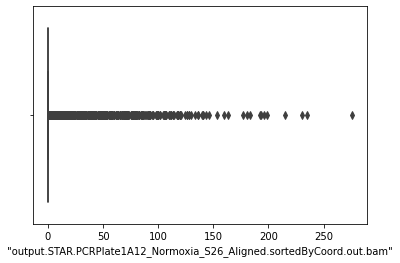

In [ ]:
cnames = df_noOut.columns
sns.boxplot(x=df_noOut[cnames[1]])
plt.show()

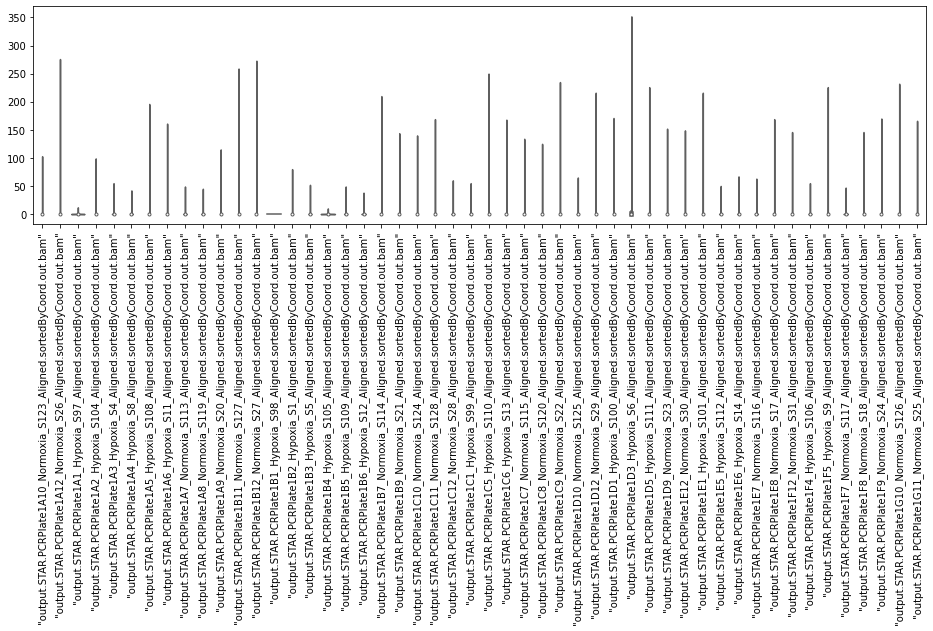

In [ ]:
df_noOut_small = df_noOut.iloc[:, :50]
plt.figure(figsize=(16,4))
plot=sns.violinplot(data=df_noOut_small,palette="Set3",cut=0)
plt.setp(plot.get_xticklabels(), rotation=90)
plt.show()

As seen from the data, most of the genes are expressed in the last quartile. Hence, in this case, the outliers carry most of the information and by removing them we would lose a great part of it. **That is due to the fact that the data is sparse,** and that makes it harder to just exclude outliers from the dataset.

##### Sparsity

We have tried to quantify the sparsity using an index given by the difference between 1 and the ratio of nonzero values and the size of the data set. This tells us that around 60% of the data is 0, hence highly sparse.

In [ ]:
# create a 2-D representation of the matrix
HCC1806_arr = np.array(HCC1806_unf)
print("Dense matrix representation: \n", HCC1806_arr)

Dense matrix representation: 
 [[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [26 62  0 ... 15  6 34]
 [66 71  1 ... 36  8 79]
 [ 0  4  0 ...  2  1  5]]


In [ ]:
# calculate sparsity
sparsity = 1.0 - count_nonzero(HCC1806_arr) / HCC1806_arr.size
print(sparsity)

0.558456230779135


From here we can deduce that around 56% of the data is equal to zero.

##### Checking the Normality

We then analysed the skewness and Kurtosis of a single cell of the data to check whether it is normalised, but because most of these values are not near 0, we can deduce that most of the cells have a distribution that differ much from the normal one.\


In [ ]:
#np.sum(MCF7_unf_sum.iloc[4] != 0)
HCC1806_noOut = HCC1806_unf

In [ ]:
cnames = HCC1806_unf.columns

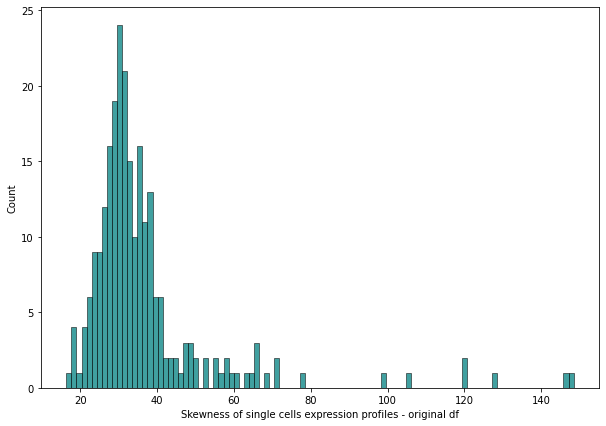

In [ ]:
# To calculate the skewness
from scipy.stats import kurtosis, skew
from sklearn.preprocessing import PowerTransformer, QuantileTransformer

colN = np.shape(HCC1806_unf)[1]
colN
df_skew_cells = []
for i in range(colN) :     
     v_df = HCC1806_unf[cnames[i]]
     df_skew_cells += [skew(v_df)]   
  #  df_skew_cells += [df[cnames[i]].skew()]
df_skew_cells

plt.figure(figsize=(10,7))
sns.histplot(df_skew_cells, bins=100, color="teal")
plt.xlabel('Skewness of single cells expression profiles - original df')
plt.show()

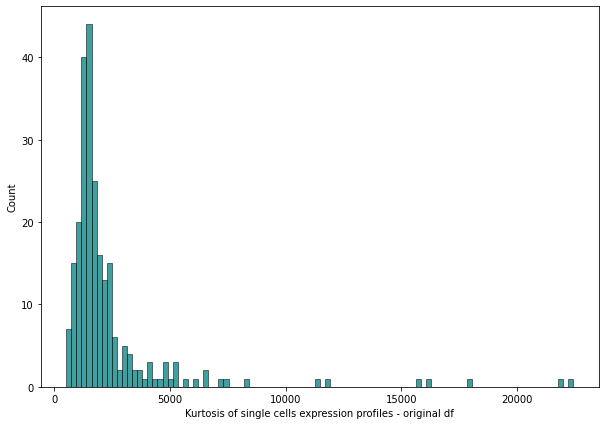

In [ ]:
# To calculate the kurtosis
df_kurt_cells = []
for i in range(colN) :     
     v_df = HCC1806_unf[cnames[i]]
     df_kurt_cells += [kurtosis(v_df)]   
 #   df_kurt_cells += [df[cnames[i]].kurt()]
df_kurt_cells

plt.figure(figsize=(10,7))
sns.histplot(df_kurt_cells, bins=100, color="teal")
plt.xlabel('Kurtosis of single cells expression profiles - original df')
plt.show()

<Figure size 720x504 with 0 Axes>

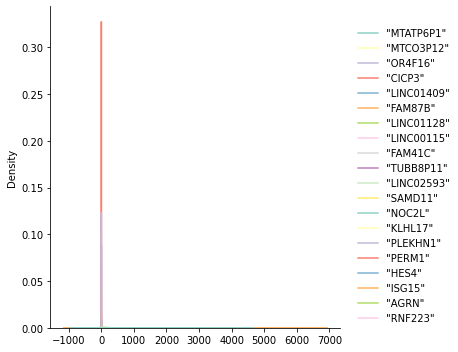

In [ ]:
# To check normality of the genes
df_small = HCC1806_unf.transpose().iloc[:, 10:30]  #just selecting part of the samples so run time not too long
plt.figure(figsize=(10,7))
sns.displot(data=df_small,palette="Set3",kind="kde", bw_adjust=2)
plt.show()

To show that the normality assumption is not satisfied we the qqplot() function.

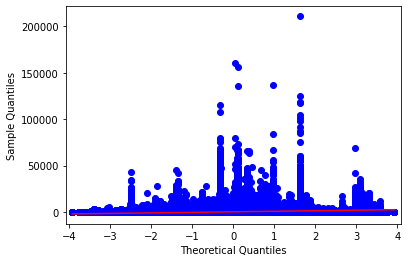

In [ ]:
# QQ Plot
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(100) + 50
# q-q plot
qqplot(HCC1806_unf, line='s')
plt.show()

We compare the QQplot in the filtered and normalized case:

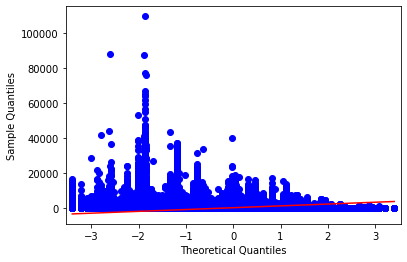

In [ ]:
# QQ Plot
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(100) + 50
# q-q plot
qqplot(HCC1806_f_n, line='s')
plt.show()

In reality, it's very unlikely to find data that are normally distributed. Also in this case, as we can see by plotting the QQ-plot, the data are not normally distributed, in fact, the data points in the plot are not close to the red line.

###### Log_2

We can now try to compute the log_2 of all the dataset, after adding 1 to it (do don't have problems with the zeros), and see if it can be a good normalization by looking again to the plot of the skenwness and the curtosis.

In [ ]:
HCC1806_unf_plus = HCC1806_unf + 1
HCC1806_unf_log2 = HCC1806_unf_plus.apply(np.log2)
HCC1806_unf_log2.describe()

"output.STAR.PCRPlate1A10_Normoxia_S123_Aligned.sortedByCoord.out.bam"  \
count                                       23396.000000                        
mean                                            2.665234                        
std                                             3.341225                        
min                                             0.000000                        
25%                                             0.000000                        
50%                                             0.000000                        
75%                                             5.700440                        
max                                            15.114637                        

       "output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.sortedByCoord.out.bam"  \
count                                       23396.000000                       
mean                                            3.224613                       
std                                             3.853466                       
min                                             0.000000                       
25%                                             0.000000                       
50%                                             0.000000                       
75%                                             6.977280                       
max                                            16.075751                       

       "output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sortedByCoord.out.bam"  \
count                                       23396.000000                     
mean                                            1.366411                     
std                                             1.938462                     
min                                             0.000000                     
25%                                             0.000000                     
50%                                             0.000000                     
75%                                             2.584963                     
max                                            12.632995                     

       "output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.sortedByCoord.out.bam"  \
count                                       23396.000000                      
mean                                            2.261582                      
std                                             3.620534                      
min                                             0.000000                      
25%                                             0.000000                      
50%                                             0.000000                      
75%                                             5.357552                      
max                                            16.099327                      

       "output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sortedByCoord.out.bam"  \
count                                       23396.000000                    
mean                                            2.109583                    
std                                             2.760889                    
min                                             0.000000                    
25%                                             0.000000                    
50%                                             0.000000                    
75%                                             4.523562                    
max                                            14.080734                    

       "output.STAR.PCRPlate1A4_Hypoxia_S8_Aligned.sortedByCoord.out.bam"  \
count                                       23396.000000                    
mean                                            1.827055                    
std                                             2.810320                    
min                                             0.000000                    
25%                                             0.000000      

Histogram of the mean

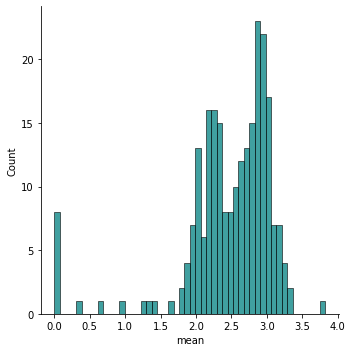

In [ ]:
# To plot an histogram with the means
sns.displot(data = HCC1806_unf_log2.describe().iloc[1], bins=50, color="teal")
plt.show()

Histogram of the third quantile

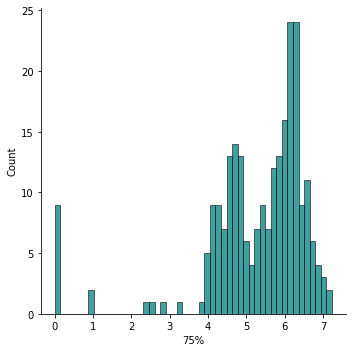

In [ ]:
# To plot an histogram with the third quantile
sns.displot(data = HCC1806_unf_log2.describe().iloc[6], bins=50, color="teal")
plt.show()

We can see that we still have some zeroes, but way less than before. We have also a much smaller range of values.

Let's now plot again the skeness and the curtosis of the cells, but of the dataset where we pwerformed the logarithms.

In [ ]:
cnames = HCC1806_unf_log2.columns

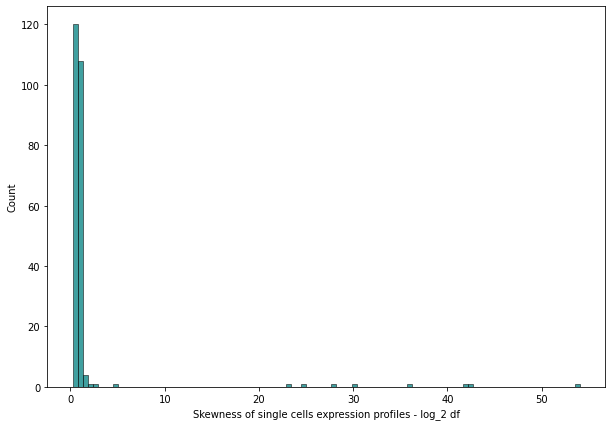

In [ ]:
# To calculate the skewness
from scipy.stats import kurtosis, skew

colN = np.shape(HCC1806_unf_log2)[1]
colN
df_skew_cells = []
for i in range(colN) :     
     v_df = HCC1806_unf_log2[cnames[i]]
     df_skew_cells += [skew(v_df)]   
  #  df_skew_cells += [df[cnames[i]].skew()]
df_skew_cells

plt.figure(figsize=(10,7))
sns.histplot(df_skew_cells, bins=100, color="teal")
plt.xlabel('Skewness of single cells expression profiles - log_2 df')
plt.show()

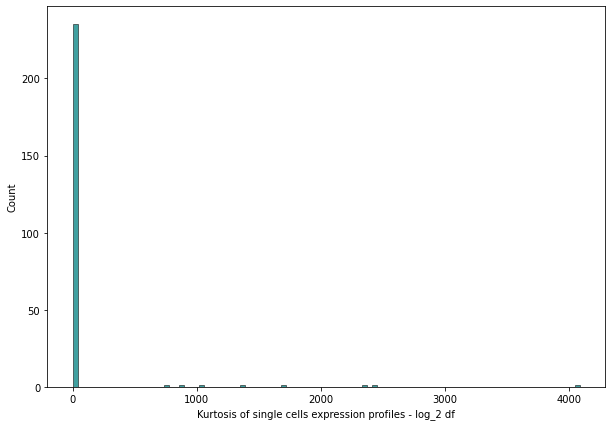

In [ ]:
# To calculate the kurtosis
df_kurt_cells = []
for i in range(colN) :     
     v_df = HCC1806_unf_log2[cnames[i]]
     df_kurt_cells += [kurtosis(v_df)]   
 #   df_kurt_cells += [df[cnames[i]].kurt()]
df_kurt_cells

plt.figure(figsize=(10,7))
sns.histplot(df_kurt_cells, bins=100, color="teal")
plt.xlabel('Kurtosis of single cells expression profiles - log_2 df')
plt.show()

We can definetely see that the data is much more normalized because most of the skewnwss and curtosis (not of all cells but most) is equal to 0. With respect to the MCF7 unfiltered dataset, the skewness of the new data is less near 0.

### Filtered data

#### MCF7

##### Understanding the data

We now proceed by analysing the filtered and normalized data, in particular we look at the correlation between genes, differences between hypoxic and normoxic cells, their clustering and their skewness.

In [ ]:
MCF7_f_n.head()

"output.STAR.2_B3_Norm_S57_Aligned.sortedByCoord.out.bam"  \
"CYP1B1"                                                    343           
"CYP1B1-AS1"                                                140           
"CYP1A1"                                                      0           
"NDRG1"                                                       0           
"DDIT4"                                                     386           

              "output.STAR.2_B4_Norm_S58_Aligned.sortedByCoord.out.bam"  \
"CYP1B1"                                                    131           
"CYP1B1-AS1"                                                 59           
"CYP1A1"                                                      0           
"NDRG1"                                                       1           
"DDIT4"                                                     289           

              "output.STAR.2_B5_Norm_S59_Aligned.sortedByCoord.out.bam"  \
"CYP1B1"                                                    452           
"CYP1B1-AS1"                                                203           
"CYP1A1"                                                      0           
"NDRG1"                                                       0           
"DDIT4"                                                       0           

              "output.STAR.2_B6_Norm_S60_Aligned.sortedByCoord.out.bam"  \
"CYP1B1"                                                     27           
"CYP1B1-AS1"                                                  7           
"CYP1A1"                                                      0           
"NDRG1"                                                       0           
"DDIT4"                                                     288           

              "output.STAR.2_B7_Hypo_S79_Aligned.sortedByCoord.out.bam"  \
"CYP1B1"                                                   5817           
"CYP1B1-AS1"                                               2669           
"CYP1A1"                                                      0           
"NDRG1"                                                     654           
"DDIT4"                                                    2484           

              "output.STAR.2_B9_Hypo_S81_Aligned.sortedByCoord.out.bam"  \
"CYP1B1"                                                   3841           
"CYP1B1-AS1"                                               1565           
"CYP1A1"                                                     79           
"NDRG1"                                                    1263           
"DDIT4"                                                    2596           

              "output.STAR.2_C10_Hypo_S130_Aligned.sortedByCoord.out.bam"  \
"CYP1B1"                                                   9263             
"CYP1B1-AS1"                                               3866             
"CYP1A1"                                                    238             
"NDRG1"                                                    2634             
"DDIT4"                                                    1323             

              "output.STAR.2_C11_Hypo_S131_Aligned.sortedByCoord.out.bam"  \
"CYP1B1"                                                  21543             
"CYP1B1-AS1"                                               9113             
"CYP1A1"                                                    443             
"NDRG1"                                                     540             
"DDIT4"                                                    2044             

              "output.STAR.2_C1_Norm_S103_Aligned.sortedByCoord.out.bam"  \
"CYP1B1"                                                   1013            
"CYP1B1-AS1"                                                459            
"CYP1A1"                                                      0            
"NDRG1"                                                       0            
"D

In [ ]:
MCF7_f_n_describe = MCF7_f_n.T.describe()
MCF7_f_n_describe

"CYP1B1"  "CYP1B1-AS1"      "CYP1A1"      "NDRG1"       "DDIT4"  \
count    250.000000    250.000000    250.000000   250.000000    250.000000   
mean    5454.536000   2258.572000   1604.580000   606.380000   2487.000000   
std     8282.337795   3453.650882   5657.397449   766.718881   3422.213185   
min        0.000000      0.000000      0.000000     0.000000      0.000000   
25%      200.750000     85.000000      0.000000     1.000000     96.000000   
50%      795.000000    321.500000      0.000000   222.500000   1198.500000   
75%     8180.500000   3348.500000    284.500000  1077.500000   3720.000000   
max    44406.000000  17673.000000  58717.000000  3884.000000  21994.000000   

           "PFKFB3"         "HK2"       "AREG"      "MYBL2"        "ADM"  ...  \
count    250.000000    250.000000   250.000000   250.000000   250.000000  ...   
mean    1495.920000    868.424000   308.984000   394.988000   183.096000  ...   
std     2109.376474   1837.399974   592.950034   564.259514   470.374582  ...   
min        0.000000      0.000000     0.000000     0.000000     0.000000  ...   
25%       71.000000      8.250000     0.000000     0.000000     0.000000  ...   
50%      369.500000    139.500000    18.000000   123.500000     0.000000  ...   
75%     2180.750000   1008.000000   371.000000   629.000000    74.500000  ...   
max    12078.000000  16625.000000  3496.000000  3108.000000  3586.000000  ...   

       "CD27-AS1"     "DNAI7"      "MAFG"     "LZTR1"      "BCO2"     "GRIK5"  \
count  250.000000  250.000000  250.000000  250.000000  250.000000  250.000000   
mean    22.036000    0.192000   50.884000   23.308000    0.192000    0.256000   
std     43.250493    2.000787   69.729761   36.415015    1.309195    2.001622   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000   13.250000    0.000000    0.000000    0.000000   
50%      8.000000    0.000000   37.000000    1.000000    0.000000    0.000000   
75%     30.000000    0.000000   63.000000   41.000000    0.000000    0.000000   
max    509.000000   28.000000  816.000000  196.000000   14.000000   26.000000   

       "SLC25A27"   "DENND5A"    "CDK5R1"  "FAM13A-AS1"  
count  250.000000  250.000000  250.000000    250.000000  
mean     0.160000   60.536000    2.860000      5.952000  
std      1.167842   75.647093    8.839056     21.649028  
min      0.000000    0.000000    0.000000      0.000000  
25%      0.000000   11.250000    0.000000      0.000000  
50%      0.000000   38.500000    0.000000      0.000000  
75%      0.000000   77.000000    0.000000      0.000000  
max     11.000000  639.000000   62.000000    288.000000  

[8 rows x 3000 columns]

We look at the statistical data about the transposed data to compare differences in expression among genes. There are still many cells where mean is equal to 0 and many cells where the 75% quantile is equal to 0.

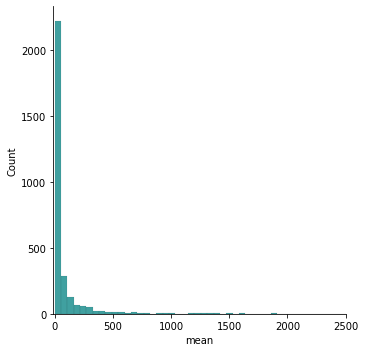

In [ ]:
sns.displot(data = MCF7_f_n_describe.iloc[1], bins=500, color="teal")
plt.xlim(-10, 2500)
plt.show()

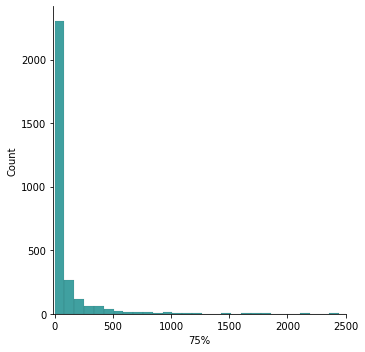

In [ ]:
sns.displot(data = MCF7_f_n_describe.iloc[6], bins=500, color="teal")
plt.xlim(-10, 2500)
plt.show()

##### Correlation

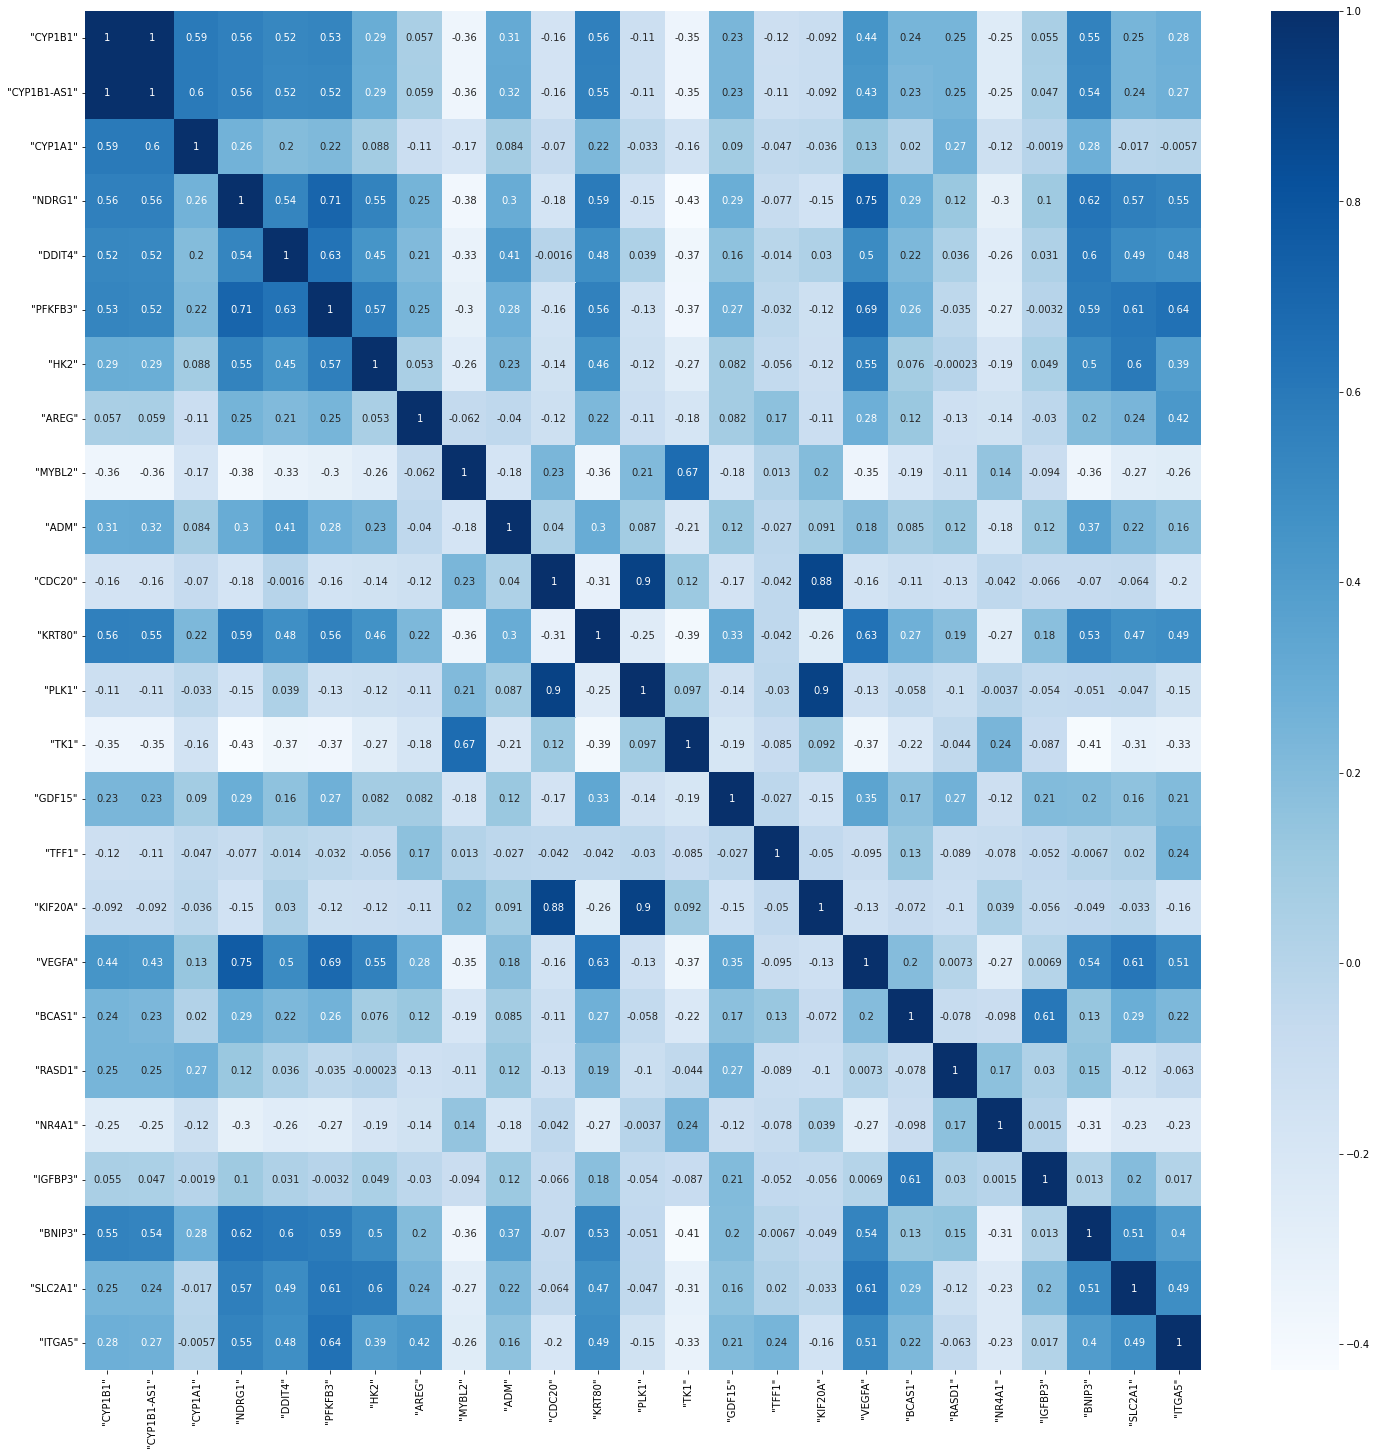

In [ ]:
# To see the correlation between genes
df_new = MCF7_f_n.transpose().iloc[:,:25]
plt.figure(figsize=(25,25))
sns.heatmap(df_new.corr(),cbar=True,annot=True,cmap='Blues')
plt.show()

##### Hypo vs Norm

It can be quite interesting to see if there are major differences between the gene expressions in cells under hypoxic or normoxic conditions.

In [ ]:
# Hypoxic cells using filtered and normalized dataset
MCF7_Hypo_f_n = MCF7_f_n.loc[:, MCF7_f_n.columns.str.contains('Hypo')]
MCF7_Hypo_f_n


"output.STAR.2_B7_Hypo_S79_Aligned.sortedByCoord.out.bam"  \
"CYP1B1"                                                   5817           
"CYP1B1-AS1"                                               2669           
"CYP1A1"                                                      0           
"NDRG1"                                                     654           
"DDIT4"                                                    2484           
...                                                         ...           
"GRIK5"                                                       0           
"SLC25A27"                                                    0           
"DENND5A"                                                    60           
"CDK5R1"                                                      0           
"FAM13A-AS1"                                                  0           

              "output.STAR.2_B9_Hypo_S81_Aligned.sortedByCoord.out.bam"  \
"CYP1B1"                                                   3841           
"CYP1B1-AS1"                                               1565           
"CYP1A1"                                                     79           
"NDRG1"                                                    1263           
"DDIT4"                                                    2596           
...                                                         ...           
"GRIK5"                                                       0           
"SLC25A27"                                                    0           
"DENND5A"                                                   107           
"CDK5R1"                                                      0           
"FAM13A-AS1"                                                  0           

              "output.STAR.2_C10_Hypo_S130_Aligned.sortedByCoord.out.bam"  \
"CYP1B1"                                                   9263             
"CYP1B1-AS1"                                               3866             
"CYP1A1"                                                    238             
"NDRG1"                                                    2634             
"DDIT4"                                                    1323             
...                                                         ...             
"GRIK5"                                                       0             
"SLC25A27"                                                    0             
"DENND5A"                                                    74             
"CDK5R1"                                                      0             
"FAM13A-AS1"                                                  0             

              "output.STAR.2_C11_Hypo_S131_Aligned.sortedByCoord.out.bam"  \
"CYP1B1"                                                  21543             
"CYP1B1-AS1"                                               9113             
"CYP1A1"                                                    443             
"NDRG1"                                                     540             
"DDIT4"                                                    2044             
...                                                         ...             
"GRIK5"                                                       0             
"SLC25A27"                                                    0             
"DENND5A"                                                   127             
"CDK5R1"                                                      0             
"FAM13A-AS1"                                                 13             

              "output.STAR.2_C8_Hypo_S128_Aligned.sortedByCoord.out.bam"  \
"CYP1B1"                                                   1338            
"CYP1B1-AS1"                                                554            
"CYP1A1"                                                     14            
"NDRG1"                                                   

In [ ]:
# To transpose the hypoxic dataset
MCF7_Hypo_f_n_trans = MCF7_Hypo_f_n.transpose()
MCF7_Hypo_f_n_trans

"CYP1B1"  "CYP1B1-AS1"  \
"output.STAR.2_B7_Hypo_S79_Aligned.sortedByCoor...      5817          2669   
"output.STAR.2_B9_Hypo_S81_Aligned.sortedByCoor...      3841          1565   
"output.STAR.2_C10_Hypo_S130_Aligned.sortedByCo...      9263          3866   
"output.STAR.2_C11_Hypo_S131_Aligned.sortedByCo...     21543          9113   
"output.STAR.2_C8_Hypo_S128_Aligned.sortedByCoo...      1338           554   
...                                                      ...           ...   
"output.STAR.4_H10_Hypo_S382_Aligned.sortedByCo...      7890          3647   
"output.STAR.4_H14_Hypo_S383_Aligned.sortedByCo...      4512          2035   
"output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoo...     34565         13717   
"output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoo...     20024          7835   
"output.STAR.4_H9_Hypo_S381_Aligned.sortedByCoo...      5953          2367   

                                                    "CYP1A1"  "NDRG1"  \
"output.STAR.2_B7_Hypo_S79_Aligned.sortedByCoor...         0      654   
"output.STAR.2_B9_Hypo_S81_Aligned.sortedByCoor...        79     1263   
"output.STAR.2_C10_Hypo_S130_Aligned.sortedByCo...       238     2634   
"output.STAR.2_C11_Hypo_S131_Aligned.sortedByCo...       443      540   
"output.STAR.2_C8_Hypo_S128_Aligned.sortedByCoo...        14      634   
...                                                      ...      ...   
"output.STAR.4_H10_Hypo_S382_Aligned.sortedByCo...        86      481   
"output.STAR.4_H14_Hypo_S383_Aligned.sortedByCo...      1654     1052   
"output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoo...     11274     1263   
"output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoo...       563      925   
"output.STAR.4_H9_Hypo_S381_Aligned.sortedByCoo...       522     1572   

                                                    "DDIT4"  "PFKFB3"  "HK2"  \
"output.STAR.2_B7_Hypo_S79_Aligned.sortedByCoor...     2484      1603    748   
"output.STAR.2_B9_Hypo_S81_Aligned.sortedByCoor...     2596      2795   3970   
"output.STAR.2_C10_Hypo_S130_Aligned.sortedByCo...     1323      2624   1265   
"output.STAR.2_C11_Hypo_S131_Aligned.sortedByCo...     2044      3449   2034   
"output.STAR.2_C8_Hypo_S128_Aligned.sortedByCoo...     3513      1360    303   
...                                                     ...       ...    ...   
"output.STAR.4_H10_Hypo_S382_Aligned.sortedByCo...     3692      4702   1011   
"output.STAR.4_H14_Hypo_S383_Aligned.sortedByCo...     2410      2561    999   
"output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoo...     4256      5663    701   
"output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoo...    12733      2187   1141   
"output.STAR.4_H9_Hypo_S381_Aligned.sortedByCoo...     2275      3269   2247   

                                                    "AREG"  "MYBL2"  "ADM"  \
"output.STAR.2_B7_Hypo_S79_Aligned.sortedByCoor...     436        0      0   
"output.STAR.2_B9_Hypo_S81_Aligned.sortedByCoor...     373      554     31   
"output.STAR.2_C10_Hypo_S130_Aligned.sortedByCo...     646        0      0   
"output.STAR.2_C11_Hypo_S131_Aligned.sortedByCo...       0        0   2170   
"output.STAR.2_C8_Hypo_S128_Aligned.sortedByCoo...     558      178    994   
...                                                    ...      ...    ...   
"output.STAR.4_H10_Hypo_S382_Aligned.sortedByCo...    2707      144    385   
"output.STAR.4_H14_Hypo_S383_Aligned.sortedByCo...     717      175    612   
"output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoo...       0        0      0   
"output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoo...       0       20     81   
"output.STAR.4_H9_Hypo_S381_Aligned.sortedByCoo...     169        2      0   

                                                    ...  "CD27-AS1"  "DNAI7"  \
"output.STAR.2_B7_Hypo_S79_Aligned.sortedByCoor...  ...           0        0   
"output.STAR.2_B9_Hypo_S81_Aligned.sortedByCoor...  ...           0        0   
"output.STAR.2_C10_Hypo_S130_Aligned.sortedByCo...  ...           0        0   
"output.STAR.2_C11_H

In [ ]:
# To check the characteristics of the genes in the hypoxic cells
MCF7_Hypo_f_n_trans_d = MCF7_Hypo_f_n_trans.describe()
MCF7_Hypo_f_n_trans_d

"CYP1B1"  "CYP1B1-AS1"      "CYP1A1"      "NDRG1"       "DDIT4"  \
count    124.000000    124.000000    124.000000   124.000000    124.000000   
mean   10696.193548   4430.491935   3233.911290  1203.637097   4663.588710   
std     9155.215917   3833.386820   7712.505628   688.882910   3720.342842   
min        7.000000      1.000000      0.000000   149.000000     46.000000   
25%     3798.000000   1590.500000      0.000000   665.250000   2452.500000   
50%     8394.500000   3357.500000    307.000000  1092.500000   3747.000000   
75%    15049.000000   6254.500000   2554.500000  1573.000000   5397.000000   
max    44406.000000  17673.000000  58717.000000  3884.000000  21994.000000   

           "PFKFB3"         "HK2"       "AREG"      "MYBL2"        "ADM"  ...  \
count    124.000000    124.000000   124.000000   124.000000   124.000000  ...   
mean    2855.653226   1721.572581   508.903226   137.572581   367.370968  ...   
std     2285.651842   2318.531078   755.171271   408.994050   616.390324  ...   
min       47.000000     40.000000     0.000000     0.000000     0.000000  ...   
25%     1262.750000    553.750000     0.000000     0.000000     8.250000  ...   
50%     2208.000000   1019.500000    86.000000     0.500000    78.000000  ...   
75%     4285.250000   1998.000000   854.000000    95.000000   411.500000  ...   
max    12078.000000  16625.000000  3496.000000  2647.000000  3586.000000  ...   

       "CD27-AS1"     "DNAI7"      "MAFG"     "LZTR1"      "BCO2"     "GRIK5"  \
count  124.000000  124.000000  124.000000  124.000000  124.000000  124.000000   
mean    17.491935    0.274194   74.709677   17.677419    0.306452    0.483871   
std     53.238457    2.551386   89.603442   35.021143    1.753869    2.806739   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000   29.750000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000   54.500000    0.000000    0.000000    0.000000   
75%     19.250000    0.000000   94.000000   24.500000    0.000000    0.000000   
max    509.000000   28.000000  816.000000  189.000000   14.000000   26.000000   

       "SLC25A27"   "DENND5A"    "CDK5R1"  "FAM13A-AS1"  
count  124.000000  124.000000  124.000000    124.000000  
mean     0.250000   91.443548    1.491935     11.604839  
std      1.446189   93.872453    7.831037     29.652957  
min      0.000000    0.000000    0.000000      0.000000  
25%      0.000000   30.000000    0.000000      0.000000  
50%      0.000000   69.500000    0.000000      0.000000  
75%      0.000000  119.500000    0.000000     16.000000  
max     11.000000  639.000000   62.000000    288.000000  

[8 rows x 3000 columns]

We considered only the hypoxic cells and transposed the dataset to analyse the expression of the genes, in particular we immediately saw that some genes are expressed in mean with a value close to 0 and others are over 10,000, hence some genes seem more relevant to hypoxic cells. 

We did the same procedure with the normoxic cells and saw that also in this case some genes are much more expressed than others.

In [ ]:
# Normoxic cells using filtered and transposed data
MCF7_Norm_f_n = MCF7_f_n.loc[:, MCF7_f_n.columns.str.contains('Norm')]
MCF7_Norm_f_n

"output.STAR.2_B3_Norm_S57_Aligned.sortedByCoord.out.bam"  \
"CYP1B1"                                                    343           
"CYP1B1-AS1"                                                140           
"CYP1A1"                                                      0           
"NDRG1"                                                       0           
"DDIT4"                                                     386           
...                                                         ...           
"GRIK5"                                                       0           
"SLC25A27"                                                    0           
"DENND5A"                                                    51           
"CDK5R1"                                                      0           
"FAM13A-AS1"                                                  0           

              "output.STAR.2_B4_Norm_S58_Aligned.sortedByCoord.out.bam"  \
"CYP1B1"                                                    131           
"CYP1B1-AS1"                                                 59           
"CYP1A1"                                                      0           
"NDRG1"                                                       1           
"DDIT4"                                                     289           
...                                                         ...           
"GRIK5"                                                       0           
"SLC25A27"                                                    0           
"DENND5A"                                                    34           
"CDK5R1"                                                      0           
"FAM13A-AS1"                                                  0           

              "output.STAR.2_B5_Norm_S59_Aligned.sortedByCoord.out.bam"  \
"CYP1B1"                                                    452           
"CYP1B1-AS1"                                                203           
"CYP1A1"                                                      0           
"NDRG1"                                                       0           
"DDIT4"                                                       0           
...                                                         ...           
"GRIK5"                                                       0           
"SLC25A27"                                                    0           
"DENND5A"                                                     0           
"CDK5R1"                                                      0           
"FAM13A-AS1"                                                  0           

              "output.STAR.2_B6_Norm_S60_Aligned.sortedByCoord.out.bam"  \
"CYP1B1"                                                     27           
"CYP1B1-AS1"                                                  7           
"CYP1A1"                                                      0           
"NDRG1"                                                       0           
"DDIT4"                                                     288           
...                                                         ...           
"GRIK5"                                                       0           
"SLC25A27"                                                    0           
"DENND5A"                                                     4           
"CDK5R1"                                                      0           
"FAM13A-AS1"                                                  0           

              "output.STAR.2_C1_Norm_S103_Aligned.sortedByCoord.out.bam"  \
"CYP1B1"                                                   1013            
"CYP1B1-AS1"                                                459            
"CYP1A1"                                                      0            
"NDRG1"                                                       0            
"DDIT4"                       

In [ ]:
# To transpose the normoxic dataset
MCF7_Norm_f_n_trans = MCF7_Norm_f_n.transpose()
MCF7_Norm_f_n_trans

"CYP1B1"  "CYP1B1-AS1"  \
"output.STAR.2_B3_Norm_S57_Aligned.sortedByCoor...       343           140   
"output.STAR.2_B4_Norm_S58_Aligned.sortedByCoor...       131            59   
"output.STAR.2_B5_Norm_S59_Aligned.sortedByCoor...       452           203   
"output.STAR.2_B6_Norm_S60_Aligned.sortedByCoor...        27             7   
"output.STAR.2_C1_Norm_S103_Aligned.sortedByCoo...      1013           459   
...                                                      ...           ...   
"output.STAR.4_H1_Norm_S355_Aligned.sortedByCoo...       160            75   
"output.STAR.4_H3_Norm_S357_Aligned.sortedByCoo...       351           138   
"output.STAR.4_H4_Norm_S358_Aligned.sortedByCoo...       327           130   
"output.STAR.4_H5_Norm_S359_Aligned.sortedByCoo...       196           102   
"output.STAR.4_H6_Norm_S360_Aligned.sortedByCoo...       504           238   

                                                    "CYP1A1"  "NDRG1"  \
"output.STAR.2_B3_Norm_S57_Aligned.sortedByCoor...         0        0   
"output.STAR.2_B4_Norm_S58_Aligned.sortedByCoor...         0        1   
"output.STAR.2_B5_Norm_S59_Aligned.sortedByCoor...         0        0   
"output.STAR.2_B6_Norm_S60_Aligned.sortedByCoor...         0        0   
"output.STAR.2_C1_Norm_S103_Aligned.sortedByCoo...         0        0   
...                                                      ...      ...   
"output.STAR.4_H1_Norm_S355_Aligned.sortedByCoo...         0        0   
"output.STAR.4_H3_Norm_S357_Aligned.sortedByCoo...         0        0   
"output.STAR.4_H4_Norm_S358_Aligned.sortedByCoo...         0       54   
"output.STAR.4_H5_Norm_S359_Aligned.sortedByCoo...         1      243   
"output.STAR.4_H6_Norm_S360_Aligned.sortedByCoo...         0       62   

                                                    "DDIT4"  "PFKFB3"  "HK2"  \
"output.STAR.2_B3_Norm_S57_Aligned.sortedByCoor...      386        75      0   
"output.STAR.2_B4_Norm_S58_Aligned.sortedByCoor...      289        42      0   
"output.STAR.2_B5_Norm_S59_Aligned.sortedByCoor...        0         0      0   
"output.STAR.2_B6_Norm_S60_Aligned.sortedByCoor...      288       214     15   
"output.STAR.2_C1_Norm_S103_Aligned.sortedByCoo...       36        75     15   
...                                                     ...       ...    ...   
"output.STAR.4_H1_Norm_S355_Aligned.sortedByCoo...      800      1041     39   
"output.STAR.4_H3_Norm_S357_Aligned.sortedByCoo...        1        57     26   
"output.STAR.4_H4_Norm_S358_Aligned.sortedByCoo...      189       235    232   
"output.STAR.4_H5_Norm_S359_Aligned.sortedByCoo...      266       278     78   
"output.STAR.4_H6_Norm_S360_Aligned.sortedByCoo...      417       932    275   

                                                    "AREG"  "MYBL2"  "ADM"  \
"output.STAR.2_B3_Norm_S57_Aligned.sortedByCoor...       0      476      0   
"output.STAR.2_B4_Norm_S58_Aligned.sortedByCoor...     856     1586      0   
"output.STAR.2_B5_Norm_S59_Aligned.sortedByCoor...       0      775      0   
"output.STAR.2_B6_Norm_S60_Aligned.sortedByCoor...     242     1191      0   
"output.STAR.2_C1_Norm_S103_Aligned.sortedByCoo...       6     1120      0   
...                                                    ...      ...    ...   
"output.STAR.4_H1_Norm_S355_Aligned.sortedByCoo...       0        0      0   
"output.STAR.4_H3_Norm_S357_Aligned.sortedByCoo...       0      331      0   
"output.STAR.4_H4_Norm_S358_Aligned.sortedByCoo...       1        1      0   
"output.STAR.4_H5_Norm_S359_Aligned.sortedByCoo...       1      199      0   
"output.STAR.4_H6_Norm_S360_Aligned.sortedByCoo...       0       33      0   

                                                    ...  "CD27-AS1"  "DNAI7"  \
"output.STAR.2_B3_Norm_S57_Aligned.sortedByCoor...  ...          63        0   
"output.STAR.2_B4_Norm_S58_Aligned.sortedByCoor...  ...           0        0   
"output.STAR.2_B5_Norm_S59_Aligned.sortedByCoor...  ...          15        0   
"output.STAR.2_B6_No

In [ ]:
# To check the characteristics of the genes in normoxic cells
MCF7_Norm_f_n_trans_d = MCF7_Norm_f_n_trans.describe()
MCF7_Norm_f_n_trans_d

"CYP1B1"  "CYP1B1-AS1"    "CYP1A1"     "NDRG1"      "DDIT4"  \
count   126.000000    126.000000  126.000000  126.000000   126.000000   
mean    296.079365    121.126984    1.111111   18.603175   344.960317   
std     301.404382    124.625325    7.706851   44.026734   620.660453   
min       0.000000      0.000000    0.000000    0.000000     0.000000   
25%      36.500000     14.000000    0.000000    0.000000    22.000000   
50%     228.000000     99.000000    0.000000    1.000000    97.000000   
75%     422.250000    175.000000    0.000000   16.250000   317.250000   
max    1522.000000    596.000000   78.000000  296.000000  3506.000000   

          "PFKFB3"       "HK2"       "AREG"      "MYBL2"       "ADM"  ...  \
count   126.000000  126.000000   126.000000   126.000000  126.000000  ...   
mean    157.769841   28.817460   112.238095   648.317460    1.746032  ...   
std     289.259279   53.607671   246.050968   582.416478    6.318147  ...   
min       0.000000    0.000000     0.000000     0.000000    0.000000  ...   
25%      24.250000    0.000000     0.000000   144.000000    0.000000  ...   
50%      71.000000    8.500000     2.000000   555.000000    0.000000  ...   
75%     156.500000   34.500000    73.750000   966.750000    0.000000  ...   
max    2111.000000  284.000000  1673.000000  3108.000000   41.000000  ...   

       "CD27-AS1"     "DNAI7"      "MAFG"     "LZTR1"      "BCO2"     "GRIK5"  \
count  126.000000  126.000000  126.000000  126.000000  126.000000  126.000000   
mean    26.507937    0.111111   27.436508   28.849206    0.079365    0.031746   
std     29.943613    1.247219   25.844921   37.043772    0.601374    0.356348   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000    0.000000    4.250000    0.000000    0.000000    0.000000   
50%     18.500000    0.000000   22.500000   15.000000    0.000000    0.000000   
75%     39.000000    0.000000   41.750000   45.250000    0.000000    0.000000   
max    165.000000   14.000000  125.000000  196.000000    6.000000    4.000000   

       "SLC25A27"   "DENND5A"    "CDK5R1"  "FAM13A-AS1"  
count  126.000000  126.000000  126.000000    126.000000  
mean     0.071429   30.119048    4.206349      0.388889  
std      0.801784   29.118958    9.571054      2.342553  
min      0.000000    0.000000    0.000000      0.000000  
25%      0.000000    1.000000    0.000000      0.000000  
50%      0.000000   23.500000    0.000000      0.000000  
75%      0.000000   51.000000    0.000000      0.000000  
max      9.000000  115.000000   55.000000     18.000000  

[8 rows x 3000 columns]

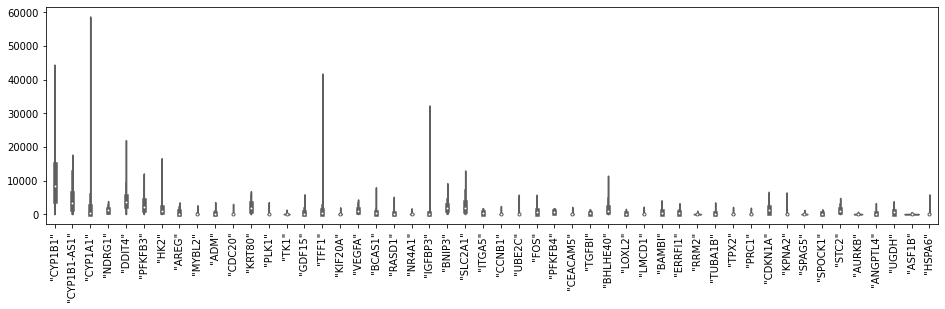

In [ ]:
df_small = MCF7_Hypo_f_n.transpose().iloc[:, :50]
plt.figure(figsize=(16,4))
plot=sns.violinplot(data=df_small,palette="Set3",cut=0)
plt.setp(plot.get_xticklabels(), rotation=90)
plt.show()

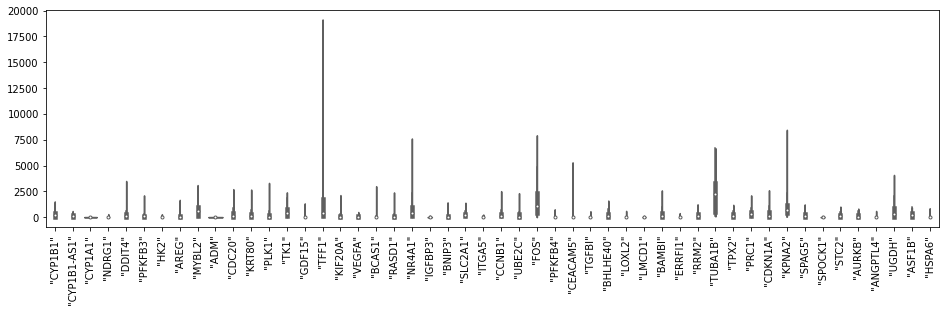

In [ ]:
df_small = MCF7_Norm_f_n.transpose().iloc[:, :50]
plt.figure(figsize=(16,4))
plot=sns.violinplot(data=df_small,palette="Set3",cut=0)
plt.setp(plot.get_xticklabels(), rotation=90)
plt.show()

From the filtered and normalized violin plots it emerges that some genes are much more expressed in hypoxic cells than in normoxic cells (and viceversa).
It is difficult to see from just the first 50 genes in the violin plots, later we will analyze the difference between some specific genes.\
We can see, for example, that the mean and the 25% and 75% quantile for the *CYP1B1* gene are very different between the hypoxic and normoxic cells.

Let's now look for the genes that appear, either in diff or ratio of the means, to be more important in the differentiation between hypoxic and normoxic cells.

In [ ]:
# To calculate the difference in mean for each gene in hypoxic and normoxic cells
MCF7_f_n_meandiff = MCF7_Hypo_f_n_trans_d.iloc[1] - MCF7_Norm_f_n_trans_d.iloc[1]
MCF7_f_n_meandiff

"CYP1B1"        10400.114183
"CYP1B1-AS1"     4309.364951
"CYP1A1"         3232.800179
"NDRG1"          1185.033922
"DDIT4"          4318.628392
                    ...     
"GRIK5"             0.452125
"SLC25A27"          0.178571
"DENND5A"          61.324501
"CDK5R1"           -2.714414
"FAM13A-AS1"       11.215950
Name: mean, Length: 3000, dtype: float64

In [ ]:
# To sort the mean differences found
MCF7_f_n_meandiff_sorted = MCF7_f_n_meandiff.sort_values(ascending=False)
MCF7_f_n_meandiff_sorted

"GAPDH"     37668.952893
"ACTG1"     21697.537378
"ALDOA"     20955.116999
"CYP1B1"    10400.114183
"FTH1"       7711.505888
                ...     
"SULF2"     -1934.329109
"MT-CO3"    -2375.729903
"MT-CO2"    -3872.005376
"MT-CYB"    -4408.886585
"MT-CO1"    -6474.568868
Name: mean, Length: 3000, dtype: float64

We want to compare the gene expression across cells, so we find the difference between the gene expression in mean for hypoxic and normoxic cells and sort them. The first values show us the genes that are much more expressed in hypoxic cells than in normoxic cells, whereas the last values shows us the ones much more  expressed in normoxic cells.

Using the ratio of means

In [ ]:
# To calculate the ratio between the means of each gene in hypoxic and normoxic cells
MCF7_f_n_meanratio = (MCF7_Hypo_f_n_trans_d.iloc[1])/(MCF7_Norm_f_n_trans_d.iloc[1])
MCF7_f_n_meanratio

"CYP1B1"          36.126103
"CYP1B1-AS1"      36.577250
"CYP1A1"        2910.520161
"NDRG1"           64.700629
"DDIT4"           13.519203
                   ...     
"GRIK5"           15.241935
"SLC25A27"         3.500000
"DENND5A"          3.036070
"CDK5R1"           0.354687
"FAM13A-AS1"      29.841014
Name: mean, Length: 3000, dtype: float64

In [ ]:
# To sort the ratios between the means found
MCF7_f_n_meanratio_sorted = MCF7_f_n_meanratio.sort_values(ascending=False)
MCF7_f_n_meanratio_sorted

"S1PR4"      inf
"IFIT2"      inf
"TRBV30"     inf
"ADGRF2"     inf
"CNTN3"      inf
            ... 
"RARRES2"    0.0
"ZDHHC22"    0.0
"NTRK3"      0.0
"ADGRG5"     0.0
"DMBX1"      0.0
Name: mean, Length: 3000, dtype: float64

To get a more accurate comparison we repeat the same procedure by calculating the ratio between the mean gene expression in hypoxic and normoxic cells. Since some genes have mean expression 0, as a result we obtain both infinite and 0 values. Since in this case the comparison between the ratios is significant only with non-zero terms, we exclude such genes and compare the remaining ones.

In [ ]:
# To remove the infinite values in the list
MCF7_f_n_meanratio_sorted.replace([np.inf, -np.inf], np.nan, inplace=True)
MCF7_f_n_meanratio_sorted.replace(0, np.nan, inplace=True)
MCF7_f_n_meanratio_sorted.dropna(inplace=True)
MCF7_f_n_meanratio_sorted

"CYP1A1"        2910.520161
"NPC1L1"        1014.096774
"DAPP1"          922.645161
"ENOX1"          564.967742
"MANCR"          332.274194
                   ...     
"CD22"             0.004361
"TRPC6"            0.004252
"INSYN1-AS1"       0.002957
"ACE"              0.002283
"KCNK5"            0.000911
Name: mean, Length: 2886, dtype: float64

Because this is extremely aprooximate and because many ratios where either 0 or infinite, we compute the ratio betwen the log_2 of the mean + 1 and we return the values sorted.

In [ ]:
MCF7_f_n_logratio = np.log2(MCF7_Hypo_f_n_trans_d.iloc[1] + 1) - np.log2(MCF7_Norm_f_n_trans_d.iloc[1] + 1)
MCF7_f_n_logratio.sort_values(ascending=False)

"CYP1A1"    10.581508
"ADM"        7.067667
"IGFBP3"     6.701573
"KRT17"      6.650212
"NDRG1"      5.941367
              ...    
"ELOVL2"    -4.336349
"IL27RA"    -4.484711
"SFXN2"     -4.502608
"MGP"       -4.628474
"RAMP1"     -4.919597
Name: mean, Length: 3000, dtype: float64

###### Check with random forest which cells have higher importance

We now try to get the most important genes with a random forest to check wheter they are the same as the ones we found before.

In [ ]:
data_test = MCF7_f_n

In [ ]:
# Let's load the packages
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
#import shap
from matplotlib import pyplot as plt

plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

In [ ]:
index = data_test.T.index
y = np.zeros((len(index)),dtype = 'int64')
for i in range(len(index)):
    y[i] = not 'Hypo' in index[i] # 0 Hypo 1 Norm

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_test.T, y, test_size= 0.1, random_state= 42)

In [ ]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
genes_importance = rf.feature_importances_

In [ ]:
genes = {}
for n, g in zip(data_test.index, genes_importance):
  genes[n] = g
print({k: v for k, v in sorted(genes.items(), key=lambda item: item[1], reverse=True)}) 

{'"NDRG1"': 0.6223078526879188, '"GAPDH"': 0.15508077494604888, '"MT-CO3"': 0.13425458853916902, '"MT-CYB"': 0.03893954522647767, '"BNIP3"': 0.019128316830396595, '"P4HA1"': 0.0017245829719825985, '"A4GALT"': 0.0010388211319290715, '"MUC5AC"': 0.0008801233011419186, '"HK2"': 0.0008727969961314983, '"FASN"': 0.0008695306377398602, '"PDK1"': 0.000863594487476328, '"MUC16"': 0.0007010437762891417, '"ERO1A"': 0.0006947660954145455, '"EBP"': 0.0006892507000509241, '"MVD"': 0.0006866036008544401, '"GRB10"': 0.0005285412262156453, '"HLA-C"': 0.0005269574991775217, '"PFKP"': 0.0005262114314840362, '"TXNRD1"': 0.0005226480836236949, '"SLC9A3R1"': 0.0005219610269099912, '"CD9"': 0.0005213562987564688, '"SLC25A39"': 0.0005208333333333347, '"KRT17"': 0.0005203916428956906, '"ESR1"': 0.0003599424092145257, '"MTATP6P1"': 0.0003568164109326319, '"EEF1GP4"': 0.0003535353535353536, '"IL27RA"': 0.00035294117647058837, '"RAMP3"': 0.00035233322893830254, '"ADGRE2"': 0.00035233322893830145, '"RHOD"': 0.000

Apparently, the gene that is more important in determining wether a cell is under hypoxic or normoxic condition is the NDRG1, which was fifth in the other analysis.

In [ ]:
# to see the less important ones
print({k: v for k, v in sorted(genes.items(), key=lambda item: item[1], reverse=False)}) 

{'"CYP1A1"': 0.0, '"DDIT4"': 0.0, '"PFKFB3"': 0.0, '"AREG"': 0.0, '"MYBL2"': 0.0, '"ADM"': 0.0, '"CDC20"': 0.0, '"KRT80"': 0.0, '"PLK1"': 0.0, '"TK1"': 0.0, '"GDF15"': 0.0, '"TFF1"': 0.0, '"KIF20A"': 0.0, '"VEGFA"': 0.0, '"BCAS1"': 0.0, '"RASD1"': 0.0, '"NR4A1"': 0.0, '"IGFBP3"': 0.0, '"SLC2A1"': 0.0, '"ITGA5"': 0.0, '"CCNB1"': 0.0, '"UBE2C"': 0.0, '"FOS"': 0.0, '"PFKFB4"': 0.0, '"CEACAM5"': 0.0, '"TGFBI"': 0.0, '"BHLHE40"': 0.0, '"LOXL2"': 0.0, '"LMCD1"': 0.0, '"BAMBI"': 0.0, '"RRM2"': 0.0, '"TUBA1B"': 0.0, '"TPX2"': 0.0, '"PRC1"': 0.0, '"CDKN1A"': 0.0, '"KPNA2"': 0.0, '"SPAG5"': 0.0, '"SPOCK1"': 0.0, '"AURKB"': 0.0, '"ANGPTL4"': 0.0, '"UGDH"': 0.0, '"ASF1B"': 0.0, '"HSPA6"': 0.0, '"FAM83D"': 0.0, '"IGFBP5"': 0.0, '"AURKA"': 0.0, '"HSPB8"': 0.0, '"PTTG1"': 0.0, '"GPRC5A"': 0.0, '"ZWINT"': 0.0, '"TIMP3"': 0.0, '"HILPDA"': 0.0, '"HMOX1"': 0.0, '"RGS16"': 0.0, '"DUSP4"': 0.0, '"PCDH10"': 0.0, '"DUSP1"': 0.0, '"DKK1"': 0.0, '"GFRA1"': 0.0, '"KIF2C"': 0.0, '"SLC7A5"': 0.0, '"PADI2"': 0.0, 

To see the differences in distribution of the gene, we plot some boxplots.

In [ ]:
Gene_Hypo = MCF7_Hypo_f_n_trans['"NDRG1"']
Gene_Hypo

"output.STAR.2_B7_Hypo_S79_Aligned.sortedByCoord.out.bam"       654
"output.STAR.2_B9_Hypo_S81_Aligned.sortedByCoord.out.bam"      1263
"output.STAR.2_C10_Hypo_S130_Aligned.sortedByCoord.out.bam"    2634
"output.STAR.2_C11_Hypo_S131_Aligned.sortedByCoord.out.bam"     540
"output.STAR.2_C8_Hypo_S128_Aligned.sortedByCoord.out.bam"      634
                                                               ... 
"output.STAR.4_H10_Hypo_S382_Aligned.sortedByCoord.out.bam"     481
"output.STAR.4_H14_Hypo_S383_Aligned.sortedByCoord.out.bam"    1052
"output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoord.out.bam"     1263
"output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoord.out.bam"      925
"output.STAR.4_H9_Hypo_S381_Aligned.sortedByCoord.out.bam"     1572
Name: "NDRG1", Length: 124, dtype: int64

In [ ]:
Gene_Norm = MCF7_Norm_f_n_trans['"NDRG1"']
Gene_Norm

"output.STAR.2_B3_Norm_S57_Aligned.sortedByCoord.out.bam"       0
"output.STAR.2_B4_Norm_S58_Aligned.sortedByCoord.out.bam"       1
"output.STAR.2_B5_Norm_S59_Aligned.sortedByCoord.out.bam"       0
"output.STAR.2_B6_Norm_S60_Aligned.sortedByCoord.out.bam"       0
"output.STAR.2_C1_Norm_S103_Aligned.sortedByCoord.out.bam"      0
                                                             ... 
"output.STAR.4_H1_Norm_S355_Aligned.sortedByCoord.out.bam"      0
"output.STAR.4_H3_Norm_S357_Aligned.sortedByCoord.out.bam"      0
"output.STAR.4_H4_Norm_S358_Aligned.sortedByCoord.out.bam"     54
"output.STAR.4_H5_Norm_S359_Aligned.sortedByCoord.out.bam"    243
"output.STAR.4_H6_Norm_S360_Aligned.sortedByCoord.out.bam"     62
Name: "NDRG1", Length: 126, dtype: int64

In [ ]:
Gene_Hypo.describe()

count     124.000000
mean     1203.637097
std       688.882910
min       149.000000
25%       665.250000
50%      1092.500000
75%      1573.000000
max      3884.000000
Name: "NDRG1", dtype: float64

In [ ]:
Gene_Norm.describe()

count    126.000000
mean      18.603175
std       44.026734
min        0.000000
25%        0.000000
50%        1.000000
75%       16.250000
max      296.000000
Name: "NDRG1", dtype: float64

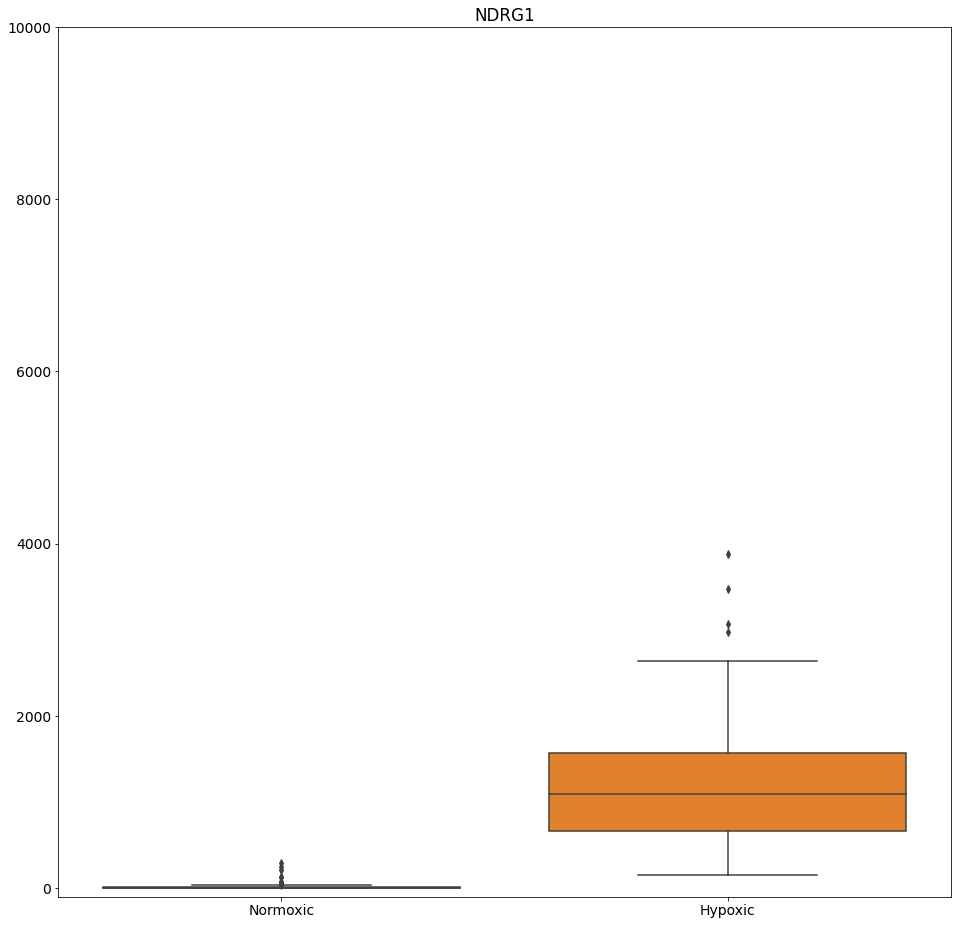

In [ ]:
plt.figure(figsize=(16,16))
sns.boxplot(data=[Gene_Norm, Gene_Hypo])
plt.ylim(-100, 10000)
plt.xticks(ticks = [0, 1], labels=["Normoxic", "Hypoxic"])
plt.title("NDRG1")
plt.show()

We can see from the plot that the gene NDRG1 has very different distribution between the hypoxic and the normoxic cells.

We now plot the gene CYP1A1 because it was the one that, from the previous analysis, seemed more important.

In [ ]:
Gene_Hypo = MCF7_Hypo_f_n_trans['"CYP1A1"']
Gene_Hypo

"output.STAR.2_B7_Hypo_S79_Aligned.sortedByCoord.out.bam"          0
"output.STAR.2_B9_Hypo_S81_Aligned.sortedByCoord.out.bam"         79
"output.STAR.2_C10_Hypo_S130_Aligned.sortedByCoord.out.bam"      238
"output.STAR.2_C11_Hypo_S131_Aligned.sortedByCoord.out.bam"      443
"output.STAR.2_C8_Hypo_S128_Aligned.sortedByCoord.out.bam"        14
                                                               ...  
"output.STAR.4_H10_Hypo_S382_Aligned.sortedByCoord.out.bam"       86
"output.STAR.4_H14_Hypo_S383_Aligned.sortedByCoord.out.bam"     1654
"output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoord.out.bam"     11274
"output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoord.out.bam"       563
"output.STAR.4_H9_Hypo_S381_Aligned.sortedByCoord.out.bam"       522
Name: "CYP1A1", Length: 124, dtype: int64

In [ ]:
Gene_Norm = MCF7_Norm_f_n_trans['"CYP1A1"']
Gene_Norm

"output.STAR.2_B3_Norm_S57_Aligned.sortedByCoord.out.bam"     0
"output.STAR.2_B4_Norm_S58_Aligned.sortedByCoord.out.bam"     0
"output.STAR.2_B5_Norm_S59_Aligned.sortedByCoord.out.bam"     0
"output.STAR.2_B6_Norm_S60_Aligned.sortedByCoord.out.bam"     0
"output.STAR.2_C1_Norm_S103_Aligned.sortedByCoord.out.bam"    0
                                                             ..
"output.STAR.4_H1_Norm_S355_Aligned.sortedByCoord.out.bam"    0
"output.STAR.4_H3_Norm_S357_Aligned.sortedByCoord.out.bam"    0
"output.STAR.4_H4_Norm_S358_Aligned.sortedByCoord.out.bam"    0
"output.STAR.4_H5_Norm_S359_Aligned.sortedByCoord.out.bam"    1
"output.STAR.4_H6_Norm_S360_Aligned.sortedByCoord.out.bam"    0
Name: "CYP1A1", Length: 126, dtype: int64

In [ ]:
Gene_Hypo.describe()

count      124.000000
mean      3233.911290
std       7712.505628
min          0.000000
25%          0.000000
50%        307.000000
75%       2554.500000
max      58717.000000
Name: "CYP1A1", dtype: float64

In [ ]:
Gene_Norm.describe()

count    126.000000
mean       1.111111
std        7.706851
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       78.000000
Name: "CYP1A1", dtype: float64

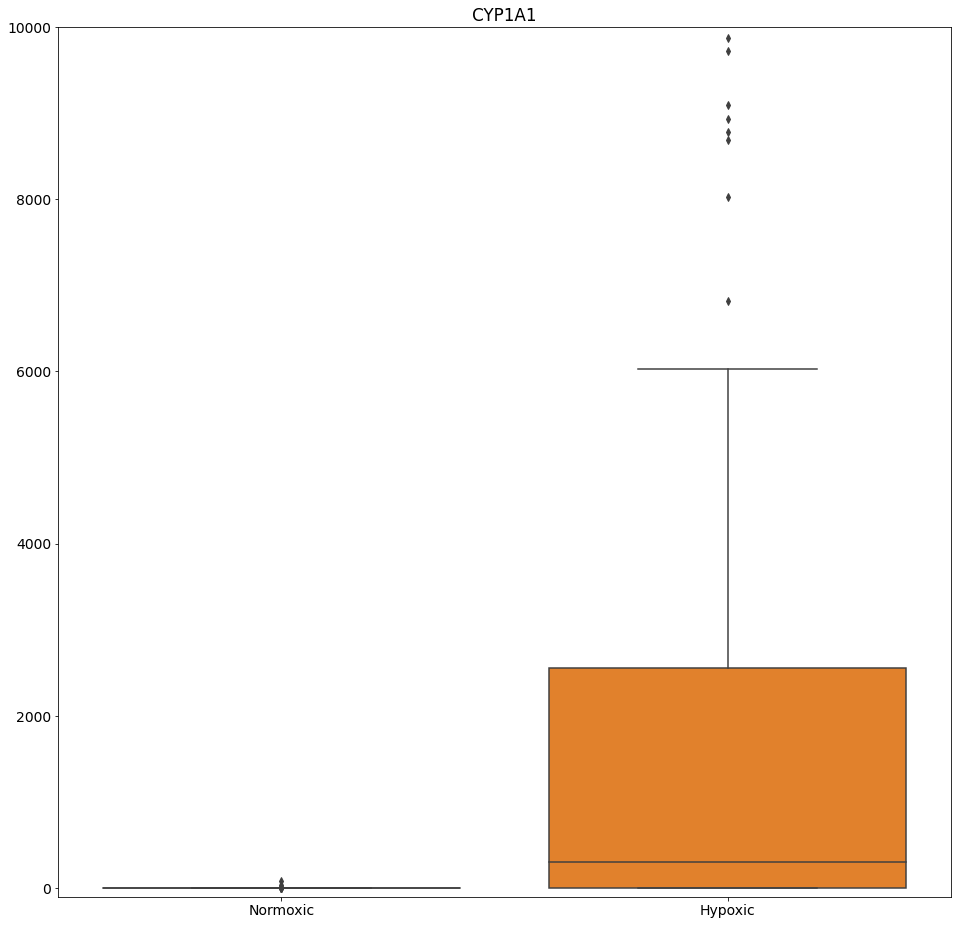

In [ ]:
plt.figure(figsize=(16,16))
sns.boxplot(data=[Gene_Norm, Gene_Hypo])
plt.ylim(-100, 10000)
plt.xticks(ticks = [0, 1], labels=["Normoxic", "Hypoxic"])
plt.title("CYP1A1")
plt.show()

Again, we can see that the distribution of the genes under hypoxic and normoxic condition are very much different.

##### Clustering Data

To better visualize the data, we performed a PCA in 2 dimensions and then used the data for K-means clustering. In such a way, we are trying to split the data in two groups and, by using different colours for hypoxic and normoxic cells, check whether the clustering assigned them correctly.

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
def plot_data_C(X, col):
  for i in range(len(X)):
    plt.plot(X[i][0], X[i][1], 'k.', markersize=2, c=col[i])

def plot_centroids_C(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, col, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data_C(X, col)
    if show_centroids:
        plot_centroids_C(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

In [ ]:
pcaM = PCA(n_components = 2)
MCF7_lowT = pcaM.fit_transform(MCF7_f_n.T)
MCF7_ret = pcaM.inverse_transform(MCF7_lowT)
print(MCF7_lowT.shape)

(250, 2)


In [ ]:
col = []
for c in MCF7_f_n.columns:
  if "Hypo" in c:
    col.append("r")
  else:
    col.append("b")
print(len(col))

250


In [ ]:
index = MCF7_f_n.T.index
MCF7_hyponormo = np.zeros((len(index)), dtype = 'int64')
for i in range(len(index)):
    MCF7_hyponormo[i] = not 'Hypo' in index[i] # 0 Hypo 1 Norm

fraction of correct predictions 0.96


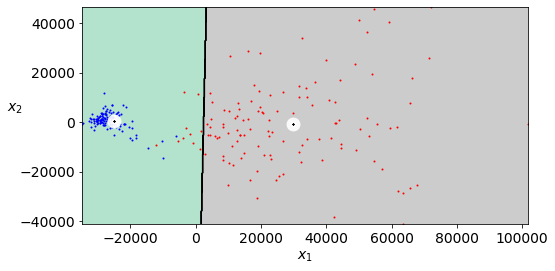

fraction of correct predictions 0.96


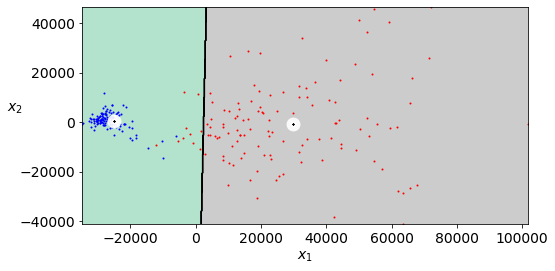

fraction of correct predictions 0.96


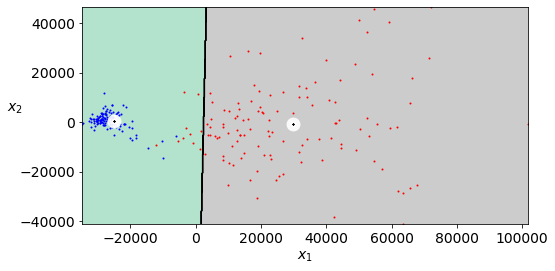

fraction of correct predictions 0.96


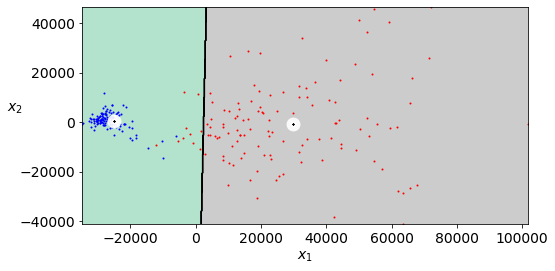

fraction of correct predictions 0.96


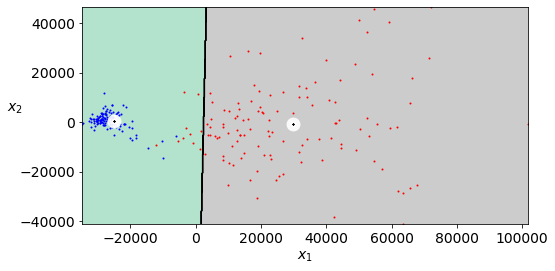

In [ ]:
from sklearn import metrics
k = 2
for i in [42, 52, 28, 37, 67]:
  kmeans = KMeans(n_clusters=k, random_state=i)
  y_pred = kmeans.fit_predict(MCF7_lowT)
  mapping = {}
  for class_id in np.unique(MCF7_hyponormo):
      mode, _ = stats.mode(y_pred[MCF7_hyponormo==class_id]) # look at all samples with a given label and study what is the most common label given by the Gaussian mixture
      # print(stats.mode(y_pred[MCF7_hyponormo ==class_id]))
      mapping[mode[0]] = class_id
  mapping
  y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])
  # print(accuracy_score(y_pred, MCF7_hyponormo))
  print("fraction of correct predictions", np.sum(y_pred==MCF7_hyponormo) / len(y_pred))
  plt.figure(figsize=(8, 4))
  plot_decision_boundaries(kmeans, MCF7_lowT, col)
  plt.show()

We tried to use different random states to calculate an average score of our K-means clustering. We can see that it predicts correctly 96% of the data in every case, this is probably due to the fact that we have used a dataset obtained from a PCA in 2 dimensions.

In [ ]:
kmeans_iter1 = KMeans(n_clusters=2, init="random", n_init=1,
                     algorithm="full", max_iter=1, random_state=20)
kmeans_iter2 = KMeans(n_clusters=2, init="random", n_init=1,
                     algorithm="full", max_iter=2, random_state=20)
kmeans_iter3 = KMeans(n_clusters=2, init="random", n_init=1,
                     algorithm="full", max_iter=3, random_state=20)
kmeans_iter10 = KMeans(n_clusters=2, init="random", n_init=1,
                     algorithm="full", max_iter=10, random_state=20)

kmeans_iter1.fit(MCF7_lowT)
kmeans_iter2.fit(MCF7_lowT)
kmeans_iter3.fit(MCF7_lowT)
kmeans_iter10.fit(MCF7_lowT)

KMeans(algorithm='full', init='random', max_iter=10, n_clusters=2, n_init=1,
       random_state=20)

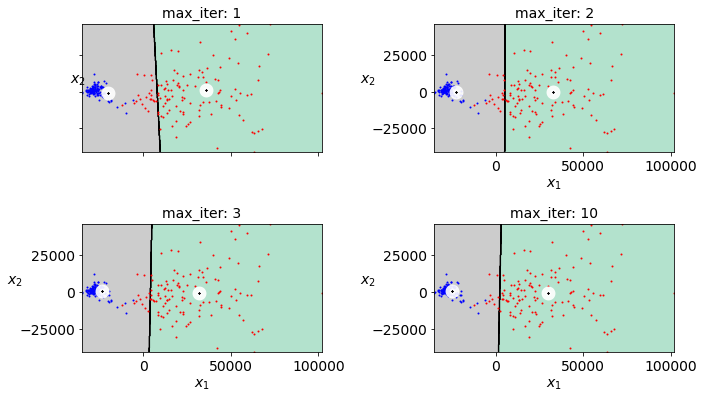

In [ ]:
plt.figure(figsize=(10, 8), tight_layout=True)

plt.subplot(321)
plot_decision_boundaries(kmeans_iter1, MCF7_lowT, col, show_xlabels=False, show_ylabels=False)
plt.title("max_iter: 1", fontsize=14)
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter2, MCF7_lowT, col, show_centroids=False)
plot_centroids_C(kmeans_iter2.cluster_centers_)
plt.title("max_iter: 2", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter3, MCF7_lowT, col, show_centroids=False)
plot_centroids_C(kmeans_iter3.cluster_centers_)
plt.title("max_iter: 3", fontsize=14)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter10, MCF7_lowT, col, show_centroids=False)
plot_centroids_C(kmeans_iter10.cluster_centers_)
plt.title("max_iter: 10", fontsize=14)

plt.show()

In [ ]:
from sklearn import metrics
k = 2
accuracy_scores = []
for i in [42, 52, 28, 37, 67]:
  kmeans = KMeans(n_clusters=k, random_state=i)
  y_pred = kmeans.fit_predict(MCF7_f_n.T)
  y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])
  print(accuracy_score(MCF7_hyponormo, y_pred))
  print("fraction of correct predictions", np.sum(y_pred==MCF7_hyponormo) / len(y_pred))
  accuracy_scores.append(accuracy_score(MCF7_hyponormo, y_pred))

0.972
fraction of correct predictions 0.972
0.972
fraction of correct predictions 0.972
0.972
fraction of correct predictions 0.972
0.968
fraction of correct predictions 0.968
0.972
fraction of correct predictions 0.972


In [ ]:
print("Average accuracy score:", sum(accuracy_scores)/len(accuracy_scores))

Average accuracy score: 0.9712


We then repeated the clustering using the dataset not processed by the PCA, obtaining a slightly higher accuracy score. This shows us that in this particular case, PCA in 2 dimensions keeps enough information from the original dataset.

In [ ]:
from sklearn.cluster import kmeans_plusplus

k = 2
accuracy_scores = []
for i in [110, 42, 66, 98, 200]:
  centroids, indices = kmeans_plusplus(MCF7_f_n.T.to_numpy(), n_clusters = 2, random_state=i)
  kmeans = KMeans(n_clusters=k, random_state=i)
  kmeans.fit(centroids)
  y_pred = kmeans.predict(MCF7_f_n.T)
  mapping = {}
  for class_id in np.unique(MCF7_hyponormo):
      mode, _ = stats.mode(y_pred[MCF7_hyponormo==class_id]) # look at all samples with a given label and study what is the most common label given by the Gaussian mixture
      # print(stats.mode(y_pred[MCF7_hyponormo ==class_id]))
      mapping[mode[0]] = class_id
  y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])
  print(accuracy_score(MCF7_hyponormo, y_pred))
  #print("fraction of correct predictions", np.sum(y_pred==MCF7_hyponormo) / len(y_pred))
  accuracy_scores.append(accuracy_score(MCF7_hyponormo, y_pred))
print("Average accuracy score:", sum(accuracy_scores)/len(accuracy_scores))

0.756
0.968
0.96
0.84
0.804
Average accuracy score: 0.8656


We finally tried to find the centroids using K-means++ and then used them to cluster the data.  We can see that the result is really close to the previous case where we used K-means. 

##### Skewness

Minimum skewness: 8.475271329455568


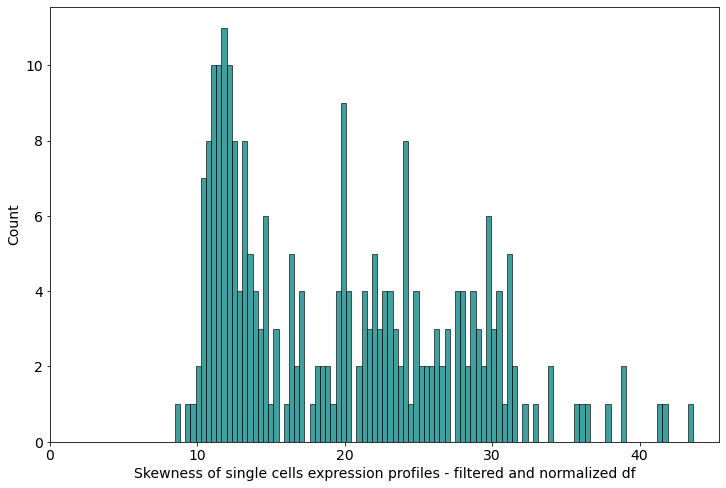

In [ ]:
from scipy.stats import kurtosis, skew
from sklearn.preprocessing import PowerTransformer, QuantileTransformer

cnames = list(MCF7_f_n.columns)

colN = np.shape(MCF7_f_n)[1]
colN

df_skew_cells = []
for i in range(colN) :     
     v_df = MCF7_f_n[cnames[i]]
     df_skew_cells += [skew(v_df)]   
  #  df_skew_cells += [df[cnames[i]].skew()]
print("Minimum skewness:", min(df_skew_cells))
g = sns.histplot(df_skew_cells,bins=100, color="teal")
sns.set(rc={'figure.figsize':(10, 5)})
g.set(xlim = (0, None))
plt.xlabel('Skewness of single cells expression profiles - filtered and normalized df')
plt.show()

Since the skewness tells us how much the gene expression of a single cell is normalized, by plotting the histogram of the skewness across the cells it's easy to see that most of the values are far from the origin, and in particular no value is smaller than 8.47, hence distributions are not normalized.

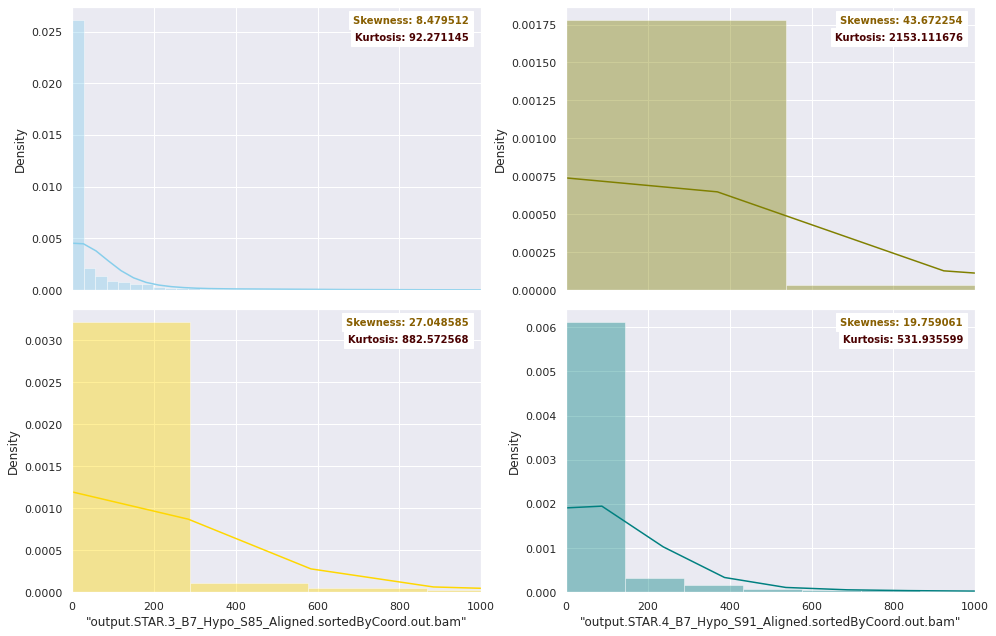

In [ ]:
import random
data = MCF7_f_n
f, axes = plt.subplots(2, 2, figsize=(14, 9 ), sharex=True)

r = [np.argmin(df_skew_cells), np.argmax(df_skew_cells)]
r += random.sample(range(250), 2)
sns.distplot(data.iloc[:,r[0]], color="skyblue", ax=axes[0,0], bins=200)
sns.distplot(data.iloc[:,r[1]], color="olive", ax=axes[0,1], bins=200)
sns.distplot(data.iloc[:, r[2]], color="gold", ax=axes[1,0], bins=200)
sns.distplot(data.iloc[:,r[3]], color="teal", ax=axes[1,1], bins=200)
axes[0,0].set_xlim(0,1000)
for i, ax in zip(r, axes.reshape(-1)):
    ax.text(x=0.97, y=0.97, transform=ax.transAxes, s="Skewness: %f" % data.iloc[:,i].skew(),\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:poo brown')
    ax.text(x=0.97, y=0.91, transform=ax.transAxes, s="Kurtosis: %f" % data.iloc[:,i].kurt(),\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:dried blood')
f.tight_layout()
plt.show()

We then plotted the distribution of the genes of 2 random cells, with the distributions of the cells with greatest and smallest skewness, and calculated their skewness and kurtosis. As a result, we immediately see that none of them has normal distribution, probably due to the sparsity of the data.

#### HCC1806

We now proceed to analyze the HCC1806 dataset as we did for MCF7.

##### Understanding the data

In [ ]:
HCC1806_f_n.head()

"output.STAR.PCRPlate1G12_Normoxia_S32_Aligned.sortedByCoord.out.bam"  \
"DDIT4"                                                    0                       
"ANGPTL4"                                                 48                       
"CALML5"                                                   0                       
"KRT14"                                                  321                       
"CCNB1"                                                  298                       

           "output.STAR.PCRPlate1G1_Hypoxia_S102_Aligned.sortedByCoord.out.bam"  \
"DDIT4"                                                 8739                      
"ANGPTL4"                                               2101                      
"CALML5"                                                  55                      
"KRT14"                                                   96                      
"CCNB1"                                                 1824                      

           "output.STAR.PCRPlate1G2_Hypoxia_S2_Aligned.sortedByCoord.out.bam"  \
"DDIT4"                                                13098                    
"ANGPTL4"                                              14032                    
"CALML5"                                                   0                    
"KRT14"                                                    0                    
"CCNB1"                                                 1616                    

           "output.STAR.PCRPlate1G3_Hypoxia_S7_Aligned.sortedByCoord.out.bam"  \
"DDIT4"                                                 2880                    
"ANGPTL4"                                                356                    
"CALML5"                                                   0                    
"KRT14"                                                 6211                    
"CCNB1"                                                    3                    

           "output.STAR.PCRPlate1G4_Hypoxia_S107_Aligned.sortedByCoord.out.bam"  \
"DDIT4"                                                 7777                      
"ANGPTL4"                                               5661                      
"CALML5"                                                4383                      
"KRT14"                                                    0                      
"CCNB1"                                                  145                      

           "output.STAR.PCRPlate1G7_Normoxia_S118_Aligned.sortedByCoord.out.bam"  \
"DDIT4"                                                  208                       
"ANGPTL4"                                                  0                       
"CALML5"                                                1902                       
"KRT14"                                                    0                       
"CCNB1"                                                  378                       

           "output.STAR.PCRPlate1G8_Normoxia_S19_Aligned.sortedByCoord.out.bam"  \
"DDIT4"                                                  750                      
"ANGPTL4"                                                  0                      
"CALML5"                                                   0                      
"KRT14"                                                 5050                      
"CCNB1"                                                   66                      

           "output.STAR.PCRPlate1G9_Normoxia_S121_Aligned.sortedByCoord.out.bam"  \
"DDIT4"                                                  127                       
"ANGPTL4"                                                  0                       
"CALML5"                                                   0                       
"KRT14"                                                  462                       
"CCNB1"                                                   58                       

           "output.STAR.P

In [ ]:
HCC1806_f_n.describe()
HCC1806_f_n_describe = HCC1806_f_n.describe()
HCC1806_f_n_describe

"output.STAR.PCRPlate1G12_Normoxia_S32_Aligned.sortedByCoord.out.bam"  \
count                                        3000.000000                       
mean                                          149.353000                       
std                                          1052.553246                       
min                                             0.000000                       
25%                                             0.000000                       
50%                                             0.000000                       
75%                                             5.250000                       
max                                         39148.000000                       

       "output.STAR.PCRPlate1G1_Hypoxia_S102_Aligned.sortedByCoord.out.bam"  \
count                                        3000.000000                      
mean                                          182.303000                      
std                                           871.447201                      
min                                             0.000000                      
25%                                             0.000000                      
50%                                             0.000000                      
75%                                            33.000000                      
max                                         22572.000000                      

       "output.STAR.PCRPlate1G2_Hypoxia_S2_Aligned.sortedByCoord.out.bam"  \
count                                        3000.000000                    
mean                                          178.945667                    
std                                           965.087457                    
min                                             0.000000                    
25%                                             0.000000                    
50%                                             0.000000                    
75%                                             0.000000                    
max                                         21430.000000                    

       "output.STAR.PCRPlate1G3_Hypoxia_S7_Aligned.sortedByCoord.out.bam"  \
count                                        3000.000000                    
mean                                          168.183333                    
std                                           918.214156                    
min                                             0.000000                    
25%                                             0.000000                    
50%                                             0.000000                    
75%                                            30.000000                    
max                                         24033.000000                    

       "output.STAR.PCRPlate1G4_Hypoxia_S107_Aligned.sortedByCoord.out.bam"  \
count                                        3000.000000                      
mean                                          184.400000                      
std                                          1267.698452                      
min                                             0.000000                      
25%                                             0.000000                      
50%                                             0.000000                      
75%                                             0.000000                      
max                                         32768.000000                      

       "output.STAR.PCRPlate1G7_Normoxia_S118_Aligned.sortedByCoord.out.bam"  \
count                                         3000.00000                       
mean                                           168.87200                       
std                                           1607.97906                       
min                                              0.00000                       
25%                                              0.00000                  

Plotting the mean of the cells.

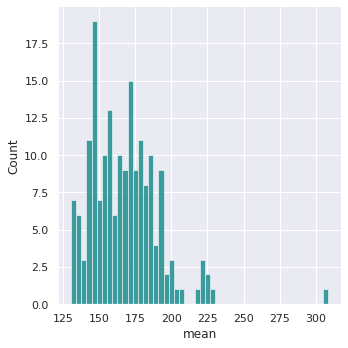

In [ ]:
sns.displot(data = HCC1806_f_n_describe.iloc[1], bins=50, color="teal")
plt.show()

Plotting the 75% quantile of the cells.

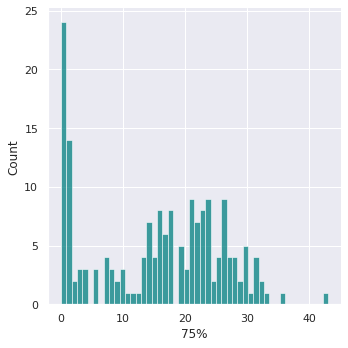

In [ ]:
sns.displot(data = HCC1806_f_n_describe.iloc[6], bins=50, color="teal")
plt.show()

It is nice to see how many cells have mean different than 0. Said so, because many of them have third-quantile equal to 0, it means that many genes will equal to 0.

Plotting now some informations about the genes.

In [ ]:
HCC1806_f_n_describe = HCC1806_f_n.T.describe()
HCC1806_f_n_describe

"DDIT4"     "ANGPTL4"     "CALML5"       "KRT14"      "CCNB1"  \
count    182.000000    182.000000   182.000000    182.000000   182.000000   
mean    4038.736264   1227.164835   398.175824    921.307692   867.087912   
std     4165.241080   1949.430648   886.985647   2387.091444  1268.359981   
min        0.000000      0.000000     0.000000      0.000000     0.000000   
25%      295.000000      4.250000     0.000000     13.750000    61.250000   
50%     2729.500000    290.000000     0.000000    320.500000   299.500000   
75%     6933.500000   1857.750000   465.750000   1029.000000   988.500000   
max    16700.000000  14032.000000  5482.000000  28680.000000  6914.000000   

          "IGFBP3"      "AKR1C2"       "KRT6A"      "NDRG1"       "KRT4"  ...  \
count    182.00000    182.000000    182.000000   182.000000   182.000000  ...   
mean    1271.28022   1407.873626   1729.543956   457.895604   396.637363  ...   
std     2810.10746   2582.400094   3709.250440   627.115448  1541.330938  ...   
min        0.00000      0.000000      0.000000     0.000000     0.000000  ...   
25%       83.00000    140.250000    313.500000     4.000000     0.000000  ...   
50%      270.50000    484.000000    737.000000   143.500000     0.000000  ...   
75%     1163.50000   1472.000000   1774.000000   688.750000     0.000000  ...   
max    21554.00000  20195.000000  41946.000000  3356.000000  9902.000000  ...   

          "MST1R"    "ZYG11A"      "NRG1"     "RBMS3"     "VCPIP1"  \
count  182.000000  182.000000  182.000000  182.000000   182.000000   
mean   123.302198    4.291209  138.868132    7.192308    56.675824   
std    119.297816   11.790896  147.116950   21.864761   123.906663   
min      0.000000    0.000000    0.000000    0.000000     0.000000   
25%     27.500000    0.000000   36.250000    0.000000     0.000000   
50%     98.500000    0.000000   97.000000    0.000000    36.000000   
75%    185.750000    0.000000  191.000000    6.000000    74.250000   
max    751.000000   68.000000  852.000000  246.000000  1545.000000   

       "LINC02693"    "OR8B9P"     "NEAT1"   "ZDHHC23"     "ODAD2"  
count   182.000000  182.000000  182.000000  182.000000  182.000000  
mean     57.098901    0.153846  102.076923   12.236264    2.175824  
std      86.519829    1.060835  140.866555   28.353222    8.754596  
min       0.000000    0.000000    1.000000    0.000000    0.000000  
25%       0.250000    0.000000   25.000000    0.000000    0.000000  
50%      34.000000    0.000000   57.000000    0.000000    0.000000  
75%      68.000000    0.000000  117.500000   11.500000    0.000000  
max     615.000000   11.000000  966.000000  222.000000   67.000000  

[8 rows x 3000 columns]

Plotting the mean of the genes.

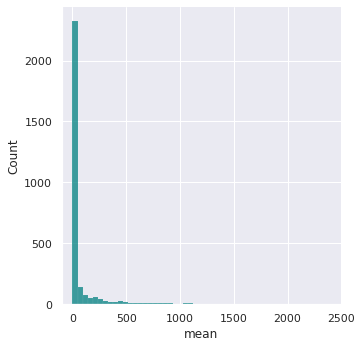

In [ ]:
sns.displot(data = HCC1806_f_n_describe.iloc[1], bins=500, color="teal")
plt.xlim(-100, 2500)
plt.show()

Plotting the 75% quantile of the cells.

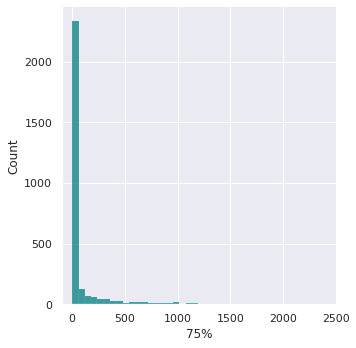

In [ ]:
sns.displot(data = HCC1806_f_n_describe.iloc[6], bins=500, color="teal")
plt.xlim(-100, 2500)
plt.show()

Many genes have both mean and 75% quantile near to 0.

##### Correlation

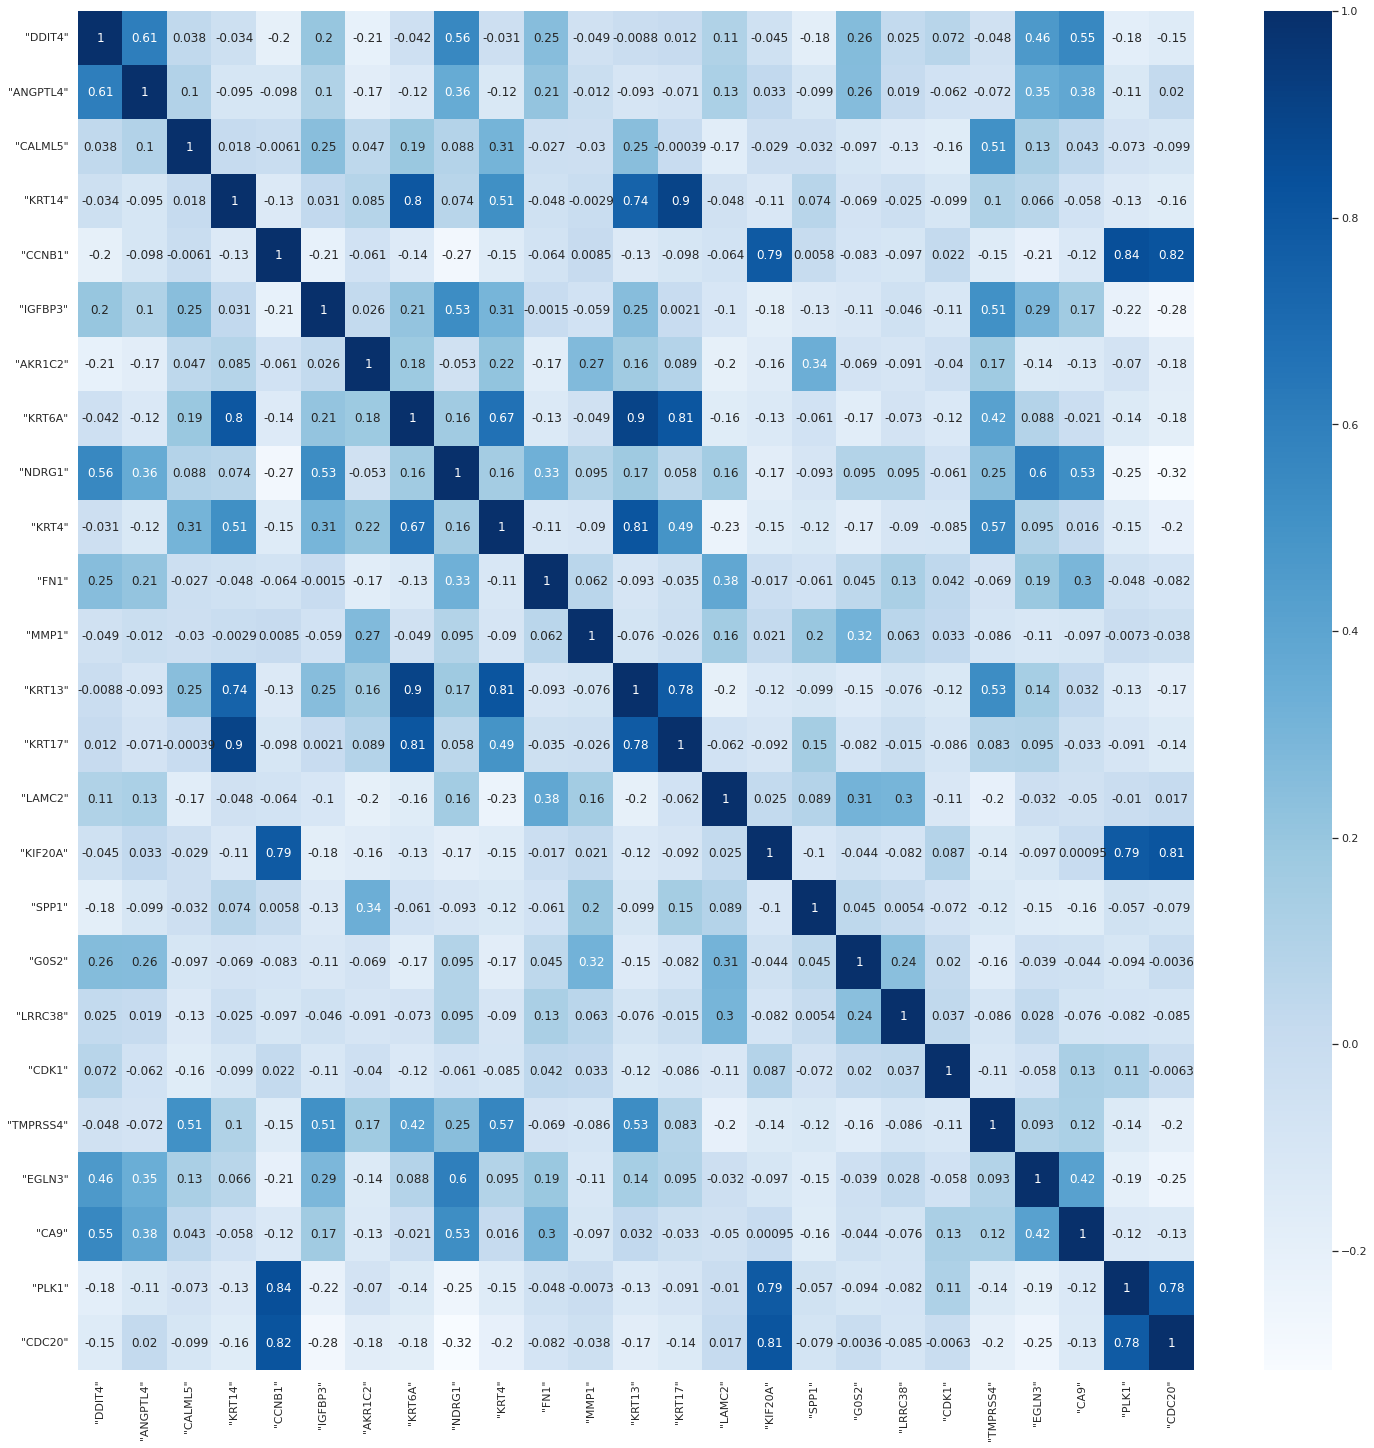

In [ ]:
# To see the correlation between genes
df_new = HCC1806_f_n.transpose().iloc[:,:25]
plt.figure(figsize=(25,25))
sns.heatmap(df_new.corr(),cbar=True,annot=True,cmap='Blues')
plt.show()

##### Hypo vs Norm

In [ ]:
HCC1806_Hypo_f_n = HCC1806_f_n.loc[:, HCC1806_f_n.columns.str.contains('Hypoxia')]
HCC1806_Hypo_f_n

"output.STAR.PCRPlate1G1_Hypoxia_S102_Aligned.sortedByCoord.out.bam"  \
"DDIT4"                                                   8739                      
"ANGPTL4"                                                 2101                      
"CALML5"                                                    55                      
"KRT14"                                                     96                      
"CCNB1"                                                   1824                      
...                                                        ...                      
"LINC02693"                                                 68                      
"OR8B9P"                                                     0                      
"NEAT1"                                                    213                      
"ZDHHC23"                                                    0                      
"ODAD2"                                                      0                      

             "output.STAR.PCRPlate1G2_Hypoxia_S2_Aligned.sortedByCoord.out.bam"  \
"DDIT4"                                                  13098                    
"ANGPTL4"                                                14032                    
"CALML5"                                                     0                    
"KRT14"                                                      0                    
"CCNB1"                                                   1616                    
...                                                        ...                    
"LINC02693"                                                  0                    
"OR8B9P"                                                     0                    
"NEAT1"                                                     92                    
"ZDHHC23"                                                    0                    
"ODAD2"                                                      0                    

             "output.STAR.PCRPlate1G3_Hypoxia_S7_Aligned.sortedByCoord.out.bam"  \
"DDIT4"                                                   2880                    
"ANGPTL4"                                                  356                    
"CALML5"                                                     0                    
"KRT14"                                                   6211                    
"CCNB1"                                                      3                    
...                                                        ...                    
"LINC02693"                                                  1                    
"OR8B9P"                                                     0                    
"NEAT1"                                                      1                    
"ZDHHC23"                                                    0                    
"ODAD2"                                                      0                    

             "output.STAR.PCRPlate1G4_Hypoxia_S107_Aligned.sortedByCoord.out.bam"  \
"DDIT4"                                                   7777                      
"ANGPTL4"                                                 5661                      
"CALML5"                                                  4383                      
"KRT14"                                                      0                      
"CCNB1"                                                    145                      
...                                                        ...                      
"LINC02693"                                                  0                      
"OR8B9P"                                                     0                      
"NEAT1"                                                    128                      
"ZDHHC23"                                                    0                      
"ODAD2"                                                      0 

In [ ]:
HCC1806_Norm_f_n = HCC1806_f_n.loc[:, HCC1806_f_n.columns.str.contains('Normoxia')]
HCC1806_Norm_f_n

"output.STAR.PCRPlate1G12_Normoxia_S32_Aligned.sortedByCoord.out.bam"  \
"DDIT4"                                                      0                       
"ANGPTL4"                                                   48                       
"CALML5"                                                     0                       
"KRT14"                                                    321                       
"CCNB1"                                                    298                       
...                                                        ...                       
"LINC02693"                                                 29                       
"OR8B9P"                                                     0                       
"NEAT1"                                                     29                       
"ZDHHC23"                                                    0                       
"ODAD2"                                                      0                       

             "output.STAR.PCRPlate1G7_Normoxia_S118_Aligned.sortedByCoord.out.bam"  \
"DDIT4"                                                    208                       
"ANGPTL4"                                                    0                       
"CALML5"                                                  1902                       
"KRT14"                                                      0                       
"CCNB1"                                                    378                       
...                                                        ...                       
"LINC02693"                                                  1                       
"OR8B9P"                                                     0                       
"NEAT1"                                                     56                       
"ZDHHC23"                                                    0                       
"ODAD2"                                                      0                       

             "output.STAR.PCRPlate1G8_Normoxia_S19_Aligned.sortedByCoord.out.bam"  \
"DDIT4"                                                    750                      
"ANGPTL4"                                                    0                      
"CALML5"                                                     0                      
"KRT14"                                                   5050                      
"CCNB1"                                                     66                      
...                                                        ...                      
"LINC02693"                                                  0                      
"OR8B9P"                                                     0                      
"NEAT1"                                                    415                      
"ZDHHC23"                                                    0                      
"ODAD2"                                                      0                      

             "output.STAR.PCRPlate1G9_Normoxia_S121_Aligned.sortedByCoord.out.bam"  \
"DDIT4"                                                    127                       
"ANGPTL4"                                                    0                       
"CALML5"                                                     0                       
"KRT14"                                                    462                       
"CCNB1"                                                     58                       
...                                                        ...                       
"LINC02693"                                                195                       
"OR8B9P"                                                     0                       
"NEAT1"                                                     42                       
"ZDHHC23"                                                   18    

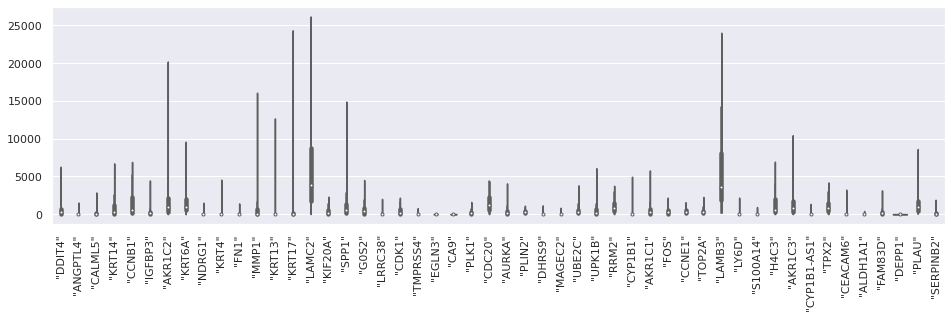

In [ ]:
df_small = HCC1806_Norm_f_n.transpose().iloc[0:, :50]
plt.figure(figsize=(16,4))
plot=sns.violinplot(data=df_small,palette="Set3",cut=0)
plt.setp(plot.get_xticklabels(), rotation=90)
plt.show()

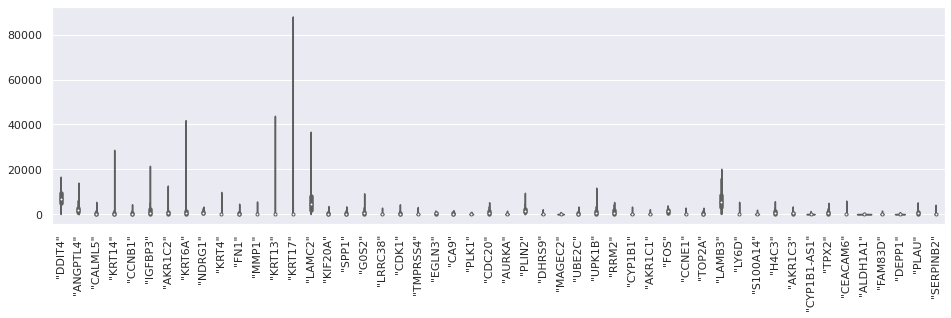

In [ ]:
df_small = HCC1806_Hypo_f_n.transpose().iloc[0:, :50]
plt.figure(figsize=(16,4))
plot=sns.violinplot(data=df_small,palette="Set3",cut=0)
plt.setp(plot.get_xticklabels(), rotation=90)
plt.show()

Even though it is not as clear as in the MCF7 case, we can still see that there are some differences between the distibutions of genes in hypoxic or normoxic conditions.

We compute again the ration of the log_2 of the means + 1 to see what genes are more imporant than othern in classifying the hypoxic and normoxic condition. Later we also compute it with random forests.

In [ ]:
HCC1806_Hypo_f_n_trans = HCC1806_Hypo_f_n.T
HCC1806_Norm_f_n_trans = HCC1806_Norm_f_n.T

In [ ]:
HCC1806_Hypo_f_n_trans_d = HCC1806_Hypo_f_n.T.describe()
HCC1806_Norm_f_n_trans_d = HCC1806_Norm_f_n.T.describe()

In [ ]:
HCC1806_f_n_logratio = np.log2(HCC1806_Hypo_f_n_trans_d.iloc[1] + 1) - np.log2(HCC1806_Norm_f_n_trans_d.iloc[1] + 1)
HCC1806_f_n_logratio.sort_values(ascending=False)

"CA9"        6.419824
"EGLN3"      5.897350
"ANGPTL4"    5.567300
"CEACAM5"    5.416698
"TPPP3"      4.929030
               ...   
"NLRP7"     -2.387323
"RBPMS2"    -2.498775
"AKR1B10"   -2.557506
"NPFFR2"    -2.596755
"OASL"      -4.030607
Name: mean, Length: 3000, dtype: float64

Apparently, the gene CA9 is the most important in the HCC1806 dataset.

###### Check with random forest which cells have higher importance

We now try to get the most important genes with a random forest to check wheter they are the same as the ones we found before.

In [ ]:
data_test = HCC1806_f_n

In [ ]:
# Let's load the packages
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
#import shap
from matplotlib import pyplot as plt

plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

In [ ]:
index = data_test.T.index
y = np.zeros((len(index)),dtype = 'int64')
for i in range(len(index)):
    y[i] = not 'Hypo' in index[i] # 0 Hypo 1 Norm

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_test.T, y, test_size= 0.1, random_state= 42)

In [ ]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
genes_importance = rf.feature_importances_

In [ ]:
genes = {}
for n, g in zip(data_test.index, genes_importance):
  genes[n] = g
print({k: v for k, v in sorted(genes.items(), key=lambda item: item[1], reverse=True)}) 

{'"PGK1"': 0.41121140437726483, '"DDIT4"': 0.21375320859702115, '"NDRG1"': 0.09159165949503784, '"EGLN3"': 0.05617846108839006, '"BNIP3"': 0.03737047723028583, '"ANGPTL4"': 0.03573394372296992, '"CA9"': 0.019256528360955545, '"BNIP3L"': 0.018178378198055508, '"FUT11"': 0.017783749905413676, '"ERO1A"': 0.009754628932711123, '"BHLHE40"': 0.009046375862947207, '"INSIG1"': 0.002550127433425332, '"PFKFB3"': 0.002129661023551652, '"KDM5B"': 0.00212678801708075, '"UGT1A6"': 0.0020905611731218375, '"ENO2"': 0.001985921212941655, '"PPIF"': 0.001925520722112464, '"FAM162A"': 0.00190783790465825, '"ZFYVE1"': 0.0018494232625559577, '"F3"': 0.0016865150616515079, '"KLHL24"': 0.0016755120577069164, '"CD44"': 0.001577551533433888, '"MUC1"': 0.001434924295836034, '"IL17RD"': 0.0014321312523344835, '"CDK2AP2"': 0.0011932703760057328, '"FTL"': 0.0011852123210050725, '"PLAU"': 0.0009690943944272136, '"ZNF143"': 0.0009582549246039886, '"SLC2A3"': 0.0009576672468065446, '"RNASE7"': 0.0009555804259806406, '

Apparently, the gene that is more important in determining wether a cell is under hypoxic or normoxic condition is the PGK1, which wasn't in the first genes in the other analysis.

In [ ]:
# to see the less important ones.
print({k: v for k, v in sorted(genes.items(), key=lambda item: item[1], reverse=False)}) 

{'"CALML5"': 0.0, '"KRT14"': 0.0, '"CCNB1"': 0.0, '"IGFBP3"': 0.0, '"KRT6A"': 0.0, '"KRT4"': 0.0, '"FN1"': 0.0, '"KRT13"': 0.0, '"KRT17"': 0.0, '"LAMC2"': 0.0, '"KIF20A"': 0.0, '"SPP1"': 0.0, '"G0S2"': 0.0, '"LRRC38"': 0.0, '"CDK1"': 0.0, '"TMPRSS4"': 0.0, '"PLK1"': 0.0, '"CDC20"': 0.0, '"AURKA"': 0.0, '"PLIN2"': 0.0, '"DHRS9"': 0.0, '"MAGEC2"': 0.0, '"UBE2C"': 0.0, '"UPK1B"': 0.0, '"CYP1B1"': 0.0, '"AKR1C1"': 0.0, '"FOS"': 0.0, '"CCNE1"': 0.0, '"TOP2A"': 0.0, '"LAMB3"': 0.0, '"LY6D"': 0.0, '"S100A14"': 0.0, '"AKR1C3"': 0.0, '"CYP1B1-AS1"': 0.0, '"TPX2"': 0.0, '"CEACAM6"': 0.0, '"ALDH1A1"': 0.0, '"FAM83D"': 0.0, '"DEPP1"': 0.0, '"SERPINB2"': 0.0, '"CCNB3"': 0.0, '"CXCL1"': 0.0, '"MUC16"': 0.0, '"VILL"': 0.0, '"KLK10"': 0.0, '"ELF3"': 0.0, '"GDF15"': 0.0, '"SERPINE1"': 0.0, '"PADI3"': 0.0, '"FAM83A"': 0.0, '"CPA4"': 0.0, '"UCA1"': 0.0, '"SCD"': 0.0, '"IGFL2-AS1"': 0.0, '"TXNIP"': 0.0, '"ZNF792"': 0.0, '"PIF1"': 0.0, '"DTL"': 0.0, '"THBS1"': 0.0, '"AMIGO1"': 0.0, '"HAS2"': 0.0, '"FST"': 

To see the differences in distribution of the gene, we plot some boxplots.

In [ ]:
Gene_Hypo = HCC1806_Hypo_f_n_trans['"PGK1"']
Gene_Hypo

"output.STAR.PCRPlate1G1_Hypoxia_S102_Aligned.sortedByCoord.out.bam"    6180
"output.STAR.PCRPlate1G2_Hypoxia_S2_Aligned.sortedByCoord.out.bam"      5433
"output.STAR.PCRPlate1G3_Hypoxia_S7_Aligned.sortedByCoord.out.bam"      4159
"output.STAR.PCRPlate1G4_Hypoxia_S107_Aligned.sortedByCoord.out.bam"    6056
"output.STAR.PCRPlate1H1_Hypoxia_S103_Aligned.sortedByCoord.out.bam"    6424
                                                                        ... 
"output.STAR.PCRPlate4F5_Hypoxia_S229_Aligned.sortedByCoord.out.bam"    4237
"output.STAR.PCRPlate4G1_Hypoxia_S193_Aligned.sortedByCoord.out.bam"    5388
"output.STAR.PCRPlate4G2_Hypoxia_S198_Aligned.sortedByCoord.out.bam"    5883
"output.STAR.PCRPlate4G6_Hypoxia_S232_Aligned.sortedByCoord.out.bam"    6607
"output.STAR.PCRPlate4H2_Hypoxia_S199_Aligned.sortedByCoord.out.bam"    4274
Name: "PGK1", Length: 97, dtype: int64

In [ ]:
Gene_Norm = HCC1806_Norm_f_n_trans['"PGK1"']
Gene_Norm

"output.STAR.PCRPlate1G12_Normoxia_S32_Aligned.sortedByCoord.out.bam"     1125
"output.STAR.PCRPlate1G7_Normoxia_S118_Aligned.sortedByCoord.out.bam"     1159
"output.STAR.PCRPlate1G8_Normoxia_S19_Aligned.sortedByCoord.out.bam"      2600
"output.STAR.PCRPlate1G9_Normoxia_S121_Aligned.sortedByCoord.out.bam"     1321
"output.STAR.PCRPlate1H9_Normoxia_S122_Aligned.sortedByCoord.out.bam"     1448
                                                                          ... 
"output.STAR.PCRPlate4G7_Normoxia_S204_Aligned.sortedByCoord.out.bam"     1607
"output.STAR.PCRPlate4H10_Normoxia_S210_Aligned.sortedByCoord.out.bam"    1259
"output.STAR.PCRPlate4H11_Normoxia_S214_Aligned.sortedByCoord.out.bam"    1145
"output.STAR.PCRPlate4H7_Normoxia_S205_Aligned.sortedByCoord.out.bam"     1191
"output.STAR.PCRPlate4H9_Normoxia_S236_Aligned.sortedByCoord.out.bam"     1995
Name: "PGK1", Length: 85, dtype: int64

In [ ]:
Gene_Hypo.describe()

count      97.000000
mean     5289.773196
std      1559.183330
min         0.000000
25%      4237.000000
50%      5264.000000
75%      6318.000000
max      8370.000000
Name: "PGK1", dtype: float64

In [ ]:
Gene_Norm.describe()

count      85.000000
mean     1430.070588
std       476.128229
min         0.000000
25%      1159.000000
50%      1409.000000
75%      1658.000000
max      3737.000000
Name: "PGK1", dtype: float64

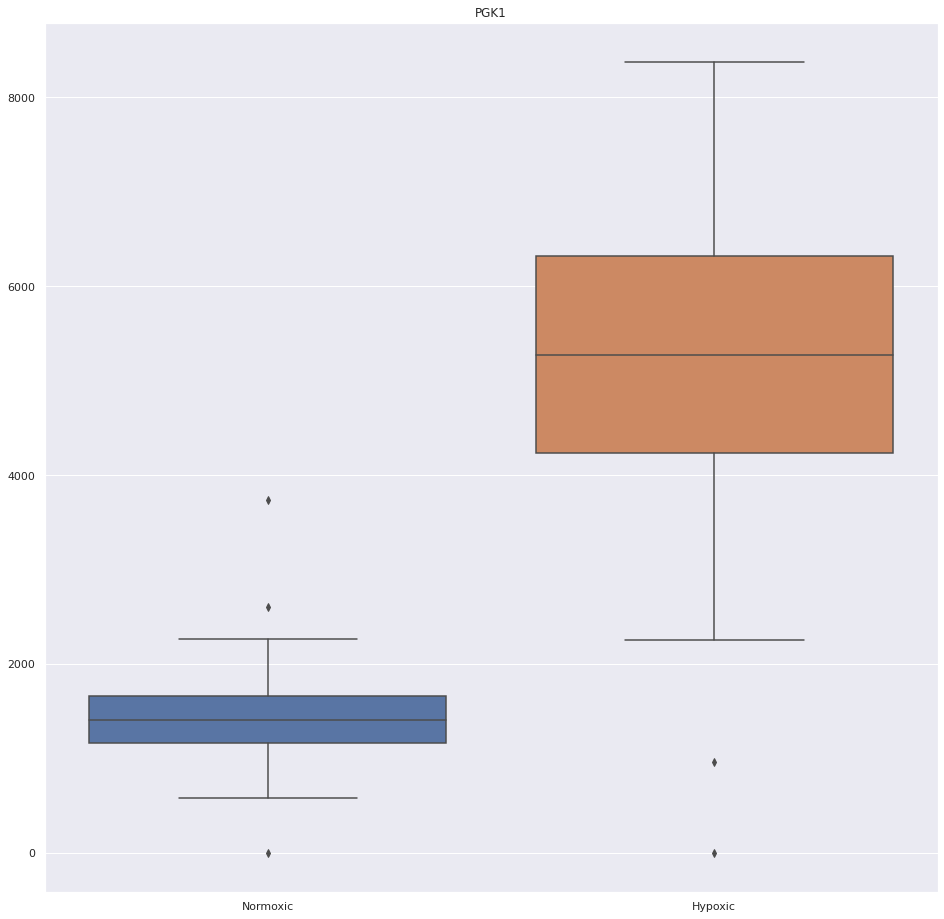

In [ ]:
plt.figure(figsize=(16,16))
sns.boxplot(data=[Gene_Norm, Gene_Hypo])
plt.xticks(ticks = [0, 1], labels=["Normoxic", "Hypoxic"])
plt.title("PGK1")
plt.show()

We can see from the plot that the gene PGK1 has very different distribution between the hypoxic and the normoxic cells.

We now plot the gene CA9 because it was the one that, from the previous analysis, seemed more important.

In [ ]:
Gene_Hypo = HCC1806_Hypo_f_n_trans['"CA9"']
Gene_Hypo

"output.STAR.PCRPlate1G1_Hypoxia_S102_Aligned.sortedByCoord.out.bam"    977
"output.STAR.PCRPlate1G2_Hypoxia_S2_Aligned.sortedByCoord.out.bam"      155
"output.STAR.PCRPlate1G3_Hypoxia_S7_Aligned.sortedByCoord.out.bam"      437
"output.STAR.PCRPlate1G4_Hypoxia_S107_Aligned.sortedByCoord.out.bam"    257
"output.STAR.PCRPlate1H1_Hypoxia_S103_Aligned.sortedByCoord.out.bam"    309
                                                                       ... 
"output.STAR.PCRPlate4F5_Hypoxia_S229_Aligned.sortedByCoord.out.bam"    219
"output.STAR.PCRPlate4G1_Hypoxia_S193_Aligned.sortedByCoord.out.bam"    261
"output.STAR.PCRPlate4G2_Hypoxia_S198_Aligned.sortedByCoord.out.bam"     82
"output.STAR.PCRPlate4G6_Hypoxia_S232_Aligned.sortedByCoord.out.bam"    804
"output.STAR.PCRPlate4H2_Hypoxia_S199_Aligned.sortedByCoord.out.bam"     61
Name: "CA9", Length: 97, dtype: int64

In [ ]:
Gene_Norm = HCC1806_Norm_f_n_trans['"CA9"']
Gene_Norm

"output.STAR.PCRPlate1G12_Normoxia_S32_Aligned.sortedByCoord.out.bam"     0
"output.STAR.PCRPlate1G7_Normoxia_S118_Aligned.sortedByCoord.out.bam"     0
"output.STAR.PCRPlate1G8_Normoxia_S19_Aligned.sortedByCoord.out.bam"      0
"output.STAR.PCRPlate1G9_Normoxia_S121_Aligned.sortedByCoord.out.bam"     0
"output.STAR.PCRPlate1H9_Normoxia_S122_Aligned.sortedByCoord.out.bam"     0
                                                                         ..
"output.STAR.PCRPlate4G7_Normoxia_S204_Aligned.sortedByCoord.out.bam"     1
"output.STAR.PCRPlate4H10_Normoxia_S210_Aligned.sortedByCoord.out.bam"    0
"output.STAR.PCRPlate4H11_Normoxia_S214_Aligned.sortedByCoord.out.bam"    0
"output.STAR.PCRPlate4H7_Normoxia_S205_Aligned.sortedByCoord.out.bam"     0
"output.STAR.PCRPlate4H9_Normoxia_S236_Aligned.sortedByCoord.out.bam"     0
Name: "CA9", Length: 85, dtype: int64

In [ ]:
Gene_Hypo.describe()

count      97.000000
mean      349.525773
std       323.676346
min         0.000000
25%       115.000000
50%       263.000000
75%       500.000000
max      1779.000000
Name: "CA9", dtype: float64

In [ ]:
Gene_Norm.describe()

count    85.000000
mean      3.094118
std      10.444437
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max      71.000000
Name: "CA9", dtype: float64

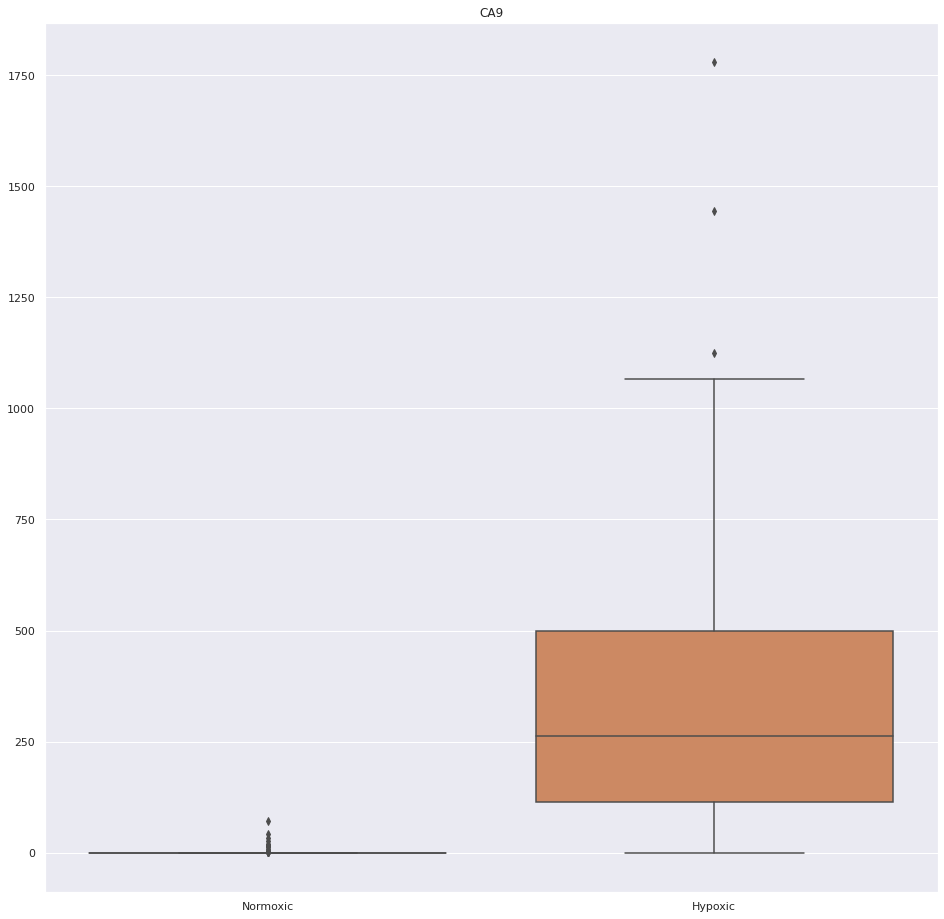

In [ ]:
plt.figure(figsize=(16,16))
sns.boxplot(data=[Gene_Norm, Gene_Hypo])
plt.xticks(ticks = [0, 1], labels=["Normoxic", "Hypoxic"])
plt.title("CA9")
plt.show()

Again, we can see that the distribution of the genes under hypoxic and normoxic condition are very much different.\
But it is quite nice to see that we didn't need to use any ylim. We can interpret this by saying that, in HCC1806, the outliners have less important meaning in finding wether a cell is hypoxic or normoxic than in MCF7.

##### Clustering Data

To better visualize the data, we performed a PCA in 2 dimensions and then used the data for K-means clustering. In such a way, we are trying to split the data in two groups and, by using different colours for hypoxic and normoxic cells, check whether the clustering assigned them correctly.

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
def plot_data_C(X, col):
  for i in range(len(X)):
    plt.plot(X[i][0], X[i][1], 'k.', markersize=2, c=col[i])

def plot_centroids_C(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, col, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data_C(X, col)
    if show_centroids:
        plot_centroids_C(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

In [ ]:
pcaM = PCA(n_components = 2)
HCC1806_lowT = pcaM.fit_transform(HCC1806_f_n.T)
HCC1806_ret = pcaM.inverse_transform(HCC1806_lowT)
print(HCC1806_lowT.shape)

(182, 2)


In [ ]:
col = []
for c in HCC1806_f_n.columns:
  if "Hypo" in c:
    col.append("r")
  else:
    col.append("b")
print(len(col))

182


In [ ]:
index = HCC1806_f_n.T.index
HCC1806_hyponormo = np.zeros((len(index)), dtype = 'int64')
for i in range(len(index)):
    HCC1806_hyponormo[i] = not 'Hypo' in index[i] # 0 Hypo 1 Norm

print(HCC1806_hyponormo)

[1 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1
 1 0 0 0 0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 0 0 1 1 1 1 1 0 0 0 0 1 1
 1 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 1 1 1
 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 1 1 1 1 1 0 0 0 1
 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 1 1 0 1 1]


fraction of correct predictions 0.5164835164835165


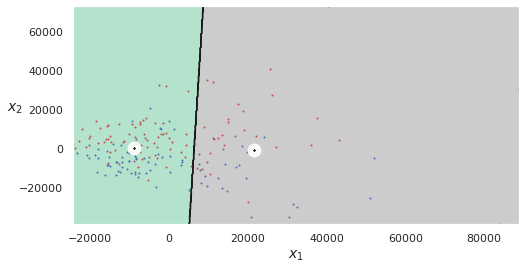

fraction of correct predictions 0.5164835164835165


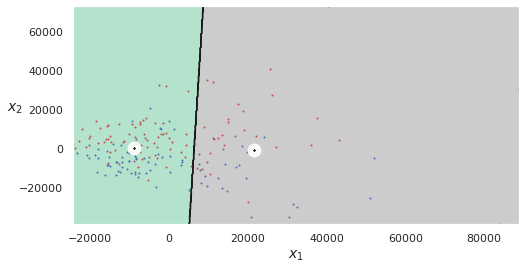

fraction of correct predictions 0.5164835164835165


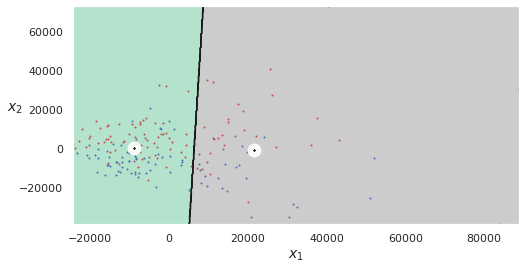

fraction of correct predictions 0.5164835164835165


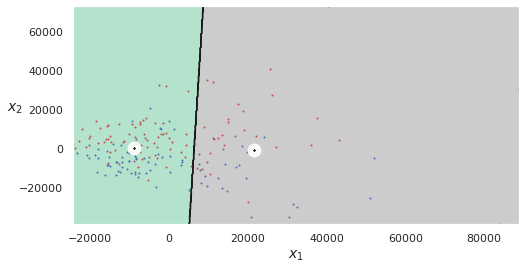

fraction of correct predictions 0.5164835164835165


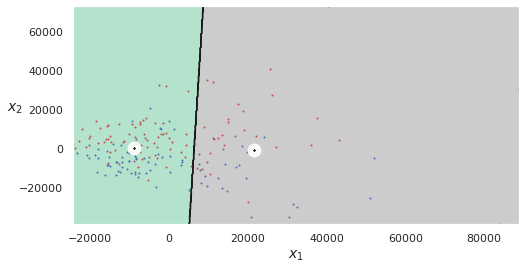

In [ ]:
from sklearn import metrics
k = 2
for i in [42, 44, 28, 36, 40]:
  kmeans = KMeans(n_clusters=k, random_state=i)
  y_pred = kmeans.fit_predict(HCC1806_lowT)
  mapping = {}
  for class_id in np.unique(HCC1806_hyponormo):
      mode, _ = stats.mode(y_pred[HCC1806_hyponormo==class_id]) # look at all samples with a given label and study what is the most common label given by the Gaussian mixture
      mapping[mode[0]] = class_id
  # print([mapping[cluster_id] for cluster_id in y_pred if cluster_id in mapping.keys else val = 1 - val])
  # y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])
  # print(accuracy_score(y_pred, MCF7_hyponormo))
  print("fraction of correct predictions", np.sum(y_pred==HCC1806_hyponormo) / len(y_pred))
  plt.figure(figsize=(8, 4))
  plot_decision_boundaries(kmeans, HCC1806_lowT, col)
  plt.show()

We tried to use different random states to calculate an average score of our K-means clustering. We can see that it predicts correctly only around 48% of the data in every case, this is probably due to the fact that a PCA in 2 dimention retain low variance in this particular dataset.

Let's now try clustering without applying PCA.

In [ ]:
from sklearn import metrics
k = 2
accuracy_scores = []
for i in [42, 52, 28, 37, 67]:
  kmeans = KMeans(n_clusters=k, random_state=i)
  y_pred = kmeans.fit_predict(HCC1806_f_n.T)

  mapping = {}
  for class_id in np.unique(HCC1806_hyponormo):
      mode, _ = stats.mode(y_pred[HCC1806_hyponormo==class_id]) # look at all samples with a given label and study what is the most common label given by the Gaussian mixture
      mapping[mode[0]] = class_id
  # y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])
  print(accuracy_score(HCC1806_hyponormo, y_pred))
  print("fraction of correct predictions", np.sum(y_pred==HCC1806_hyponormo) / len(y_pred))
  accuracy_scores.append(accuracy_score(HCC1806_hyponormo, y_pred))

0.5164835164835165
fraction of correct predictions 0.5164835164835165
0.4835164835164835
fraction of correct predictions 0.4835164835164835
0.47802197802197804
fraction of correct predictions 0.47802197802197804
0.5164835164835165
fraction of correct predictions 0.5164835164835165
0.4835164835164835
fraction of correct predictions 0.4835164835164835


In [ ]:
print("Average accuracy score:", sum(accuracy_scores)/len(accuracy_scores))

Average accuracy score: 0.4956043956043956


We then repeated the clustering using the dataset not processed by the PCA, obtaining a slightly higher accuracy score. Even using the whole dataset, the clustering accuracy is still pretty low.

In [ ]:
from sklearn.cluster import kmeans_plusplus

k = 2
accuracy_scores = []
for i in [110, 42, 66, 80, 120]:
  centroids, indices = kmeans_plusplus(HCC1806_f_n.T.to_numpy(), n_clusters = 2, random_state=i)
  kmeans = KMeans(n_clusters=k, random_state=i)
  kmeans.fit(centroids)
  y_pred = kmeans.predict(HCC1806_f_n.T)

  mapping = {}
  for class_id in np.unique(HCC1806_hyponormo):
      mode, _ = stats.mode(y_pred[HCC1806_hyponormo==class_id]) # look at all samples with a given label and study what is the most common label given by the Gaussian mixture
      mapping[mode[0]] = class_id
  y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])
  print(accuracy_score(HCC1806_hyponormo, y_pred))
  #print("fraction of correct predictions", np.sum(y_pred==MCF7_hyponormo) / len(y_pred))
  accuracy_scores.append(accuracy_score(HCC1806_hyponormo, y_pred))
print("Average accuracy score:", sum(accuracy_scores)/len(accuracy_scores))

0.6758241758241759
0.9120879120879121
0.7967032967032966
0.7747252747252747
0.7582417582417582
Average accuracy score: 0.7835164835164835


We finally tried to find the centroids using K-means++ and then used them to cluster the data.  We can see that the result is much better than the previous case where we used K-means. 

## DROP SEQ EXPERIMENT


### MCF7

##### Understanding the data

In [ ]:
MCF7_drop_f_n.describe()

"AAAAACCTATCG_Normoxia"  "AAAACAACCCTA_Normoxia"  \
count              3000.000000              3000.000000   
mean                  0.034000                 0.030333   
std                   0.277254                 0.220823   
min                   0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   0.000000                 0.000000   
max                   4.000000                 4.000000   

       "AAAACACTCTCA_Normoxia"  "AAAACCAGGCAC_Normoxia"  \
count              3000.000000              3000.000000   
mean                  0.027000                 0.032333   
std                   0.195662                 0.233751   
min                   0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   0.000000                 0.000000   
max                   5.000000                 6.000000   

       "AAAACCTAGCTC_Normoxia"  "AAAACCTCCGGG_Normoxia"  \
count              3000.000000              3000.000000   
mean                  0.045333                 0.047333   
std                   0.246235                 0.299649   
min                   0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   0.000000                 0.000000   
max                   4.000000                 8.000000   

       "AAAACTCGTTGC_Normoxia"  "AAAAGAGCTCTC_Normoxia"  \
count              3000.000000              3000.000000   
mean                  0.030000                 0.027333   
std                   0.204403                 0.292030   
min                   0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   0.000000                 0.000000   
max                   6.000000                13.000000   

       "AAAAGCTAGGCG_Normoxia"  "AAAATCGCATTT_Normoxia"  ...  \
count              3000.000000              3000.000000  ...   
mean                  0.032000                 0.027333  ...   
std                   0.281074                 0.237918  ...   
min                   0.000000                 0.000000  ...   
25%                   0.000000                 0.000000  ...   
50%                   0.000000                 0.000000  ...   
75%                   0.000000                 0.000000  ...   
max                   7.000000                 6.000000  ...   

       "TTTTACAGGATC_Hypoxia"  "TTTTACCACGTA_Hypoxia"  "TTTTATGCTACG_Hypoxia"  \
count             3000.000000             3000.000000             3000.000000   
mean                 0.052333                0.043667                0.033667   
std                  0.364654                0.244499                0.340449   
min                  0.000000                0.000000                0.000000   
25%                  0.000000                0.000000                0.000000   
50%                  0.000000                0.000000                0.000000   
75%                  0.000000                0.000000                0.000000   
max                  7.000000                4.000000               10.000000   

       "TTTTCCAGACGC_Hypoxia"  "TTTTCGCGCTCG_Hypoxia"  "TTTTCGCGTAGA_Hypoxia"  \
count             3000.000000             3000.000000             3000.000000   
mean                 0.033000                0.025333                0.037000   
std                  0.302117                0.208261                0.286924   
min                  0.000000                0.000000                0.000000   
25%                  0.000000                0.000000                0.000000   
50%                  0.000000                0.000000                0.000000   
75%  

From the data we can immediately notice that the mean of genes expressed and the maximum value is much lower compared to the data obtained using SmartSeq

##### Hypo vs Norm

Now we will analize the difference between the hypoxic and normoxic cells of a particular gene.

In [ ]:
MCF7_drop_Hypo_f_n = MCF7_drop_f_n.loc[:, MCF7_drop_f_n.columns.str.contains('Hypoxia')]
MCF7_drop_Hypo_f_n

"AAAAAATCCGGC_Hypoxia"  "AAAAACACGATC_Hypoxia"  \
"MALAT1"                          0                       0   
"MT-RNR2"                         0                       0   
"NEAT1"                           0                       0   
"H1-5"                            0                       0   
"TFF1"                            9                       1   
...                             ...                     ...   
"BRWD1-AS2"                       0                       0   
"RPS19BP1"                        0                       0   
"AUNIP"                           0                       0   
"TNK2"                            0                       0   
"SUDS3"                           0                       1   

             "AAAAATGGGGGA_Hypoxia"  "AAAACATCTTGC_Hypoxia"  \
"MALAT1"                          0                       2   
"MT-RNR2"                         0                       0   
"NEAT1"                           0                       0   
"H1-5"                            0                       0   
"TFF1"                            1                       1   
...                             ...                     ...   
"BRWD1-AS2"                       0                       0   
"RPS19BP1"                        0                       1   
"AUNIP"                           0                       0   
"TNK2"                            0                       0   
"SUDS3"                           0                       0   

             "AAAACCAGCCCA_Hypoxia"  "AAAACCTGAGTT_Hypoxia"  \
"MALAT1"                          0                       0   
"MT-RNR2"                         0                       0   
"NEAT1"                           0                       0   
"H1-5"                            1                       0   
"TFF1"                            4                       0   
...                             ...                     ...   
"BRWD1-AS2"                       0                       0   
"RPS19BP1"                        0                       0   
"AUNIP"                           0                       0   
"TNK2"                            0                       0   
"SUDS3"                           0                       0   

             "AAAACCTTCAAG_Hypoxia"  "AAAACGATATTC_Hypoxia"  \
"MALAT1"                          7                       2   
"MT-RNR2"                         0                       0   
"NEAT1"                           0                       0   
"H1-5"                            0                       1   
"TFF1"                            3                       9   
...                             ...                     ...   
"BRWD1-AS2"                       0                       0   
"RPS19BP1"                        0                       0   
"AUNIP"                           0                       0   
"TNK2"                            0                       0   
"SUDS3"                           0                       0   

             "AAAACGCGCTGG_Hypoxia"  "AAAAGCAATTGA_Hypoxia"  ...  \
"MALAT1"                          0                       3  ...   
"MT-RNR2"                         0                       0  ...   
"NEAT1"                           0                       0  ...   
"H1-5"                            0                       0  ...   
"TFF1"                            4                       0  ...   
...                             ...                     ...  ...   
"BRWD1-AS2"                       0                       0  ...   
"RPS19BP1"                        0                       0  ...   
"AUNIP"                           0                       0  ...   
"TNK2"                            0                       0  ...   
"SUDS3"                           0                       1  ...   

             "TTTTACAGGATC_Hypoxia"  "TTTTACCACGTA_Hypoxia"  \
"MALAT1"                          0                       2   
"MT-RNR2"                         0       

In [ ]:
MCF7_drop_Norm_f_n = MCF7_drop_f_n.loc[:, MCF7_drop_f_n.columns.str.contains('Normoxia')]
MCF7_drop_Norm_f_n

"AAAAACCTATCG_Normoxia"  "AAAACAACCCTA_Normoxia"  \
"MALAT1"                           1                        3   
"MT-RNR2"                          0                        0   
"NEAT1"                            0                        0   
"H1-5"                             0                        0   
"TFF1"                             4                        1   
...                              ...                      ...   
"BRWD1-AS2"                        0                        0   
"RPS19BP1"                         0                        0   
"AUNIP"                            0                        0   
"TNK2"                             0                        0   
"SUDS3"                            0                        0   

             "AAAACACTCTCA_Normoxia"  "AAAACCAGGCAC_Normoxia"  \
"MALAT1"                           3                        6   
"MT-RNR2"                          0                        2   
"NEAT1"                            0                        0   
"H1-5"                             0                        0   
"TFF1"                             1                        1   
...                              ...                      ...   
"BRWD1-AS2"                        0                        0   
"RPS19BP1"                         0                        0   
"AUNIP"                            0                        0   
"TNK2"                             0                        0   
"SUDS3"                            0                        0   

             "AAAACCTAGCTC_Normoxia"  "AAAACCTCCGGG_Normoxia"  \
"MALAT1"                           4                        5   
"MT-RNR2"                          0                        0   
"NEAT1"                            0                        2   
"H1-5"                             0                        2   
"TFF1"                             0                        0   
...                              ...                      ...   
"BRWD1-AS2"                        0                        0   
"RPS19BP1"                         0                        0   
"AUNIP"                            0                        0   
"TNK2"                             0                        0   
"SUDS3"                            0                        0   

             "AAAACTCGTTGC_Normoxia"  "AAAAGAGCTCTC_Normoxia"  \
"MALAT1"                           1                       13   
"MT-RNR2"                          2                        1   
"NEAT1"                            0                        1   
"H1-5"                             0                        0   
"TFF1"                             0                        2   
...                              ...                      ...   
"BRWD1-AS2"                        0                        0   
"RPS19BP1"                         0                        0   
"AUNIP"                            0                        0   
"TNK2"                             0                        0   
"SUDS3"                            0                        0   

             "AAAAGCTAGGCG_Normoxia"  "AAAATCGCATTT_Normoxia"  ...  \
"MALAT1"                           3                        3  ...   
"MT-RNR2"                          7                        0  ...   
"NEAT1"                            2                        0  ...   
"H1-5"                             0                        0  ...   
"TFF1"                             0                        1  ...   
...                              ...                      ...  ...   
"BRWD1-AS2"                        0                        0  ...   
"RPS19BP1"                         0                        0  ...   
"AUNIP"                            0                        0  ...   
"TNK2"                             0                        0  ...   
"SUDS3"                            0                        0  ...   

             "TTTTGCGGAATG_Normoxia"  "TTTTGGTTT

In [ ]:
MCF7_drop_Hypo_f_n_trans = MCF7_drop_Hypo_f_n.T
MCF7_drop_Norm_f_n_trans = MCF7_drop_Norm_f_n.T

In [ ]:
MCF7_drop_Hypo_f_n_trans_d = MCF7_drop_Hypo_f_n.T.describe()
MCF7_drop_Norm_f_n_trans_d = MCF7_drop_Norm_f_n.T.describe()

In [ ]:
MCF7_drop_f_n_logratio = np.log2(MCF7_drop_Hypo_f_n_trans_d.iloc[1] + 1) - np.log2(MCF7_drop_Norm_f_n_trans_d.iloc[1] + 1)
MCF7_drop_f_n_logratio.sort_values(ascending=False)

"TFF1"       1.294372
"RPS19"      0.933220
"TMSB10"     0.903335
"RPL13"      0.857870
"RPS14"      0.820595
               ...   
"TOB1"      -0.341241
"SET"       -0.409687
"MT-RNR1"   -0.550049
"MALAT1"    -0.714097
"MT-RNR2"   -1.116191
Name: mean, Length: 3000, dtype: float64

Apparently, the gene TFF1 is the most important in the MCF7 dropseq dataset.

###### Check with random forest which cells have higher importance

We now try to get the most important genes with a random forest to check wheter they are the same as the ones we found before.

In [ ]:
data_test = MCF7_drop_f_n

In [ ]:
# Let's load the packages
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
#import shap
from matplotlib import pyplot as plt

plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

In [ ]:
index = data_test.T.index
y = np.zeros((len(index)),dtype = 'int64')
for i in range(len(index)):
    y[i] = not 'Hypo' in index[i] # 0 Hypo 1 Norm

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_test.T, y, test_size= 0.1, random_state= 42)

In [ ]:
rf = RandomForestRegressor(n_estimators=10)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10)

In [ ]:
genes_importance = rf.feature_importances_

In [ ]:
genes = {}
for n, g in zip(data_test.index, genes_importance):
  genes[n] = g
print({k: v for k, v in sorted(genes.items(), key=lambda item: item[1], reverse=True)}) 

{'"TFF1"': 0.28485557430418823, '"MT-RNR2"': 0.11641265860620124, '"GAPDH"': 0.08547181749177711, '"PGK1"': 0.06250162044436891, '"TMSB10"': 0.05581814376350895, '"KRT19"': 0.04548687024222743, '"LGALS1"': 0.02419628358724785, '"MT-RNR1"': 0.021540918223268778, '"RPS19"': 0.019089578605601325, '"RPS14"': 0.014401267144233376, '"ENO1"': 0.013250379557480704, '"RPL13"': 0.012629847220402805, '"RPL35"': 0.008295266582972713, '"PKM"': 0.007644018041961665, '"MT-CO3"': 0.006913490199395791, '"MALAT1"': 0.006410534985500221, '"TPI1"': 0.005034188148293925, '"MT-ND4"': 0.004536968455553641, '"MT-ND3"': 0.004333515549134206, '"BCYRN1"': 0.004070369924364481, '"H4C3"': 0.004032532029166162, '"RPS5"': 0.0038543351696016023, '"MT-CYB"': 0.0035222760495261757, '"RPL12"': 0.0034849543641418206, '"RPL15"': 0.0032566606507516676, '"RPL30"': 0.0026747534742965966, '"RPL39"': 0.002488307578889406, '"RPL34"': 0.0022159112080691002, '"S100A10"': 0.002186966306547731, '"HES1"': 0.0021227411425202743, '"MT

Apparently, the gene that is more important in determining wether a cell is under hypoxic or normoxic condition is still the TFF1, which wasn't in the first genes in the other analysis.

In [ ]:
# to see the less important ones.
print({k: v for k, v in sorted(genes.items(), key=lambda item: item[1], reverse=False)}) 

{'"C2orf42"': 0.0, '"DNAI4"': 0.0, '"PCSK5"': 0.0, '"ZNF304"': 0.0, '"PLEKHS1"': 0.0, '"ZDHHC8"': 0.0, '"ZBTB49"': 0.0, '"NKAIN1"': 0.0, '"MTATP6P1"': 0.0, '"RCOR2"': 0.0, '"PAQR4"': 0.0, '"LPAR6"': 0.0, '"SEPTIN3"': 0.0, '"MT-TH"': 0.0, '"NHS"': 0.0, '"ZNF699"': 0.0, '"MT-TM"': 0.0, '"ITM2C"': 0.0, '"MTCO1P40"': 0.0, '"MARS2"': 0.0, '"HPS6"': 0.0, '"ANKRD36BP2"': 0.0, '"TMEM104"': 0.0, '"TIRAP"': 0.0, '"CRAT"': 0.0, '"NPHP4"': 0.0, '"GAS7"': 0.0, '"SLC41A3-AS1"': 0.0, '"GPRASP2"': 0.0, '"ZNF461"': 0.0, '"DOK4"': 0.0, '"MTND2P28"': 0.0, '"ADORA1"': 0.0, '"MPP3"': 0.0, '"ANKRD34A"': 0.0, '"ATG9A"': 0.0, '"LINC00997"': 0.0, '"RAET1E"': 0.0, '"LINC01293"': 0.0, '"MUC5AC"': 0.0, '"ZIC4"': 0.0, '"MT-TT"': 0.0, '"DNAAF8"': 0.0, '"CYP27C1"': 0.0, '"LHX2"': 0.0, '"ZNF573"': 0.0, '"BCL2"': 0.0, '"MT-TY"': 0.0, '"LIMD2"': 0.0, '"MUC5B"': 0.0, '"MARCHF1"': 0.0, '"FOXP3"': 0.0, '"TP53INP2"': 0.0, '"FOXM1"': 0.0, '"MON1A"': 0.0, '"CCDC69"': 0.0, '"SORBS3"': 0.0, '"PDZD2"': 0.0, '"SNORA11F"': 0.0, '

To see the differences in distribution of the gene, we plot some boxplots.

In [ ]:
Gene_Hypo = MCF7_drop_Hypo_f_n_trans['"TFF1"']
Gene_Hypo

"AAAAAATCCGGC_Hypoxia"    9
"AAAAACACGATC_Hypoxia"    1
"AAAAATGGGGGA_Hypoxia"    1
"AAAACATCTTGC_Hypoxia"    1
"AAAACCAGCCCA_Hypoxia"    4
                         ..
"TTTTCGCGTAGA_Hypoxia"    3
"TTTTCGTCCGCT_Hypoxia"    4
"TTTTCTCCGGCT_Hypoxia"    2
"TTTTGTTCAAAG_Hypoxia"    6
"TTTTTTGTATGT_Hypoxia"    0
Name: "TFF1", Length: 8921, dtype: int64

In [ ]:
Gene_Norm = MCF7_drop_Norm_f_n_trans['"TFF1"']
Gene_Norm

"AAAAACCTATCG_Normoxia"    4
"AAAACAACCCTA_Normoxia"    1
"AAAACACTCTCA_Normoxia"    1
"AAAACCAGGCAC_Normoxia"    1
"AAAACCTAGCTC_Normoxia"    0
                          ..
"TTTTTACCTCCC_Normoxia"    0
"TTTTTCGAATCA_Normoxia"    2
"TTTTTCGACCAC_Normoxia"    4
"TTTTTGCGCCAT_Normoxia"    4
"TTTTTTGTCATA_Normoxia"    1
Name: "TFF1", Length: 12705, dtype: int64

In [ ]:
Gene_Hypo.describe()

count    8921.000000
mean        3.293241
std         3.071657
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max        46.000000
Name: "TFF1", dtype: float64

In [ ]:
Gene_Norm.describe()

count    12705.000000
mean         0.750413
std          1.108189
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          9.000000
Name: "TFF1", dtype: float64

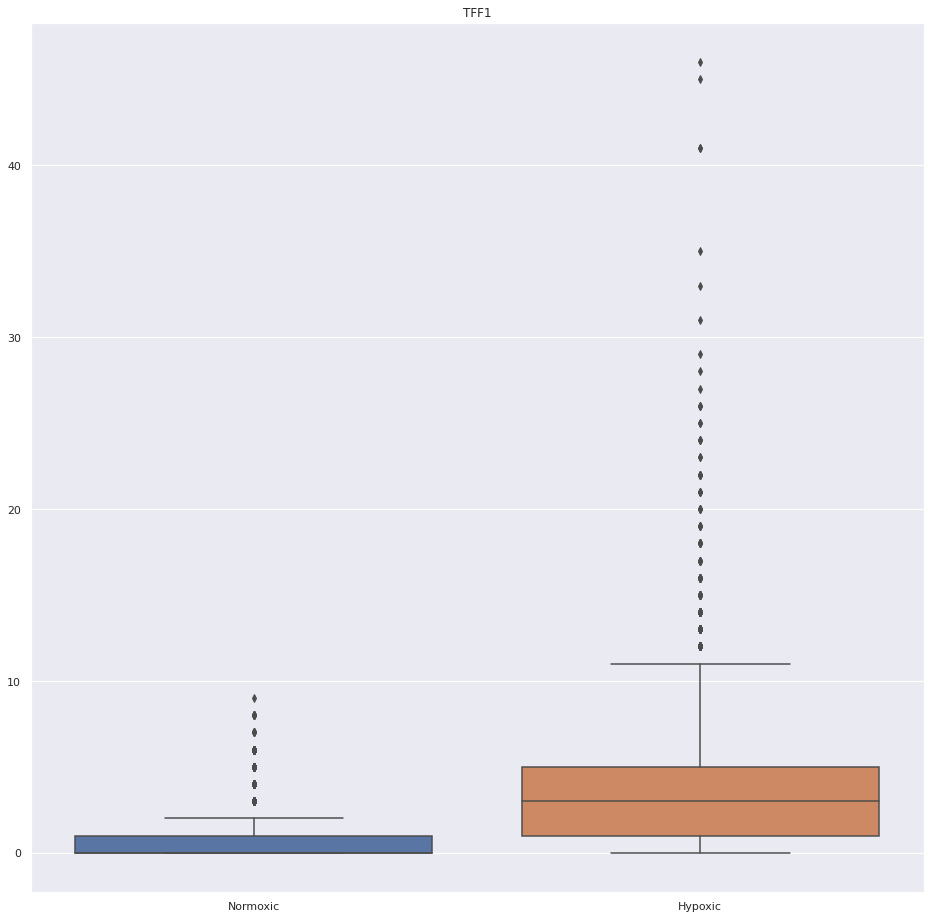

In [ ]:
plt.figure(figsize=(16,16))
sns.boxplot(data=[Gene_Norm, Gene_Hypo])
plt.xticks(ticks = [0, 1], labels=["Normoxic", "Hypoxic"])
plt.title("TFF1")
plt.show()

We can see from the plot that the gene TFF1 has very different distribution between the hypoxic and the normoxic cells. What we can definetely see is that the outliners are very different.

##### Clustering Data

To better visualize the data, we performed a PCA in 2 dimensions and then used the data for K-means clustering. In such a way, we are trying to split the data in two groups and, by using different colours for hypoxic and normoxic cells, check whether the clustering assigned them correctly.

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
def plot_data_C(X, col):
  for i in range(len(X)):
    plt.plot(X[i][0], X[i][1], 'k.', markersize=2, c=col[i])

def plot_centroids_C(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, col, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data_C(X, col)
    if show_centroids:
        plot_centroids_C(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

In [ ]:
pcaM = PCA(n_components = 2)
MCF7_drop_lowT = pcaM.fit_transform(MCF7_drop_f_n.T)
MCF7_drop_ret = pcaM.inverse_transform(MCF7_drop_lowT)
print(MCF7_drop_lowT.shape)

(21626, 2)


In [ ]:
col = []
for c in MCF7_drop_f_n.columns:
  if "Hypo" in c:
    col.append("r")
  else:
    col.append("b")
print(len(col))

21626


In [ ]:
index = MCF7_drop_f_n.T.index
MCF7_drop_hyponormo = np.zeros((len(index)), dtype = 'int64')
for i in range(len(index)):
    MCF7_drop_hyponormo[i] = not 'Hypo' in index[i] # 0 Hypo 1 Norm

fraction of correct predictions 0.45440673263664105


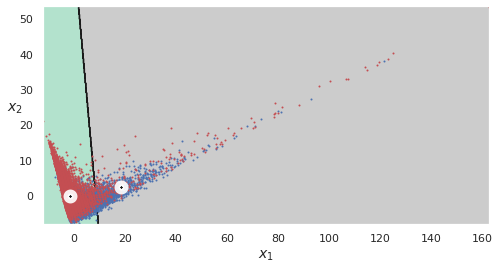

fraction of correct predictions 0.45440673263664105


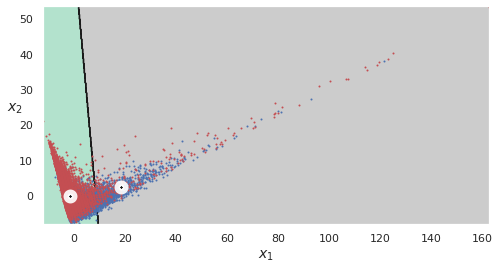

fraction of correct predictions 0.45440673263664105


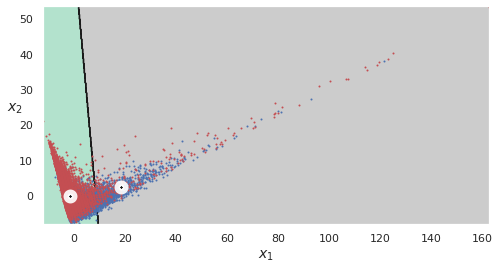

fraction of correct predictions 0.45440673263664105


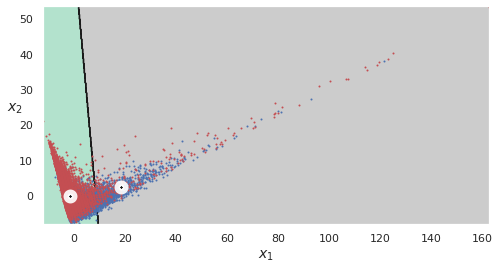

fraction of correct predictions 0.4456210117451216


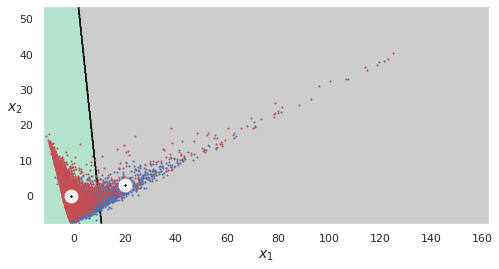

In [ ]:
from sklearn import metrics
k = 2
for i in [45, 52, 30, 37, 67]:
  kmeans = KMeans(n_clusters=k, random_state=i)
  y_pred = kmeans.fit_predict(MCF7_drop_lowT)
  mapping = {}
  for class_id in np.unique(MCF7_drop_hyponormo):
      mode, _ = stats.mode(y_pred[MCF7_drop_hyponormo==class_id]) # look at all samples with a given label and study what is the most common label given by the Gaussian mixture
      mapping[mode[0]] = class_id
  #y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])
  # print(accuracy_score(y_pred, MCF7_hyponormo))
  print("fraction of correct predictions", np.sum(y_pred==MCF7_drop_hyponormo) / len(y_pred))
  plt.figure(figsize=(8, 4))
  plot_decision_boundaries(kmeans, MCF7_drop_lowT, col)
  plt.show()

We tried to use different random states to calculate an average score of our K-means clustering. We can see that it predicts correctly only around 44% of the data in every case, this is probably due to the fact that a PCA in 2 dimention retain low variance in this particular dataset.

Let's now try clustering without applying PCA.

In [ ]:
from sklearn import metrics
k = 2
accuracy_scores = []
for i in [42, 48, 28, 37, 67]:
  kmeans = KMeans(n_clusters=k, random_state=i)
  y_pred = kmeans.fit_predict(MCF7_drop_f_n.T)
  mapping = {}
  for class_id in np.unique(MCF7_drop_hyponormo):
      mode, _ = stats.mode(y_pred[MCF7_drop_hyponormo==class_id]) # look at all samples with a given label and study what is the most common label given by the Gaussian mixture
      mapping[mode[0]] = class_id
  # y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])
  print(accuracy_score(MCF7_drop_hyponormo, y_pred))
  print("fraction of correct predictions", np.sum(y_pred==MCF7_drop_hyponormo) / len(y_pred))
  accuracy_scores.append(accuracy_score(MCF7_drop_hyponormo, y_pred))

0.5456395079996301
fraction of correct predictions 0.5456395079996301
0.5456395079996301
fraction of correct predictions 0.5456395079996301
0.5456395079996301
fraction of correct predictions 0.5456395079996301
0.5456395079996301
fraction of correct predictions 0.5456395079996301
0.5456395079996301
fraction of correct predictions 0.5456395079996301


In [ ]:
print("Average accuracy score:", sum(accuracy_scores)/len(accuracy_scores))

Average accuracy score: 0.5456395079996301


We then repeated the clustering using the dataset not processed by the PCA, obtaining a slightly higher accuracy score. Even using the whole dataset, the clustering accuracy is still pretty low.

In [ ]:
from sklearn.cluster import kmeans_plusplus

k = 2
accuracy_scores = []
for i in [85, 42, 65, 98, 200]:
  centroids, indices = kmeans_plusplus(MCF7_drop_f_n.T.to_numpy(), n_clusters = 2, random_state=i)
  kmeans = KMeans(n_clusters=k, random_state=i)
  kmeans.fit(centroids)
  y_pred = kmeans.predict(MCF7_drop_f_n.T)
  mapping = {}
  for class_id in np.unique(MCF7_drop_hyponormo):
      mode, _ = stats.mode(y_pred[MCF7_drop_hyponormo==class_id]) # look at all samples with a given label and study what is the most common label given by the Gaussian mixture
      mapping[mode[0]] = class_id
  # y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])
  print(accuracy_score(MCF7_drop_hyponormo, y_pred))
  #print("fraction of correct predictions", np.sum(y_pred==MCF7_hyponormo) / len(y_pred))
  accuracy_scores.append(accuracy_score(MCF7_drop_hyponormo, y_pred))
print("Average accuracy score:", sum(accuracy_scores)/len(accuracy_scores))

0.48552668084712847
0.7900675113289559
0.519374826597614
0.7744381762693054
0.6864422454452973
Average accuracy score: 0.6511698880976602


We finally tried to find the centroids using K-means++ and then used them to cluster the data.  We can see that the result is a little better than the previous case where we used K-means. 

### HCC1806

##### Understanding the data

In [ ]:
HCC1806_drop_f_n_describe = HCC1806_drop_f_n.describe()
HCC1806_drop_f_n_describe

"AAAAAACCCGGC_Normoxia"  "AAAACCGGATGC_Normoxia"  \
count               3000.00000              3000.000000   
mean                   0.02900                 0.041667   
std                    0.23276                 0.309778   
min                    0.00000                 0.000000   
25%                    0.00000                 0.000000   
50%                    0.00000                 0.000000   
75%                    0.00000                 0.000000   
max                    5.00000                 9.000000   

       "AAAACGAGCTAG_Normoxia"  "AAAACTTCCCCG_Normoxia"  \
count              3000.000000              3000.000000   
mean                  0.024333                 0.021667   
std                   0.231860                 0.189409   
min                   0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   0.000000                 0.000000   
max                   7.000000                 4.000000   

       "AAAAGCCTACCC_Normoxia"  "AAACACAAATCT_Normoxia"  \
count              3000.000000              3000.000000   
mean                  0.029667                 0.020000   
std                   0.323761                 0.170126   
min                   0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   0.000000                 0.000000   
max                  12.000000                 3.000000   

       "AAACCAAGCCCA_Normoxia"  "AAACCATGCACT_Normoxia"  \
count              3000.000000               3000.00000   
mean                  0.036000                  0.02600   
std                   0.250449                  0.23525   
min                   0.000000                  0.00000   
25%                   0.000000                  0.00000   
50%                   0.000000                  0.00000   
75%                   0.000000                  0.00000   
max                   4.000000                  6.00000   

       "AAACCTCCGGCT_Normoxia"  "AAACGCCGGTCC_Normoxia"  ...  \
count              3000.000000              3000.000000  ...   
mean                  0.034000                 0.029333  ...   
std                   0.231362                 0.218683  ...   
min                   0.000000                 0.000000  ...   
25%                   0.000000                 0.000000  ...   
50%                   0.000000                 0.000000  ...   
75%                   0.000000                 0.000000  ...   
max                   4.000000                 4.000000  ...   

       "TTTTCTGATGGT_Hypoxia"  "TTTTGATTCAGA_Hypoxia"  "TTTTGCAACTGA_Hypoxia"  \
count             3000.000000             3000.000000             3000.000000   
mean                 0.043000                0.049667                0.037000   
std                  0.271739                0.319219                0.279864   
min                  0.000000                0.000000                0.000000   
25%                  0.000000                0.000000                0.000000   
50%                  0.000000                0.000000                0.000000   
75%                  0.000000                0.000000                0.000000   
max                  4.000000                7.000000                7.000000   

       "TTTTGCCGGGCC_Hypoxia"  "TTTTGTTAGCCT_Hypoxia"  "TTTTTACCAATC_Hypoxia"  \
count             3000.000000             3000.000000             3000.000000   
mean                 0.047667                0.057000                0.023333   
std                  0.259648                0.304053                0.214797   
min                  0.000000                0.000000                0.000000   
25%                  0.000000                0.000000                0.000000   
50%                  0.000000                0.000000                0.000000   
75%  

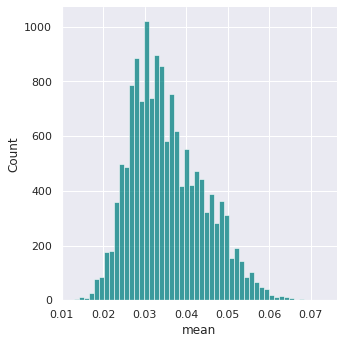

In [ ]:
sns.displot(data = HCC1806_drop_f_n_describe.iloc[1], bins=50, color="teal")
plt.show()

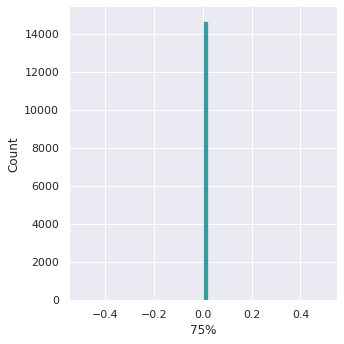

In [ ]:
sns.displot(data = HCC1806_drop_f_n_describe.iloc[6], bins=50, color="teal")
plt.show()

##### Hypo vs Norm

In [ ]:
HCC1806_drop_Hypo_f_n = HCC1806_drop_f_n.loc[:, HCC1806_drop_f_n.columns.str.contains('Hypoxia')]
HCC1806_drop_Hypo_f_n

"AAAAACGTCACT_Hypoxia"  "AAAAAGCACTTG_Hypoxia"  \
"H1-5"                          5                       0   
"MALAT1"                        0                       4   
"MT-RNR2"                       0                       0   
"ARVCF"                         0                       0   
"BCYRN1"                        0                       0   
...                           ...                     ...   
"SCCPDH"                        0                       0   
"NTAN1"                         0                       0   
"CLIP2"                         0                       0   
"DUSP23"                        0                       0   
"ZNF682"                        0                       0   

           "AAAACAGCACAG_Hypoxia"  "AAAACCTCGGGT_Hypoxia"  \
"H1-5"                          0                       0   
"MALAT1"                        0                       0   
"MT-RNR2"                       3                       1   
"ARVCF"                         0                       0   
"BCYRN1"                        0                       0   
...                           ...                     ...   
"SCCPDH"                        0                       0   
"NTAN1"                         0                       0   
"CLIP2"                         0                       0   
"DUSP23"                        0                       0   
"ZNF682"                        0                       0   

           "AAAACCTGCGCT_Hypoxia"  "AAAACGCCGACA_Hypoxia"  \
"H1-5"                          0                       0   
"MALAT1"                        1                       2   
"MT-RNR2"                       0                       3   
"ARVCF"                         0                       0   
"BCYRN1"                        0                       1   
...                           ...                     ...   
"SCCPDH"                        0                       0   
"NTAN1"                         0                       0   
"CLIP2"                         0                       0   
"DUSP23"                        0                       0   
"ZNF682"                        0                       0   

           "AAAACGTCTCGT_Hypoxia"  "AAAACGTTCGGT_Hypoxia"  \
"H1-5"                          0                       0   
"MALAT1"                        0                       2   
"MT-RNR2"                       0                       0   
"ARVCF"                         0                       0   
"BCYRN1"                        2                       0   
...                           ...                     ...   
"SCCPDH"                        0                       0   
"NTAN1"                         0                       0   
"CLIP2"                         0                       0   
"DUSP23"                        0                       0   
"ZNF682"                        0                       0   

           "AAAACTCTTGTT_Hypoxia"  "AAAAGAACTCCT_Hypoxia"  ...  \
"H1-5"                          0                       0  ...   
"MALAT1"                        0                       2  ...   
"MT-RNR2"                       0                       0  ...   
"ARVCF"                         0                       0  ...   
"BCYRN1"                        0                       0  ...   
...                           ...                     ...  ...   
"SCCPDH"                        0                       0  ...   
"NTAN1"                         0                       0  ...   
"CLIP2"                         0                       0  ...   
"DUSP23"                        0                       0  ...   
"ZNF682"                        0                       0  ...   

           "TTTTCTGATGGT_Hypoxia"  "TTTTGATTCAGA_Hypoxia"  \
"H1-5"                          0                       1   
"MALAT1"                        3                       1   
"MT-RNR2"                       1                       2   
"ARVCF"                         0         

In [ ]:
HCC1806_drop_Norm_f_n = HCC1806_drop_f_n.loc[:, HCC1806_drop_f_n.columns.str.contains('Normoxia')]
HCC1806_drop_Norm_f_n

"AAAAAACCCGGC_Normoxia"  "AAAACCGGATGC_Normoxia"  \
"H1-5"                           2                        2   
"MALAT1"                         3                        3   
"MT-RNR2"                        0                        0   
"ARVCF"                          0                        0   
"BCYRN1"                         0                        1   
...                            ...                      ...   
"SCCPDH"                         0                        0   
"NTAN1"                          0                        0   
"CLIP2"                          0                        0   
"DUSP23"                         0                        0   
"ZNF682"                         0                        0   

           "AAAACGAGCTAG_Normoxia"  "AAAACTTCCCCG_Normoxia"  \
"H1-5"                           5                        1   
"MALAT1"                         2                        3   
"MT-RNR2"                        0                        0   
"ARVCF"                          0                        0   
"BCYRN1"                         1                        0   
...                            ...                      ...   
"SCCPDH"                         0                        0   
"NTAN1"                          0                        0   
"CLIP2"                          0                        0   
"DUSP23"                         0                        0   
"ZNF682"                         0                        0   

           "AAAAGCCTACCC_Normoxia"  "AAACACAAATCT_Normoxia"  \
"H1-5"                           0                        0   
"MALAT1"                        12                        3   
"MT-RNR2"                        0                        0   
"ARVCF"                          0                        0   
"BCYRN1"                         0                        1   
...                            ...                      ...   
"SCCPDH"                         0                        0   
"NTAN1"                          0                        0   
"CLIP2"                          0                        0   
"DUSP23"                         0                        0   
"ZNF682"                         0                        0   

           "AAACCAAGCCCA_Normoxia"  "AAACCATGCACT_Normoxia"  \
"H1-5"                           0                        0   
"MALAT1"                         1                        2   
"MT-RNR2"                        0                        0   
"ARVCF"                          0                        0   
"BCYRN1"                         1                        2   
...                            ...                      ...   
"SCCPDH"                         0                        0   
"NTAN1"                          0                        0   
"CLIP2"                          0                        0   
"DUSP23"                         0                        0   
"ZNF682"                         0                        0   

           "AAACCTCCGGCT_Normoxia"  "AAACGCCGGTCC_Normoxia"  ...  \
"H1-5"                           1                        0  ...   
"MALAT1"                         0                        0  ...   
"MT-RNR2"                        0                        1  ...   
"ARVCF"                          0                        0  ...   
"BCYRN1"                         0                        3  ...   
...                            ...                      ...  ...   
"SCCPDH"                         0                        0  ...   
"NTAN1"                          0                        0  ...   
"CLIP2"                          0                        0  ...   
"DUSP23"                         0                        0  ...   
"ZNF682"                         0                        0  ...   

           "TTTGTATGCGTC_Normoxia"  "TTTGTATTTTCG_Normoxia"  \
"H1-5"                           0                        4   
"MALAT1"                         3      

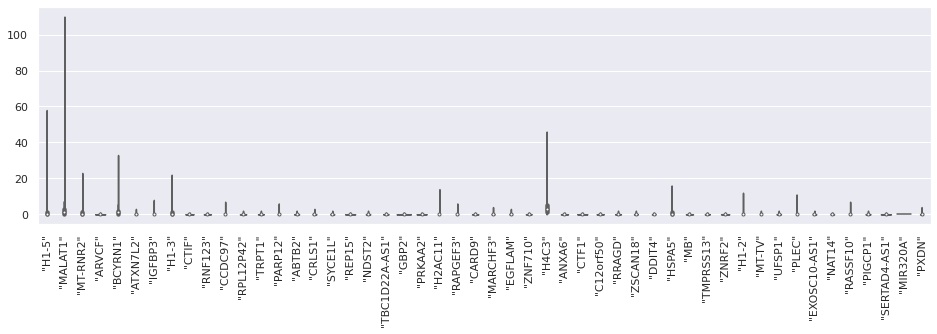

In [ ]:
df_small = HCC1806_drop_Norm_f_n.transpose().iloc[0:, :50]
plt.figure(figsize=(16,4))
plot=sns.violinplot(data=df_small,palette="Set3",cut=0)
plt.setp(plot.get_xticklabels(), rotation=90)
plt.show()

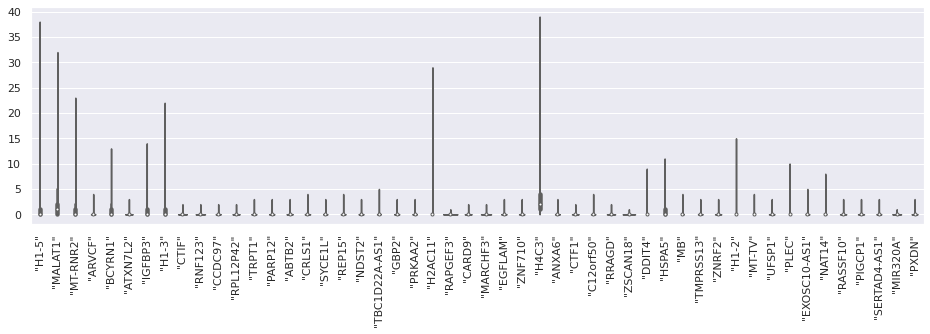

In [ ]:
df_small = HCC1806_drop_Hypo_f_n.transpose().iloc[0:, :50]
plt.figure(figsize=(16,4))
plot=sns.violinplot(data=df_small,palette="Set3",cut=0)
plt.setp(plot.get_xticklabels(), rotation=90)
plt.show()

It is quite hard to see a major difference.\
We again compute the ratio of the log_2 of the mean + 1.

In [ ]:
HCC1806_drop_Hypo_f_n_trans = HCC1806_drop_Hypo_f_n.T
HCC1806_drop_Norm_f_n_trans = HCC1806_drop_Norm_f_n.T

In [ ]:
HCC1806_drop_Hypo_f_n_trans_d = HCC1806_drop_Hypo_f_n.T.describe()
HCC1806_drop_Norm_f_n_trans_d = HCC1806_drop_Norm_f_n.T.describe()

In [ ]:
HCC1806_drop_f_n_logratio = np.log2(HCC1806_drop_Hypo_f_n_trans_d.iloc[1] + 1) - np.log2(HCC1806_drop_Norm_f_n_trans_d.iloc[1] + 1)
HCC1806_drop_f_n_logratio.sort_values(ascending=False)

"IGFBP3"      0.525908
"FGF23"       0.487667
"LDHA"        0.482526
"NDRG1"       0.444544
"GPM6A"       0.422501
                ...   
"HSP90AB1"   -0.445329
"HSPD1"      -0.471334
"HSP90AA1"   -0.505334
"AKR1C2"     -0.570131
"BCYRN1"     -0.657697
Name: mean, Length: 3000, dtype: float64

Apparently, the gene IGFBP3 is the most important in the HCC1806 dropseq dataset.

###### Check with random forest which cells have higher importance

We now try to get the most important genes with a random forest to check wheter they are the same as the ones we found before.

In [ ]:
data_test = HCC1806_drop_f_n

In [ ]:
# Let's load the packages
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
#import shap
from matplotlib import pyplot as plt

plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

In [ ]:
index = data_test.T.index
y = np.zeros((len(index)),dtype = 'int64')
for i in range(len(index)):
    y[i] = not 'Hypo' in index[i] # 0 Hypo 1 Norm

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_test.T, y, test_size= 0.1, random_state= 42)

In [ ]:
rf = RandomForestRegressor(n_estimators=10)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10)

In [ ]:
genes_importance = rf.feature_importances_

In [ ]:
genes = {}
for n, g in zip(data_test.index, genes_importance):
  genes[n] = g
print({k: v for k, v in sorted(genes.items(), key=lambda item: item[1], reverse=True)}) 

{'"NDRG1"': 0.11017108099979633, '"AKR1C2"': 0.10412354009140996, '"IGFBP3"': 0.06267123259196629, '"FGF23"': 0.05028077890515501, '"WDR43"': 0.03291294712318751, '"BCYRN1"': 0.031017949233915258, '"LDHA"': 0.02923350303600919, '"GPM6A"': 0.02215913052583788, '"HSP90AA1"': 0.01954481606682723, '"RPL41"': 0.018503503041994183, '"HSPD1"': 0.01521398925790309, '"EIF3J"': 0.013421127989964313, '"TMSB10"': 0.011685154891367018, '"AKR1C1"': 0.010570605898465497, '"NCL"': 0.01055285492010248, '"RPS28"': 0.009468107164498876, '"S100A10"': 0.007938665660892828, '"MALAT1"': 0.007638317711998487, '"ENO1"': 0.00753051878369682, '"EGLN3"': 0.006493533999303821, '"BNIP3"': 0.006487001514071113, '"NPM1P40"': 0.006086094091231668, '"KRT19"': 0.006001004129403219, '"HSP90AB1"': 0.00596361843743688, '"RPS27"': 0.005354758165214481, '"PGK1"': 0.00472678521672826, '"H4C3"': 0.004520148554145522, '"HSP90B1"': 0.004467412099537724, '"FTL"': 0.004447793628914251, '"ZC3H15"': 0.004387837743840847, '"MT-RNR2"'

Apparently, the gene that is more important in determining wether a cell is under hypoxic or normoxic condition is still the NDRG1, which wasn't in the first genes in the other analysis.

In [ ]:
# to see the less important ones.
print({k: v for k, v in sorted(genes.items(), key=lambda item: item[1], reverse=False)}) 

{'"CTIF"': 0.0, '"RNF123"': 0.0, '"CCDC97"': 0.0, '"RPL12P42"': 0.0, '"TRPT1"': 0.0, '"PARP12"': 0.0, '"ABTB2"': 0.0, '"REP15"': 0.0, '"NDST2"': 0.0, '"GBP2"': 0.0, '"MARCHF3"': 0.0, '"EGFLAM"': 0.0, '"ANXA6"': 0.0, '"C12orf50"': 0.0, '"RRAGD"': 0.0, '"ZSCAN18"': 0.0, '"MB"': 0.0, '"ZNRF2"': 0.0, '"UFSP1"': 0.0, '"EXOSC10-AS1"': 0.0, '"PIGCP1"': 0.0, '"SERTAD4-AS1"': 0.0, '"PXDN"': 0.0, '"AQP11"': 0.0, '"LBHD2"': 0.0, '"MS4A10"': 0.0, '"LINC01615"': 0.0, '"KLHL22"': 0.0, '"GAS7"': 0.0, '"ADAP1"': 0.0, '"RFTN1"': 0.0, '"ZNF837"': 0.0, '"MFAP3L"': 0.0, '"SERPINF1"': 0.0, '"MAP3K9-DT"': 0.0, '"LRFN4"': 0.0, '"MOSPD3"': 0.0, '"HLA-G"': 0.0, '"ECHDC3"': 0.0, '"LY6G6C"': 0.0, '"LGR6"': 0.0, '"RSPH1"': 0.0, '"JPH3"': 0.0, '"E4F1"': 0.0, '"PPIEL"': 0.0, '"ZSCAN9"': 0.0, '"TTLL1"': 0.0, '"TMEM182"': 0.0, '"IRF2-DT"': 0.0, '"MAP7D2"': 0.0, '"ARMCX6"': 0.0, '"MYPOP"': 0.0, '"RAB11B-AS1"': 0.0, '"PFKFB4"': 0.0, '"SLAMF9"': 0.0, '"BEX5"': 0.0, '"TMEM143"': 0.0, '"ZNF416"': 0.0, '"B4GALNT2"': 0.0, '

To see the differences in distribution of the gene, we plot some boxplots.

In [ ]:
Gene_Hypo = HCC1806_drop_Hypo_f_n_trans['"NDRG1"']
Gene_Hypo

"AAAAACGTCACT_Hypoxia"    1
"AAAAAGCACTTG_Hypoxia"    0
"AAAACAGCACAG_Hypoxia"    0
"AAAACCTCGGGT_Hypoxia"    0
"AAAACCTGCGCT_Hypoxia"    0
                         ..
"TTTTTACCAATC_Hypoxia"    0
"TTTTTCCGTGCA_Hypoxia"    0
"TTTTTGCCTGGG_Hypoxia"    0
"TTTTTGTAACAG_Hypoxia"    0
"TTTTTTTGAATC_Hypoxia"    0
Name: "NDRG1", Length: 8899, dtype: int64

In [ ]:
Gene_Norm = HCC1806_drop_Norm_f_n_trans['"NDRG1"']
Gene_Norm

"AAAAAACCCGGC_Normoxia"    0
"AAAACCGGATGC_Normoxia"    0
"AAAACGAGCTAG_Normoxia"    0
"AAAACTTCCCCG_Normoxia"    0
"AAAAGCCTACCC_Normoxia"    0
                          ..
"TTTTATACGAGA_Normoxia"    0
"TTTTCTTCCGAC_Normoxia"    0
"TTTTGGCGGTCA_Normoxia"    0
"TTTTGTAAGGGA_Normoxia"    0
"TTTTGTCGGGCA_Normoxia"    0
Name: "NDRG1", Length: 5783, dtype: int64

In [ ]:
Gene_Hypo.describe()

count    8899.000000
mean        0.377121
std         0.734806
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         9.000000
Name: "NDRG1", dtype: float64

In [ ]:
Gene_Norm.describe()

count    5783.000000
mean        0.011932
std         0.126262
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         3.000000
Name: "NDRG1", dtype: float64

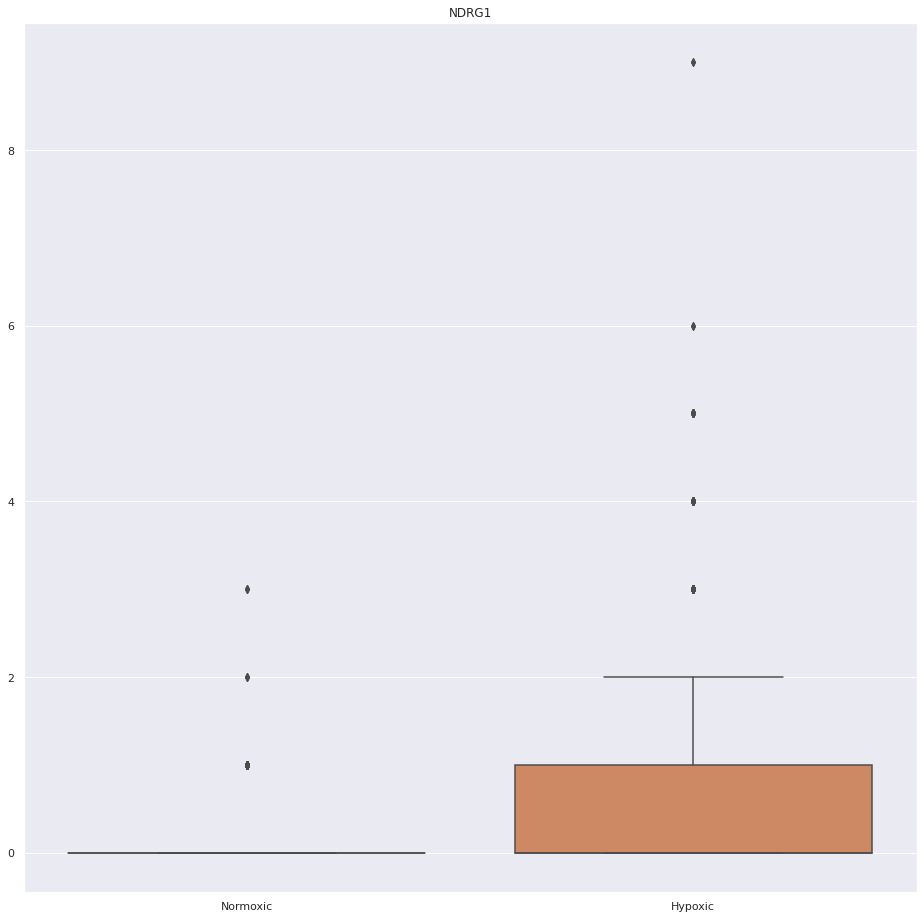

In [ ]:
plt.figure(figsize=(16,16))
sns.boxplot(data=[Gene_Norm, Gene_Hypo])
plt.xticks(ticks = [0, 1], labels=["Normoxic", "Hypoxic"])
plt.title("NDRG1")
plt.show()

We can see from the plot that the gene NDRG1 has very different distribution between the hypoxic and the normoxic cells. What we can definetely see is that the outliners are very different.

Let's now plot the one we got from the first analysis.

In [ ]:
Gene_Hypo = HCC1806_drop_Hypo_f_n_trans['"IGFBP3"']
Gene_Hypo

"AAAAACGTCACT_Hypoxia"    0
"AAAAAGCACTTG_Hypoxia"    0
"AAAACAGCACAG_Hypoxia"    0
"AAAACCTCGGGT_Hypoxia"    1
"AAAACCTGCGCT_Hypoxia"    1
                         ..
"TTTTTACCAATC_Hypoxia"    0
"TTTTTCCGTGCA_Hypoxia"    0
"TTTTTGCCTGGG_Hypoxia"    0
"TTTTTGTAACAG_Hypoxia"    1
"TTTTTTTGAATC_Hypoxia"    1
Name: "IGFBP3", Length: 8899, dtype: int64

In [ ]:
Gene_Norm = HCC1806_drop_Norm_f_n_trans['"IGFBP3"']
Gene_Norm

"AAAAAACCCGGC_Normoxia"    0
"AAAACCGGATGC_Normoxia"    0
"AAAACGAGCTAG_Normoxia"    1
"AAAACTTCCCCG_Normoxia"    0
"AAAAGCCTACCC_Normoxia"    0
                          ..
"TTTTATACGAGA_Normoxia"    0
"TTTTCTTCCGAC_Normoxia"    0
"TTTTGGCGGTCA_Normoxia"    0
"TTTTGTAAGGGA_Normoxia"    0
"TTTTGTCGGGCA_Normoxia"    0
Name: "IGFBP3", Length: 5783, dtype: int64

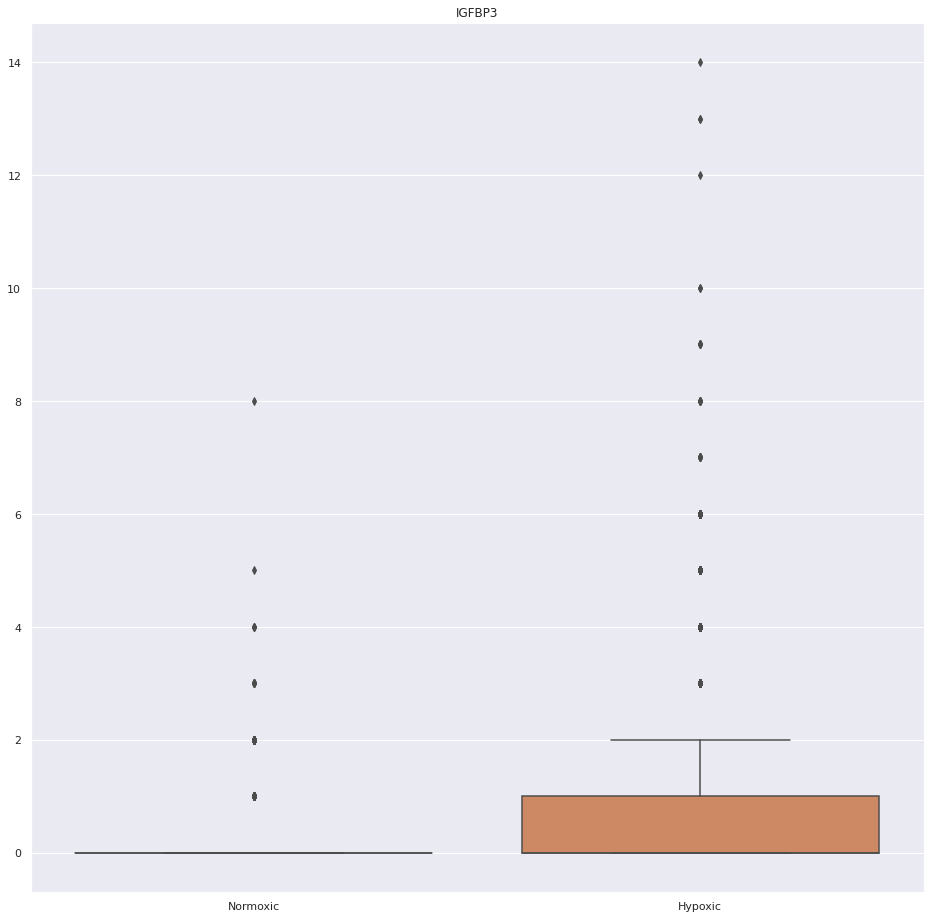

In [ ]:
plt.figure(figsize=(16,16))

sns.boxplot(data=[Gene_Norm, Gene_Hypo])
plt.xticks(ticks = [0, 1], labels=["Normoxic", "Hypoxic"])
plt.title("IGFBP3")
plt.show()

We can see that the distribution is very different.

##### Clustering Data

To better visualize the data, we performed a PCA in 2 dimensions and then used the data for K-means clustering. In such a way, we are trying to split the data in two groups and, by using different colours for hypoxic and normoxic cells, check whether the clustering assigned them correctly.

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
def plot_data_C(X, col):
  for i in range(len(X)):
    plt.plot(X[i][0], X[i][1], 'k.', markersize=2, c=col[i])

def plot_centroids_C(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, col, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data_C(X, col)
    if show_centroids:
        plot_centroids_C(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

In [ ]:
pcaM = PCA(n_components = 2)
HCC1806_drop_lowT = pcaM.fit_transform(HCC1806_drop_f_n.T)
HCC1806_drop_ret = pcaM.inverse_transform(HCC1806_drop_lowT)
print(HCC1806_drop_lowT.shape)

(14682, 2)


In [ ]:
col = []
for c in HCC1806_drop_f_n.columns:
  if "Hypo" in c:
    col.append("r")
  else:
    col.append("b")
print(len(col))

14682


In [ ]:
index = HCC1806_drop_f_n.T.index
HCC1806_drop_hyponormo = np.zeros((len(index)), dtype = 'int64')
for i in range(len(index)):
    HCC1806_drop_hyponormo[i] = not 'Hypo' in index[i] # 0 Hypo 1 Norm

fraction of correct predictions 0.5766925486990874


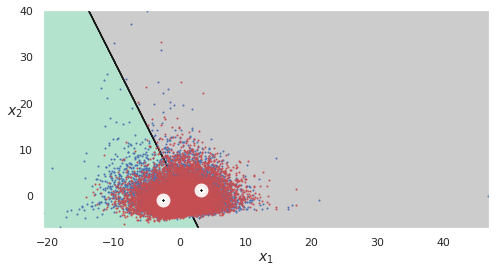

fraction of correct predictions 0.5763519956409209


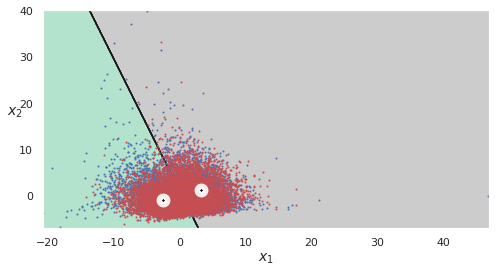

fraction of correct predictions 0.5764882168641874


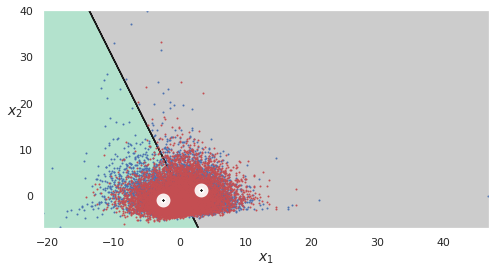

fraction of correct predictions 0.576624438087454


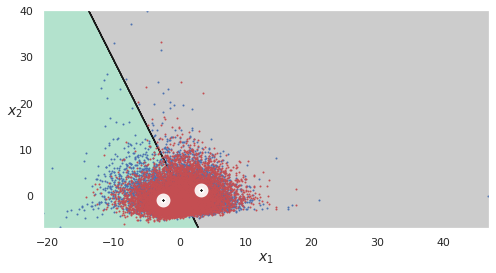

fraction of correct predictions 0.5779185397084866


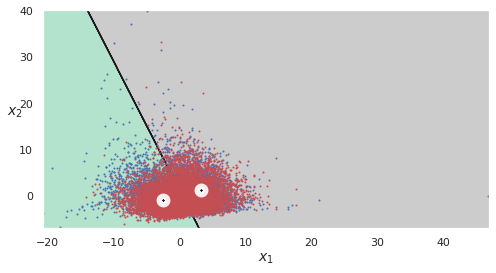

In [ ]:
from sklearn import metrics
k = 2
for i in [42, 52, 46, 37, 75]:
  kmeans = KMeans(n_clusters=k, random_state=i)
  y_pred = kmeans.fit_predict(HCC1806_drop_lowT)
  mapping = {}
  for class_id in np.unique(HCC1806_drop_hyponormo):
      mode, _ = stats.mode(y_pred[HCC1806_drop_hyponormo==class_id]) # look at all samples with a given label and study what is the most common label given by the Gaussian mixture
      mapping[mode[0]] = class_id
  y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])
  # print(accuracy_score(y_pred, MCF7_hyponormo))
  print("fraction of correct predictions", np.sum(y_pred==HCC1806_drop_hyponormo) / len(y_pred))
  plt.figure(figsize=(8, 4))
  plot_decision_boundaries(kmeans, HCC1806_drop_lowT, col)
  plt.show()

We tried to use different random states to calculate an average score of our K-means clustering. We can see that it predicts correctly only around 57% of the data in every case, this is probably due to the fact that a PCA in 2 dimention retain low variance in this particular dataset.

Let's now try clustering without applying PCA.

In [ ]:
from sklearn import metrics
k = 2
accuracy_scores = []
for i in [42, 52, 28, 37, 67]:
  kmeans = KMeans(n_clusters=k, random_state=i)
  y_pred = kmeans.fit_predict(HCC1806_drop_f_n.T)
  mapping = {}
  for class_id in np.unique(HCC1806_drop_hyponormo):
      mode, _ = stats.mode(y_pred[HCC1806_drop_hyponormo==class_id]) # look at all samples with a given label and study what is the most common label given by the Gaussian mixture
      mapping[mode[0]] = class_id
  y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])
  print(accuracy_score(HCC1806_drop_hyponormo, y_pred))
  print("fraction of correct predictions", np.sum(y_pred==HCC1806_drop_hyponormo) / len(y_pred))
  accuracy_scores.append(accuracy_score(HCC1806_drop_hyponormo, y_pred))

0.5875221359487808
fraction of correct predictions 0.5875221359487808
0.5872496935022476
fraction of correct predictions 0.5872496935022476
0.5875221359487808
fraction of correct predictions 0.5875221359487808
0.5875221359487808
fraction of correct predictions 0.5875221359487808
0.5870453616673478
fraction of correct predictions 0.5870453616673478


In [ ]:
print("Average accuracy score:", sum(accuracy_scores)/len(accuracy_scores))

Average accuracy score: 0.5873722926031876


We then repeated the clustering using the dataset not processed by the PCA, obtaining a slightly higher accuracy score. Even using the whole dataset, the clustering accuracy is still pretty low.

In [ ]:
from sklearn.cluster import kmeans_plusplus


k = 2
accuracy_scores = []
for i in [24, 176, 65, 98, 200]:
  centroids, indices = kmeans_plusplus(HCC1806_drop_f_n.T.to_numpy(), n_clusters = 2, random_state=i)
  kmeans = KMeans(n_clusters=k, random_state=i)
  kmeans.fit(centroids)
  y_pred = kmeans.predict(HCC1806_drop_f_n.T)
  mapping = {}
  for class_id in np.unique(HCC1806_drop_hyponormo):
      mode, _ = stats.mode(y_pred[HCC1806_drop_hyponormo==class_id]) # look at all samples with a given label and study what is the most common label given by the Gaussian mixture
      mapping[mode[0]] = class_id
  # y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])
  print(accuracy_score(HCC1806_drop_hyponormo, y_pred))
  #print("fraction of correct predictions", np.sum(y_pred==MCF7_hyponormo) / len(y_pred))
  accuracy_scores.append(accuracy_score(HCC1806_drop_hyponormo, y_pred))
print("Average accuracy score:", sum(accuracy_scores)/len(accuracy_scores))

0.564977523498161
0.6004631521591064
0.5970576215774418
0.3945647731916633
0.4794305952867457
Average accuracy score: 0.5272987331426237


We finally tried to find the centroids using K-means++ and then used them to cluster the data.  We can see that the result is worse than the previous case where we used K-means. 

## In conclusion

To sum up, we have observed eight different datasets, four of MCF7 and four of HCC1806. Both the unfiltered data in SmartSeq were highly sparse (over 50% of zeros), and had a few duplicated rows but no null row.\
In addition, by looking at the gene expression, we observed that most of the data is contained in the outliers, and in each cell, a few genes are highly expressed.\
Both of the data sets are not normalized and overall the skewness is high for most of the cells (and never close to 0). Transformations such as PowerTransformer and QuantileTransformer didn’t work well, however applying the log_2 to the data translated by 1 reduced drastically the skewness for both cell lines.\
Then, by looking at the filtered and normalized data and by comparing gene expression between hypoxic and normoxic cells, we found that there are some genes that are particularly highly expressed in one of the two types, hence more “characteristic”. We confirmed it using random forests and then checked the accuracy of the classifications using K-means clustering. Overall, for MCF7, the differences between gene expression in normoxic and hypoxic cells were more evident, but both cell lines had similar characteristics. For HCC1806, the gene CA9 appeared to be the most important one using the log ratio method, whereas using random forests emerged PGK1. For MCF7 we obtained CYP1A1 with the log ratio and NDRG1 with the random forest. We concluded that outliers have less weight in determining hypoxic/normoxic compared to MCF7.\
Analysing the filtered and normalised data in DropSeq, we noticed that the mean of genes expressed is much lower. For  MCF7, the most important gene seemed TFF1 both using the log ratio and the random forest methods. For HCC1806, IGFBP3 was the most important using the log-ratio and NDRG1 using the random forest.

We could also see how the clustering worked much better in the MCF7 SmartSeq dataset than any other. 

# PCA & CLUSTERING



In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

From now on, we will use only the filtered and normalized datasets for our analysis. Starting with a PCA which maintains 95% of the variance explained, in the Smart-seq datesets, we obtain that MCF7 can be expressed by using only 20 directions while HCC1806 is expressed by using 34 directions.\
Regarding instead the Drop-seq experiment, we do not obtain very nice results, in fact, we need 162 directions for the MCF7 dataset in order to retain the 95% of the variance and 844 directions for the HCC1806. A confirmation of this comes from the fact that printing the explained variance ratio it can be seen that the variance explained is very low for the first directions.

In [ ]:
pcaM = PCA(n_components = 0.95)
MCF7_low = pcaM.fit_transform(MCF7_f_n.T)
MCF7_ret = pcaM.inverse_transform(MCF7_low)
pcaH = PCA(n_components = 0.95)
HCC1806_low= pcaH.fit_transform(HCC1806_f_n.T)
print(MCF7_low.shape, HCC1806_low.shape)

(250, 20) (182, 34)


In [ ]:
pcaMD = PCA(n_components= 0.95)
MCF7_lowd = pcaMD.fit_transform(MCF7_drop_f_n.T)
MCF7_lowd.shape

(21626, 761)

In [ ]:
pcaHD = PCA(n_components= 0.95)
HCC1806_f_n_drop_lowd = pcaHD.fit_transform(HCC1806_drop_f_n.T)
HCC1806_f_n_drop_lowd.shape

(14682, 844)

In [ ]:
# Chiedere Dropseq --- Dropseq è un dataset molto corrotto 

pcaHD.explained_variance_ratio_

array([8.42324280e-02, 6.31606719e-02, 3.88313939e-02, 2.86625432e-02,
       2.37918611e-02, 2.15674691e-02, 1.67483247e-02, 1.48044703e-02,
       1.43919415e-02, 1.25207503e-02, 1.15350858e-02, 1.14281083e-02,
       9.88305907e-03, 9.50755387e-03, 9.21652544e-03, 8.59572942e-03,
       8.06758779e-03, 7.51640737e-03, 7.28384250e-03, 7.18463401e-03,
       6.83072434e-03, 6.31045086e-03, 6.20457846e-03, 5.82192410e-03,
       5.70198427e-03, 5.61458438e-03, 5.56278485e-03, 5.47274062e-03,
       5.40164381e-03, 5.26731478e-03, 5.15247523e-03, 5.05828474e-03,
       4.89218322e-03, 4.80799238e-03, 4.64190243e-03, 4.48433305e-03,
       4.34550137e-03, 4.28534754e-03, 4.20440217e-03, 4.13014216e-03,
       4.08767041e-03, 3.98559741e-03, 3.96802982e-03, 3.85912962e-03,
       3.78022562e-03, 3.76009057e-03, 3.71756536e-03, 3.70153449e-03,
       3.65176143e-03, 3.63078875e-03, 3.60673066e-03, 3.53271433e-03,
       3.49510187e-03, 3.46628428e-03, 3.43581161e-03, 3.40106285e-03,
      

To facilitate the following analysis we create an np.array that stores a binary value for each cell of the dataset: 0 if the cell is Hypo and 1 if it is Norm.

In [ ]:
# MCF7 SmartSeq

index = MCF7_f_n.T.index
MCF7_hyponormo = np.zeros((len(index)), dtype = 'int64')
for i in range(len(index)):
    MCF7_hyponormo[i] = not 'Hypo' in index[i] # 0 Hypo 1 Norm

In [ ]:
# HCC SmartSeq

index = HCC1806_f_n.T.index
HCC1806_hyponormo = np.zeros((len(index)), dtype = 'int64')
for i in range(len(index)):
    HCC1806_hyponormo[i] = not 'Hypo' in index[i] # 0 Hypo 1 Norm

In [ ]:
# MCF7 DropSeq

index = MCF7_drop_f_n.T.index
MCF7_hyponorm = np.zeros((len(index)), dtype = 'int64')
for i in range(len(index)):
    MCF7_hyponorm[i] = not 'Hypo' in index[i] # 0 Hypo 1 Norm
print(MCF7_hyponorm.size)

21626


In [ ]:
# HCC DropSeq

index = HCC1806_drop_f_n.T.index
HCC1806_hyponorm = np.zeros((len(index)), dtype = 'int64')
for i in range(len(index)):
    HCC1806_hyponorm[i] = not 'Hypo' in index[i] # 0 Hypo 1 Norm

### PCA

In [ ]:
cumsum = np.cumsum(pcaM.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
d

20

Now, we plot the explained variance ratio for the MCF7 dataset (Smartseq) and it emerges quite evidently that using the first twenty directions the explained variance ratio is almost saturated.

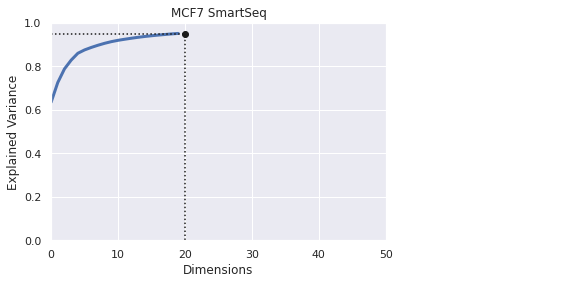

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 50, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.title("MCF7 SmartSeq")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)
# save_fig("explained_variance_plot")
plt.show()

HCC1806 SQ

In [ ]:
cumsum = np.cumsum(pcaH.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
d

34

Now, we plot the explained variance ratio for the HCC1806 dataset (Smartseq) and it emerges quite evidently that using the first twenty directions the explained variance ratio is almost saturated.

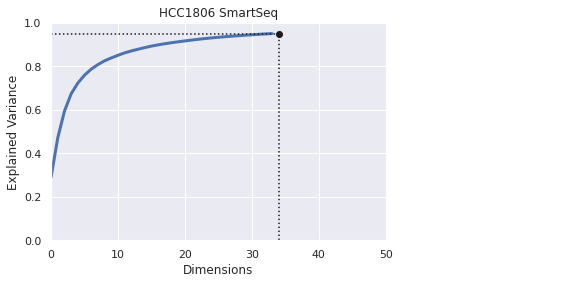

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 50, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.title("HCC1806 SmartSeq")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)
# save_fig("explained_variance_plot")
plt.show()

MCF7 DQ

In [ ]:
cumsum = np.cumsum(pcaMD.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
d

761

Now, we plot the explained variance ratio for the MCF7 dataset (DropSeq) and it emerges quite evidently that using the first twenty directions the explained variance ratio is almost saturated.

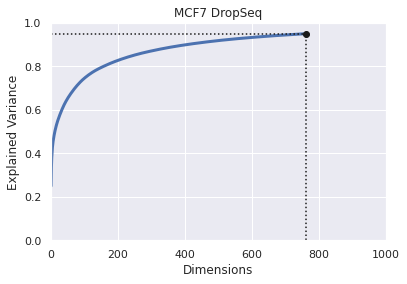

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 1000, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.title("MCF7 DropSeq")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
# plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7), arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)
# save_fig("explained_variance_plot")
plt.show()

HCC1806 DQ

In [ ]:
cumsum = np.cumsum(pcaHD.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
d

844

Now, we plot the explained variance ratio for the HCC1806 dataset (DropSeq) and it emerges quite evidently that using the first twenty directions the explained variance ratio is almost saturated.

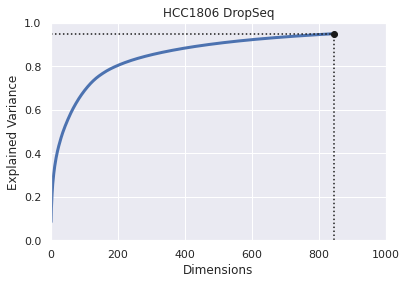

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 1000, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.title("HCC1806 DropSeq")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
# plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7), arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)
# save_fig("explained_variance_plot")
plt.show()

### Plotting in 3 dimensions

Plotting the PCA results using the first three dimensions, for the SmartSeq experiment we can actually start to see that hypoxia and normoxia cells could be clustered, with the exception of some outliers. On the contrary, this is less evident with the plotting of the DropSeq experiment.

In [ ]:
MCF7_colors = []
for c in MCF7_hyponormo:
  if c == 1:
    MCF7_colors.append("r")
  else:
    MCF7_colors.append("b")
print(len(MCF7_colors))

250


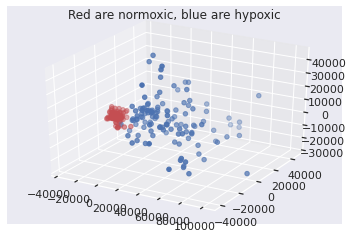

In [ ]:
# MCF7_low SmartSeq

ax = plt.axes(projection='3d')
ax.scatter3D(MCF7_low[:, 0], MCF7_low[:, 1], MCF7_low[:, 2], c=MCF7_colors)

plt.title("Red are normoxic, blue are hypoxic")
plt.show()

In [ ]:
HCC1806_colors = []
for c in HCC1806_hyponormo:
  if c == 1:
    HCC1806_colors.append("r")
  else:
    HCC1806_colors.append("b")
print(len(HCC1806_colors))

182


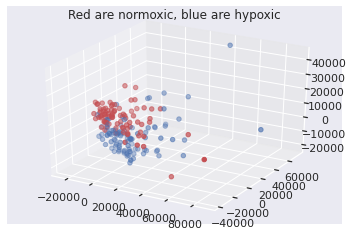

In [ ]:
# HCC1806_low SmartSeq
%matplotlib inline

ax = plt.axes(projection='3d')
ax.scatter3D(HCC1806_low[:, 0], HCC1806_low[:, 1], HCC1806_low[:, 2], c=HCC1806_colors)
plt.title("Red are normoxic, blue are hypoxic")
plt.show()

In [ ]:
MCF7d_colors = []
for c in MCF7_hyponorm:
  if c == 1:
    MCF7d_colors.append("r")
  else:
    MCF7d_colors.append("b")
print(len(MCF7d_colors))

21626


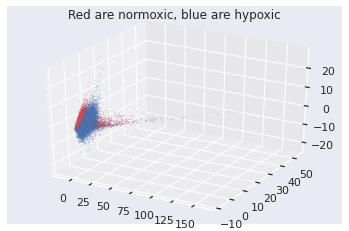

In [ ]:
# MCF7_lowd (Dropseq)
%matplotlib inline

ax = plt.axes(projection='3d')
ax.scatter3D(MCF7_lowd[:, 0], MCF7_lowd[:, 1], MCF7_lowd[:, 2], c=MCF7d_colors, s=0.5, edgecolor=(0,0,0,0))

#ax.view_init(120, 120)

plt.title("Red are normoxic, blue are hypoxic")
plt.show()

In [ ]:
HCC1806d_colors = []
for c in HCC1806_hyponorm:
  if c == 1:
    HCC1806d_colors.append("r")
  else:
    HCC1806d_colors.append("b")
print(len(HCC1806d_colors))

14682


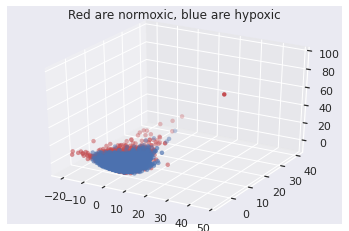

In [ ]:
# HCC1806_f_n_drop_lowd (DropSeq)

ax = plt.axes(projection='3d')
ax.scatter3D(HCC1806_f_n_drop_lowd[:, 0], HCC1806_f_n_drop_lowd[:, 1], HCC1806_f_n_drop_lowd[:, 2], c=HCC1806d_colors, edgecolors=(0,0,0,0))
plt.title("Red are normoxic, blue are hypoxic")
plt.show()

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
k = 2
kmeans = KMeans(n_clusters=4, random_state=42)
y_pred = kmeans.fit_predict(MCF7_f_n.T)
#np.argwhere(y_pred != 0)

#GAUSSIAN MIXTURE


We decided to perform Gaussian Model Mixture, in order to see if an unsupervised learning model, based on the probability of different gaussian distribution, (in this case 2),  would have found indipendently the two clusters we are dealing with: normoxia and hypoxia state of cells. 

### MCF7 on 3D datas

In [ ]:
MCF7_3D = np.array([MCF7_low[:, 0], MCF7_low[:, 1], MCF7_low[:, 2]])

In [ ]:
gm = GaussianMixture(n_components=2, random_state=42).fit(MCF7_3D.T)
y_pred = gm.predict(MCF7_3D.T)
y_pred

array([0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1])

In [ ]:
mapping = {}
for class_id in np.unique(MCF7_hyponormo):
    mode, _ = stats.mode(y_pred[MCF7_hyponormo==class_id]) # look at all samples with a given label and study what is the most common label given by the Gaussian mixture
    print(stats.mode(y_pred[MCF7_hyponormo ==class_id]))
    mapping[mode[0]] = class_id
mapping

ModeResult(mode=array([1]), count=array([124]))
ModeResult(mode=array([0]), count=array([121]))


{0: 1, 1: 0}

In [ ]:
y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])
y_pred

array([1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0])

In [ ]:
print("correct predictions: ", np.sum(y_pred==MCF7_hyponormo))
print("fraction of correct predictions", np.sum(y_pred==MCF7_hyponormo) / len(y_pred))

array_errors = []
for i, j, k in zip( y_pred, MCF7_hyponormo, range(len(y_pred))):
    if i!=j:
        array_errors.append(MCF7_3D[:,k])
len(array_errors)      

correct predictions:  245
fraction of correct predictions 0.98


5

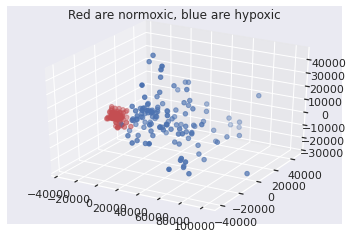

<Figure size 3600x3600 with 0 Axes>

In [ ]:
ax = plt.axes(projection='3d')
plt.figure(figsize=(50,50))
ax.scatter3D(MCF7_3D[0], MCF7_3D[1], MCF7_3D[2], c=MCF7_colors) 
ax.scatter3D(array_errors[0], array_errors[1],  c= "r")
ax.set_title("Red are normoxic, blue are hypoxic")
plt.show()

For the only purpose to have a nice plot, we applied GMM on the dataset constituted by the first 3 dimensions of PCA ran on the MCF7 f normalized and smartseq.
(Notice that, we did so since we previously commented and observed that in this case the first 3 dimensions explain a lot of the variance). 

For the sake of clarity and better understanding on  the problem, by looking at the graph we can see that the two states are enoughly divided in two gaussian bubbles, of course relative to the translation in this subspace we performed. 

We highlighted in red the missclassified cells, later on in the classificator we will take them in special consideration, to double check if our classificator will perform better than this GMM distinction.



As we can see GMM perform a distinction betweeen normoxia and hypoxia pretty accurate: 98% of the predictions are correct and only 5 cells in total are misclassified. 
This could be due to numerical problems of GMM or either by lab problems. In fact we should keep in mind that while performing the sequentiation some cells could change state (from normoxia to hypoxia) based on environment state (i. e. cells put at the margin during the sequentiation.

### MCF7 on whole dataset

In [ ]:
gm_whole = GaussianMixture(n_components=2, random_state=42, reg_covar=1e-5).fit(MCF7_f_n.T)
y_pred = gm_whole.predict(MCF7_f_n.T)
y_pred.shape

(250,)

In [ ]:
from scipy import stats

mapping = {}
for class_id in np.unique(MCF7_hyponormo):
    mode, _ = stats.mode(y_pred[MCF7_hyponormo==class_id]) # look at all samples with a given label and study what is the most common label given by the Gaussian mixture
    print(stats.mode(y_pred[MCF7_hyponormo ==class_id]))
    mapping[mode[0]] = class_id
mapping

ModeResult(mode=array([1]), count=array([116]))
ModeResult(mode=array([0]), count=array([126]))


{0: 1, 1: 0}

In [ ]:
y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])
y_pred

array([1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0])

In [ ]:
print("correct predictions: ", np.sum(y_pred==MCF7_hyponormo))
print("fraction of correct predictions", np.sum(y_pred==MCF7_hyponormo) / len(y_pred))
array_errors = []
arg_where_errors = []
for i, j, k in zip( y_pred, MCF7_hyponormo, range(len(y_pred))):
    if i!=j:
        array_errors.append(MCF7_f_n.iloc[:,k])
        arg_where_errors.append(k)
print(arg_where_errors)

position_all_errors ={}
position_all_errors["MCF7_f_n"] = arg_where_errors

correct predictions:  242
fraction of correct predictions 0.968
[26, 38, 81, 118, 127, 134, 146, 193]


Now performing GMM on the whole dataset (taking in consideration all 3000 features) we still obtain quite good results. 

In this case the plot is not available, but as before we keep track of the missclassified cells to check their outcome in the classification we will build. 

By checking the behaviour of the classifier we will be able to deduce if the missclassification was due to the GMM method or to a "lab problem" as explained before.

### HCC1806: on whole data set 

In the case of the cell line HCC1806 sequentiated trought Smart Seq technique, we will not perform GMM on the 3D data sets, because the as we already commented the PCA's first 3 dimensions didn't explained much of the variance. 
So in order to avoid errors due to the lack of informations given by these 3 dimensions, we will skip this part and we will proceed without a graphical insight of the problem 

In [ ]:
gm = GaussianMixture(n_components=2, random_state=42).fit(HCC1806_f_n.T)
y_pred = gm.predict(HCC1806_f_n.T)
y_pred.shape

(182,)

In [ ]:
mapping = {}
for class_id in np.unique(HCC1806_hyponormo):
    mode, _ = stats.mode(y_pred[HCC1806_hyponormo==class_id]) # look at all samples with a given label and study what is the most common label given by the Gaussian mixture
    print(stats.mode(y_pred[HCC1806_hyponormo ==class_id]))
    mapping[mode[0]] = class_id
mapping


ModeResult(mode=array([1]), count=array([87]))
ModeResult(mode=array([0]), count=array([83]))


{0: 1, 1: 0}

In [ ]:
y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])
y_pred

array([1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1])

In [ ]:
print("correct predictions: ", np.sum(y_pred==HCC1806_hyponormo))
print("fraction of correct predictions", np.sum(y_pred==HCC1806_hyponormo) / len(y_pred))
array_errors = []
argwhere_errors = []
for i, j, k in zip( y_pred, HCC1806_hyponormo, range(len(y_pred))):
    if i!=j:
        array_errors.append(HCC1806_f_n.iloc[:,k])
        argwhere_errors.append(k)
print(argwhere_errors) 
position_all_errors["HCC1806"] = argwhere_errors 

correct predictions:  170
fraction of correct predictions 0.9340659340659341
[3, 9, 11, 22, 30, 57, 94, 98, 113, 137, 141, 143]


In this case we can see that GMM performed slightly worse than in the previous case, predicting only 93% of correct results. 

Again, we will keep track of the errors and, for the same reasons explained before we will check them in the classifier.

***comments on the GMM on dropseq***

We tried to apply this unsupervised classification method, based on the gaussian probability distribution also on the set cell lines sequentiated with the technique dropseq.



# PREDICTIONS

**Aim:** We are willing to predict whether a cell is in the ‘hypoxia’ or ‘normoxia’ condition based on the specific expressed genes by a given cell line.

Encoding:  In our setting, we will refer to the conditions as ‘0’ for hypoxia and ‘1’ for normoxia.

## Introduction

As the overarching theme of our draft for a classifier, we have always stored 10% of the data points away from the training set. In this manner, we will remove any further bias from the analysis during the actual testing procedure.

## SmartSeq

Having successfully carried the Exploratory Data Analysis (EDA) part, we have gained relevant insights on the dataset which can be used for the classification part. Under this assumption, an initial idea was to implement a Decision Forest so that we could rank the genes available according to the ‘information gain’ criteria. Indeed, using ‘entropy’ as a criterion for the splitting and pruning in the algorithm we could yield a high cross-validation score.

Nonetheless, our final take was to cross-check our assumptions by running other classifiers and, instead of coming down to a final choice, undertake a hard-voting system which could choose the most suitable one. Among the choices available, we have run a Support Vector Machine – using a radial kernel for a greater granular classification and a 50% maximum margin of error – as well as a Logistic Regression. In the latter, a L1 penalty term regularizer yielded the most accurate results yet, given that each competing model made (few) errors on different cells, we were convinced by hard-voting as the best course of action.	

### Importing the relevant datasets

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import KMeans , AgglomerativeClustering 
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import NuSVC
from sklearn.linear_model import LogisticRegression

Reading the files:

In [ ]:
# HCC1806_f_n =pd.read_csv('HCC1806_SmartS_Filtered_Normalised_3000_Data_train.txt',delimiter='\ ',engine='python',index_col=0)
# MCF7_f_n = pd.read_csv('MCF7_SmartS_Filtered_Normalised_3000_Data_train.txt',delimiter='\ ',engine='python',index_col=0)

Marking hypoxia as (0) or normoxia as (1) as usual:

In [ ]:
index = MCF7_f_n.T.index
MCF7_hyponormo = np.zeros((len(index)),dtype = 'int64')
for i in range(len(index)):
    MCF7_hyponormo[i] = not 'Hypo' in index[i] # 0 Hypo 1 Norm

In [ ]:
index = HCC1806_f_n.T.index
HCC1806_hyponormo = np.zeros((len(index)),dtype = 'int64')
for i in range(len(index)):
    HCC1806_hyponormo[i] = not 'Hypo' in index[i] # 0 Hypo 1 Norm

Splitting in test and training set:

In [ ]:
MCF7_training, MCF7_testing, MCF7_training_target , MCF7_testing_target = train_test_split(MCF7_f_n.T, MCF7_hyponormo, test_size= 0.1, random_state= 42)

In [ ]:
HCC1806_training, HCC1806_testing, HCC1806_training_target , HCC1806_testing_target = train_test_split(HCC1806_f_n.T, HCC1806_hyponormo, test_size= 0.1, random_state= 42)

We want to emphasize that, in the full code of our analysis, we will not touch the test set created in this instance. In this manner, we will exclude further bias in our classification algorithms and the test set accuracy will be statistically significant.

### SmartSeq Classification

#### Recognizing the Cells from SmartSeq 

First of all, we start by training a random forest classifier so that we are able to select the suitable cell line.

The random forest is run on the merged datasets of MCF7 and HCC1806, both filtered and normalized.

The dependent variable where we will fit our random forest to is an array made of 0s if the row belongs to MCF7, of 1s for HCC1806

In [ ]:
MH_f_n = MCF7_f_n.join(HCC1806_f_n, how="outer")
MH_f_n_no = MH_f_n.fillna(0)
MH_f_n_no.T

MC_HC_target =np.concatenate((np.zeros(250, dtype = 'int64'), np.ones(182,dtype = 'int64'))) #0 MCF7 #1 HCC1806
My_cell = RandomForestClassifier(criterion= 'entropy', random_state= 42)
My_cell.fit(MH_f_n_no.T, MC_HC_target)

RandomForestClassifier(criterion='entropy', random_state=42)

In [ ]:
XHM_train, XHM_test, yHM_train, yHM_test = train_test_split(MH_f_n_no.T , MC_HC_target, test_size=0.2, shuffle = True,  random_state=42)

As shown, the predictions on the Random Forest Classifier on the test set yield an accuracy of 1.0, so the classifier is able to distinguish the cells coming from SmartSeq.

In [ ]:
My_cell.fit(XHM_train,yHM_train)
accuracy_score(My_cell.predict(XHM_test), yHM_test)

1.0

#### Random Forest on MCF7

We will now run a random forest on MCF7 with information gain entropy as a criterion for choosing the features in splitting. It yields an accuracy of 99.5% on the test set.

We also use cross-validation.

In [ ]:
from sklearn.model_selection import cross_val_score

my_classM = RandomForestClassifier( criterion= 'entropy', random_state= 42)
scoresD = cross_val_score(my_classM, MCF7_training, MCF7_training_target, cv=10)
print(scoresD.mean())

my_classM.fit(MCF7_training, MCF7_training_target)
accuracy_score(MCF7_testing_target, my_classM.predict(MCF7_testing))

0.9956521739130434


1.0

#### Random Forest on HCC1806

On HCC1806 we have a mean of the scores a bit lower, at 98.7%. We keep using the 10-fold cross-validation to achieve the optimal parameters.

In [ ]:
my_classH = RandomForestClassifier(criterion= 'entropy', random_state= 42)
scoresH = cross_val_score(my_classH,HCC1806_training, HCC1806_training_target, cv=10)
print(scoresH.mean())

my_classH.fit(HCC1806_training, HCC1806_training_target)
accuracy_score(HCC1806_testing_target, my_classH.predict(HCC1806_testing))

0.9878676470588236


1.0

#### Support Vector Machine on HCC1806

Subsequently, we run a Nu-Support Vector Classification as a further classifier. 'nu' is an upper bound on the fraction of margin errors and a lower bound of the fraction of support vectors, which should be in the interval (0, 1].

We also use a non-linear kernel and a 10-fold cross validation. The accuracy is 95.77%, and we furthermore check that it works as planned on the testing set and its target.

In [ ]:
my_svmH = NuSVC(nu = 0.3)
scores = cross_val_score(my_svmH, HCC1806_training, HCC1806_training_target, cv=10)
print(scores.mean())

my_svmH.fit(HCC1806_training,HCC1806_training_target)
accuracy_score(my_svmH.predict(HCC1806_testing), HCC1806_testing_target)

0.9577205882352942


1.0

#### Support Vector Machine on MCF7

With the same argument, we run a SVM classifier on MCF7 and obtain a higher accuracy score, int the same fashion we had for other classifiers when comparing MCF7 with HCC1806.

In [ ]:
my_svmM = NuSVC(nu = 0.3)
scoresM = cross_val_score(my_svmM, MCF7_training, MCF7_training_target, cv=10)
print(scoresM.mean())

my_svmM.fit(MCF7_training, MCF7_training_target)
accuracy_score(my_svmM.predict(MCF7_testing), MCF7_testing_target )

0.9913043478260869


1.0

We also run a Logistic Regression on MCF7 and HCC1806 as a further classifier. Most importantly, we use a l1-penalty regularizer with the ‘solver’ set to 'liblinear'.

#### logistic - mcf7

In [ ]:

my_logM = LogisticRegression(solver = "liblinear", penalty="l1", random_state=42) 
scoresM = cross_val_score(my_logM, MCF7_training, MCF7_training_target, cv=10)
print(scoresM.mean())
my_logM.fit(MCF7_training, MCF7_training_target)
accuracy_score(my_logM.predict(MCF7_testing), MCF7_testing_target )

1.0


1.0

#### logistic - HCC1806

The Logistic Regression is slightly less effective on HCC1806.

In [ ]:
my_logH = LogisticRegression(solver = "liblinear", penalty="l1", random_state=42) 
scoresH = cross_val_score(my_logH, HCC1806_training, HCC1806_training_target, cv=10)
print(scoresH.mean())
my_logH.fit(HCC1806_training, HCC1806_training_target)
accuracy_score(my_logH.predict(HCC1806_testing), HCC1806_testing_target )

0.99375


1.0

#### Hard Voting on MCF7

As a next step, we will compare the various classifiers according to the dataset we have feeded into them and the accuracy score we obtain. We have the option of choosing between a hard, binary vote system or a soft one. 

If ‘hard’, the class object uses the predicted class labels for majority rule voting. Else, if ‘soft’, it predicts the class label based on the argmax of the sums of the predicted probabilities.

We also have the option to choose the sequence of weights to weight the occurrences of predicted class labels, but since it is set to None, we use uniform weights.

In [ ]:
votingM = VotingClassifier(estimators=[('lr', my_logM), ('rf', my_classM), ('svc', my_svmM)],
                           voting = "hard", weights= None)

votingM.fit(MCF7_training, MCF7_training_target)
accuracy_score(votingM.predict(MCF7_testing), MCF7_testing_target )

1.0

#### Hard Voting on HCC1806

In [ ]:
votingH = VotingClassifier(estimators=[('lr', my_logH), ('rf', my_classH), ('svc', my_svmH)],
                           voting = "hard", weights= None)

votingH.fit(HCC1806_training, HCC1806_training_target)
accuracy_score(votingH.predict(HCC1806_testing), HCC1806_testing_target )

1.0

### Classifier Function for SmartSeq

It is now time to gather all the classifier we have done into a single, overarching function. 

The function takes as input the test dataset given by the professor, and returns whether each single cell, according to its gene characteristics, belongs to the normoxia or hypoxia class.

We have thus decided to create a stratified classifier, where we will use different classifier according to the cell which is identified in the input, whether it belongs to MCF7 or HCC1806.

Initializing a suitable dataframe for the input:

In [ ]:
# fill row
def fill_row(x):
    x = x.to_frame()
    x1 = x.join(MH_f_n_no, lsuffix="z", how = 'outer')
    x1_no = x1.fillna(0)
    x1_no = x1_no.iloc[:,0]
    cell = pd.DataFrame(x1_no.values.reshape(-1, 1), index = x1_no.index.values)
    return  cell.T

In [ ]:
# FOR A SINGLE CELL
def classifier_smartseq(x): 
    
    cell = pd.DataFrame(x.values.reshape(-1, 1), index = x.index.values).T
    x1 = fill_row(x)
    
    if My_cell.predict(x1)[0]:                     # 1 = HCC1806
        """print(" the cell is of line HCC1806")
        if votingH.predict(cell)[0]:               # 1 Norm
            #print(" the cell is in  Normoxia state")
        else: 
            #print(" the cell is in Hypoxia state")"""
        
        return  ["HCC1806", votingH.predict(cell)[0],"Norm" if votingH.predict(cell)[0] else "Hypo" ]

    else:                                          # 0 = MCF7
        """   #print(" the cell is of line MCF7")
        
        if votingM.predict(cell)[0]:               # 1 = Norm
           
             #print(" the cell is in  Normoxia state")
        else: 
            
            #print(" the cell is in Hypoxia state")"""
        return  ["MCF7", votingM.predict(cell)[0],"Norm" if votingM.predict(cell)[0] else "Hypo" ]

**Creating a dictionary with the results:**

In [ ]:
### classifier for data frame 
def classifier_smartseq_dataframe(df):
   
    results = {}

    for column in df:

        results[str(column)] = classifier_smartseq(df[column])
    
    results = pd.DataFrame.from_dict(results)
    results = results.rename(index={0:'class',1: "state", 2: "state_name"})
    return results

#### Does our function work?

In [ ]:
trial = pd.read_csv("XCells_SmartS_Filtered_Normalised_3000_Data_test_anonim.txt",delimiter='\ ',engine='python',index_col=0)

In [ ]:
q = classifier_smartseq_dataframe(trial)

In [ ]:
q

"1"   "2"   "3"   "4"   "5"   "6"   "7"   "8"   "9"  "10"  ...  \
class       MCF7  MCF7  MCF7  MCF7  MCF7  MCF7  MCF7  MCF7  MCF7  MCF7  ...   
state          0     0     1     1     1     1     1     0     0     1  ...   
state_name  Hypo  Hypo  Norm  Norm  Norm  Norm  Norm  Hypo  Hypo  Norm  ...   

            "99" "100" "101" "102" "103" "104" "105" "106" "107" "108"  
class       MCF7  MCF7  MCF7  MCF7  MCF7  MCF7  MCF7  MCF7  MCF7  MCF7  
state          0     0     0     1     1     1     1     0     1     1  
state_name  Hypo  Hypo  Hypo  Norm  Norm  Norm  Norm  Hypo  Norm  Norm  

[3 rows x 108 columns]

#### Classifying the anonymous cells 

In [ ]:
anonimsM = pd.read_csv("/Users/mariamorandini/Downloads/MCF7_SmartS_Filtered_Normalised_3000_Data_test_anonim (1).txt",delimiter='\ ',engine='python',index_col=0)
anonimsH = pd.read_csv("HCC1806_SmartS_Filtered_Normalised_3000_Data_test_anonim.txt",delimiter='\ ',engine='python',index_col=0)

In [ ]:
H = classifier_smartseq_dataframe(anonimsH)

In [ ]:
M = classifier_smartseq_dataframe(anonimsM)

In [ ]:
M

In [ ]:
H

"1"      "2"      "3"      "4"      "5"      "6"      "7"  \
class       HCC1806  HCC1806  HCC1806  HCC1806  HCC1806  HCC1806  HCC1806   
state             1        1        0        0        0        0        0   
state_name     Norm     Norm     Hypo     Hypo     Hypo     Hypo     Hypo   

                "8"      "9"     "10"  ...     "36"     "37"     "38"  \
class       HCC1806  HCC1806  HCC1806  ...  HCC1806  HCC1806  HCC1806   
state             1        1        1  ...        0        1        1   
state_name     Norm     Norm     Norm  ...     Hypo     Norm     Norm   

               "39"     "40"     "41"     "42"     "43"     "44"     "45"  
class       HCC1806  HCC1806  HCC1806  HCC1806  HCC1806  HCC1806  HCC1806  
state             1        0        0        1        0        1        1  
state_name     Norm     Hypo     Hypo     Norm     Hypo     Norm     Norm  

[3 rows x 45 columns]

#### Exporting to Excel format

In [ ]:
H.to_excel("output_hcc1806_smartseq.xlsx")

In [ ]:
M.to_excel("output_mcf7_smartseq.xlsx")

#### Results

After submitting the predictions for the SmartSeq dataset, we got the following results:

For MCF7:\
Out of 63 total cases, we predicted correctly 100% of them.\
32/32 normoxic cells were correclty classified.\
31/31 hypoxic cells were correctly classified.

For HCC1806:\
Out of 45 cells, we predicted correctly 95.556 of them.\
24/26 normoxic cells were correctly classified.\
19/19 hypoxic cells were correctly classified.\
2 cells were classified wrongly as hypoxic when they were actually normoxic.

## DropSeq

In the DropSeq dataset, a first idea to run the same classifiers was eventually dropped out due to the computational power required to sift through a much higher dimensional dataset. Albeit we left these algorithms free to run for the reader (it will take time!) – without being able to cross validate our results - eventually we opted for a Multi-Layer Perceptron.  

Our Neural Network, therefore, will consist of 5 layers which use the ‘SoftMax’ approach.  SoftMax converts a vector of values to a probability distribution. The elements of the output vector are in range (0, 1) and sum to 1, where each vector is handled independently. The axis argument in Keras sets which axis of the input the function is applied along.

Overall, this classifier yields a better performance compared the other algorithms we had used thus far.

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import KMeans , AgglomerativeClustering 
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import NuSVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [ ]:
# MCF7_f_n_drop = pd.read_csv('MCF7_Filtered_Normalised_3000_Data_train.txt', delimiter = '\ ', index_col=0,engine='python')

# Added the following line to use the upload from before
MCF7_f_n_drop = MCF7_drop_f_n
MCF7_f_n_drop.columns = [str(i)+"_m" for i in MCF7_f_n_drop.columns]

In [ ]:
# HCC1806_f_n_drop = pd.read_csv('HCC1806_Filtered_Normalised_3000_Data_train.txt', delimiter = '\ ', engine = 'python', index_col= 0)

# Added the following line to use the upload before
HCC1806_f_n_drop = HCC1806_drop_f_n

In [ ]:
index = HCC1806_f_n_drop.T.index
HCC1806_hyponormo_drop = np.zeros((len(index)),dtype = 'int64')
for i in range(len(index)):
    HCC1806_hyponormo_drop[i] = not 'Hypo' in index[i] # 0 Hypo 1 Norm

In [ ]:
index = MCF7_f_n_drop.T.index
MCF7_hyponormo_drop = np.zeros((len(index)),dtype = 'int64')
for i in range(len(index)):
    MCF7_hyponormo_drop[i] = not 'Hypo' in index[i] # 0 Hypo 1 Norm

In [ ]:
MCF7_drop_training, MCF7_drop_testing, MCF7_drop_training_target , MCF7_drop_testing_target = train_test_split(MCF7_f_n_drop.T, MCF7_hyponormo_drop, test_size= 0.1, random_state= 42)

In [ ]:
HCC1806_drop_training, HCC1806_drop_testing, HCC1806_drop_training_target , HCC1806_drop_testing_target = train_test_split(HCC1806_f_n_drop.T, HCC1806_hyponormo_drop, test_size= 0.1, random_state= 42)

### selecting cell line in dropseq

In [ ]:
## here we train a random forest to being able to select the cell line 

MH_f_n_drop = MCF7_f_n_drop.join(HCC1806_f_n_drop, how="outer")
MH_f_n_no_drop = MH_f_n_drop.fillna(0)
MH_f_n_no_drop.T
MC_HC_target_drop =np.concatenate((np.zeros(len(MCF7_hyponormo_drop), dtype = 'int64'), np.ones(len(HCC1806_hyponormo_drop),dtype = 'int64'))) #0 MCF7 #1 HCC1806

In [ ]:
XHMd_train, XHMd_test, yHMd_train, yHMd_test = train_test_split(MH_f_n_no_drop.T , MC_HC_target_drop, test_size=0.2, shuffle = True,  random_state=42)
My_cell_d = RandomForestClassifier(criterion= 'entropy', random_state= 42)
scoresD = cross_val_score(My_cell_d, XHMd_train, yHMd_train, cv=10)
print(scoresD.mean())
My_cell_d.fit(MH_f_n_no_drop.T, MC_HC_target_drop)
accuracy_score(My_cell_d.predict(XHMd_test),yHMd_test)

1.0


1.0

### extra: canonical classifiers on dropseq

Remark: 
In the following section are reported the cells to run the canonical classifiers on dropseq, we still decided to share them as this was our first approach. 
We then decided to use a clever and faster  way to classifiy these larger data sets, that is trought the use of neural networks. 
We thus warn that the run of these cells might take a huge amount of time, so feel free to skip them. 


#### random forest - MCF7

In [ ]:
my_classM = RandomForestClassifier( criterion= 'entropy', random_state= 21 )
scoresD = cross_val_score(my_classM, MCF7_drop_training, MCF7_drop_training_target, cv=10)
print(scoresD.mean())
my_classM.fit(MCF7_drop_training, MCF7_drop_training_target)
accuracy_score(MCF7_drop_testing_target, my_classM.predict(MCF7_drop_testing))

0.9672200518255878


0.9667128987517337

#### random forest - HCC1806

In [ ]:
my_classHd = RandomForestClassifier( criterion= 'entropy', random_state= 21 )
scoresD = cross_val_score(my_classHd, HCC1806_drop_training, HCC1806_drop_training_target, cv=10)
print(scoresD.mean())
my_classHd.fit(HCC1806_drop_training, HCC1806_drop_training_target)
accuracy_score(HCC1806_drop_testing_target, my_classHd.predict(HCC1806_drop_testing))

0.9342315052663765


0.9353301565690946

#### svm - MCF7

In [ ]:
my_svmMd = NuSVC(nu = 0.3)
# scoresM = cross_val_score(my_svmMd, MCF7_drop_training, MCF7_drop_training_target, cv=10)
# print(scoresM.mean())
my_svmMd.fit(MCF7_drop_training, MCF7_drop_training_target)
accuracy_score(my_svmMd.predict(MCF7_drop_testing), MCF7_drop_testing_target )

0.9602404068423486

#### svm - HCC1806

In [ ]:
my_svmHd = NuSVC(nu = 0.3)
# scores = cross_val_score(my_svmH, HCC1806_drop_training, HCC1806_drop_training_target, cv=10)
# print(scores.mean())
my_svmHd.fit(HCC1806_drop_training,HCC1806_drop_training_target)
#my_svmH.decision_function
accuracy_score(my_svmHd.predict(HCC1806_drop_testing), HCC1806_drop_testing_target )

0.9489448604492853

#### logistic regression - MCF7


In [ ]:
my_logMd = LogisticRegression(solver = "liblinear", penalty="l1", random_state=42) 
my_logMd.fit(MCF7_drop_training, MCF7_drop_training_target)
accuracy_score(my_logMd.predict(MCF7_drop_testing), MCF7_drop_testing_target )

0.9736477115117892

#### logistic regression - HCC1806

In [ ]:
my_logHd = LogisticRegression(solver = "liblinear", penalty="l1", random_state=42) 
my_logHd.fit(HCC1806_drop_training, HCC1806_drop_training_target)
accuracy_score(my_logHd.predict(HCC1806_drop_testing), HCC1806_drop_testing_target )

0.953710006807352

### neural network for HCC1806_drop

In this setting, we use the sparse categorical cross entropy method which expresses the format in which we mention true labels. If they are integers, you usually use sparse_categorical_crossentropy. 

One advantage of using sparse categorical cross entropy is it saves time in memory as well as computation because it simply uses a single integer for a class, rather than a whole vector.

Moreover, we use the 'accuracy' metrics to calculate how often predictions equal labels.
This metric creates two local variables, total and count that are used to compute the frequency with which y_pred matches y_true. This frequency is ultimately returned as binary accuracy: an idempotent operation that simply divides total by count.

In [ ]:
XH_train, XH_test, yH_train, yH_test = train_test_split(HCC1806_drop_training,HCC1806_drop_training_target, test_size=0.2, random_state=42)

In [ ]:
modelH = keras.models.Sequential()
modelH.add(keras.layers.Flatten(input_shape=[3000]))
modelH.add(keras.layers.Dense(190, activation="relu"))
modelH.add(keras.layers.Dense(120, activation="relu"))
modelH.add(keras.layers.Dense(20, activation="relu"))
modelH.add(keras.layers.Dense(2, activation = 'softmax'))
modelH.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

Here, we use the ModelCheckpoint callback which is used in conjunction with training using model.fit() to save a model or weights (in a checkpoint file) at some interval, so the model or weights can be loaded later to continue the training from the state saved.

Also, we use EarlyStopping to stop training when a monitored metric has stopped improving.

In [ ]:
mc = keras.callbacks.ModelCheckpoint('best_model_H.h5', monitor='val_accuracy', mode='max', save_best_only=True)
es=keras.callbacks.EarlyStopping(monitor='val_accuracy',mode='max', patience=12)

In [ ]:
modelHC = modelH.fit(XH_train, yH_train, epochs= 30,callbacks = [es,mc],
                  validation_data= (XH_test, yH_test))

Epoch 1/30
331/331 [==============================] - 4s 9ms/step - loss: 0.3230 - accuracy: 0.8623 - val_loss: 0.2045 - val_accuracy: 0.9111
Epoch 2/30
331/331 [==============================] - 3s 8ms/step - loss: 0.1563 - accuracy: 0.9406 - val_loss: 0.1544 - val_accuracy: 0.9414
Epoch 3/30
331/331 [==============================] - 3s 8ms/step - loss: 0.1214 - accuracy: 0.9531 - val_loss: 0.1480 - val_accuracy: 0.9421
Epoch 4/30
331/331 [==============================] - 3s 8ms/step - loss: 0.0993 - accuracy: 0.9630 - val_loss: 0.1365 - val_accuracy: 0.9474
Epoch 5/30
331/331 [==============================] - 3s 8ms/step - loss: 0.0857 - accuracy: 0.9680 - val_loss: 0.1207 - val_accuracy: 0.9531
Epoch 6/30
331/331 [==============================] - 2s 7ms/step - loss: 0.0696 - accuracy: 0.9743 - val_loss: 0.1223 - val_accuracy: 0.9523
Epoch 7/30
331/331 [==============================] - 2s 7ms/step - loss: 0.0593 - accuracy: 0.9801 - val_loss: 0.1197 - val_accuracy: 0.9557
Epoch 

In [ ]:
from keras.models import load_model
HCC_nn_bestmodel = load_model('best_model_H.h5')

In [ ]:
c = HCC_nn_bestmodel.predict(HCC1806_drop_testing)
accuracy_score(c.argmax(1), HCC1806_drop_testing_target)

0.9591558883594282

### neural network for MCF7_drop

In [ ]:
XM_train, XM_test, yM_train, yM_test = train_test_split(MCF7_drop_training,MCF7_drop_training_target, test_size=0.2, random_state=42)

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[3000]))
model.add(keras.layers.Dense(150, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(40, activation="relu"))
model.add(keras.layers.Dense(2, activation = 'softmax'))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [ ]:
mc = keras.callbacks.ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', save_best_only=True)
es=keras.callbacks.EarlyStopping(monitor='val_accuracy',mode='max', patience=12)

In [ ]:
modelM = model.fit(XM_train, yM_train, epochs=30, callbacks= [es, mc]  , 
                   validation_data= (XM_test, yM_test))

Epoch 1/30
487/487 [==============================] - 4s 7ms/step - loss: 0.1858 - accuracy: 0.9347 - val_loss: 0.0786 - val_accuracy: 0.9733
Epoch 2/30
487/487 [==============================] - 3s 7ms/step - loss: 0.0714 - accuracy: 0.9746 - val_loss: 0.0607 - val_accuracy: 0.9792
Epoch 3/30
487/487 [==============================] - 3s 7ms/step - loss: 0.0572 - accuracy: 0.9805 - val_loss: 0.0590 - val_accuracy: 0.9825
Epoch 4/30
487/487 [==============================] - 4s 8ms/step - loss: 0.0520 - accuracy: 0.9827 - val_loss: 0.0524 - val_accuracy: 0.9825
Epoch 5/30
487/487 [==============================] - 4s 7ms/step - loss: 0.0412 - accuracy: 0.9863 - val_loss: 0.0994 - val_accuracy: 0.9735
Epoch 6/30
487/487 [==============================] - 4s 8ms/step - loss: 0.0369 - accuracy: 0.9879 - val_loss: 0.0642 - val_accuracy: 0.9782
Epoch 7/30
487/487 [==============================] - 4s 7ms/step - loss: 0.0331 - accuracy: 0.9898 - val_loss: 0.0512 - val_accuracy: 0.9800
Epoch 

In [ ]:
MCF7_nn_best = load_model('best_model.h5')

In [ ]:
g = MCF7_nn_best.predict(MCF7_drop_testing)
accuracy_score(g.argmax(1), MCF7_drop_testing_target)

0.9787332408691632

### Results

After submitting the predictions for the DropSeq dataset, we got the following results:

For MCF7:\
Out of 5406 cells, we predicted correctly 98.02% of them.\
3163/3215 normoxic cells were correctly classified.\
2136/2191 hypoxic cells were correctly classified.\
52 cells were classified wrongly as hypoxic when they were actually normoxic.\
55 cells were classified wrongly as normoxic when they were actually hypoxic.

For HCC1806:\
Out of 3671 cells, we predicted correctly 95.45 of them.\
1388/1454 normoxic cells were correctly classified.\
2116/2217 hypoxic cells were correctly classified.\
66 cells were classified wrongly as hypoxic when they were actually normoxic.\
101 cells were classified wrongly as normoxic when they were actually hypoxic.

## General classifier 

Given the task at hand, we build a final classifier so that it can sort our cells based on the ‘cell_type’ parameter, since we do not know a priori the cell line we should receive in the test set. For this reason, we have decided to employ a Random Forest to get a peek on the most expressed genes (as aforementioned). We then sort according to which genes are most expressed in a given cell line and which are the least expressed.

Finally, we coded an overarching function which can take a completely general input from all the dataset and returns the adequate classifier by recognize its origin.


In [ ]:
# fill row
def fill_row_d(x):
    x = x.to_frame()
    x1 = x.join(MH_f_n_no_drop, lsuffix="z", how = 'outer')
    x1_no = x1.fillna(0)
    x1_no = x1_no.iloc[:,0]
    cell = pd.DataFrame(x1_no.values.reshape(-1, 1), index = x1_no.index.values)
    return  cell.T

In [ ]:
# FOR A SINGLE CELL
def classifier_dropseq_cell(x):    
    cell = pd.DataFrame(x.values.reshape(-1, 1), index = x.index.values).T
    x1 = fill_row_d(x)
    if My_cell_d.predict(x1)[0]:                     # 1 = HCC1806
        # NN for HCC1806+
        return  ["HCC1806", (HCC_nn_bestmodel.predict(cell)).argmax(1)[0],"Norm" if (HCC_nn_bestmodel.predict(cell)).argmax(1)[0] else "Hypo" ]
    else:                                          # 0 = MCF7
       # NN for MCF7
        return  ["MCF7", (MCF7_nn_best.predict(cell)).argmax(1)[0],"Norm" if (MCF7_nn_best.predict(cell)).argmax(1)[0] else "Hypo" ]

In [ ]:
# NN result for mcf7
def classifier_mcf7_d(x):
    pred = MCF7_nn_best.predict(x.T).argmax(1)
    res  = []
    for  i   in  pred:
        res.append(["MCF7",  i, "norm" if i else "hypo"])
    res = pd.DataFrame(res).T
    res = res.rename(index ={0:'class',1: "state", 2: "state_name"})
    return res 

In [ ]:
# NN result for HCC1806
def classifier_hcc1806_d(x):
    pred = HCC_nn_bestmodel.predict(x.T).argmax(1)
    res  = []
    for  i   in  pred:
        res.append(["HCC1806",  i, "norm" if i else "hypo"])
    res = pd.DataFrame(res).T
    res = res.rename(index ={0:'class',1: "state", 2: "state_name"})
    return res 

In [ ]:
# general classsifier for dropseq:
# - this one runs faster but assumes that the data set is only of one kind i.e. takes one sample
# - to decide the whole classifier

def classifier_dropseq(x):
    sample = x.iloc[:, 0]
    sample = fill_row_d(sample)
    
    if My_cell_d.predict(sample)[0]:  # 1 = HCC1806
        return classifier_hcc1806_d(x)
    else:                             # 0 = MCF7
        return classifier_mcf7_d(x)

In [ ]:
# more general classifier- checks cell by cell - Run very slowly, to use only in the case of mixed 
def classifier_dropseq_general(x):
    results = {}
    for column in x:
        results[str(column)] = classifier_dropseq_cell(x[column])
        
    results = pd.DataFrame.from_dict(results)
    results = results.rename(index={0:'class',1: "state", 2: "state_name"})
    return results

### classifing the given data set 

In [ ]:
anonyms_Md =  pd.read_csv("MCF7_Filtered_Normalised_3000_Data_test_anonim.txt", delimiter = '\ ', index_col=0,engine='python')
anonyms_Hd =  pd.read_csv("HCC1806_Filtered_Normalised_3000_Data_test_anonim.txt", delimiter = '\ ', index_col=0,engine='python' )

In [ ]:
Md = classifier_dropseq(anonyms_Md)
Hd = classifier_dropseq(anonyms_Hd)

In [ ]:
Md

In [ ]:
Hd

In [ ]:
## save outputs 
Hd.to_excel("output_hcc1806_dropseq.xlsx")
Md.to_excel("output_mcf7_dropseq.xlsx")